<img src="https://github.com/AmsterdamUMC/AmsterdamUMCdb/blob/master/img/logo_lccci_square.png?raw=1" alt="Logo LCCCI" width=128px/>

<img src="https://github.com/AmsterdamUMC/AmsterdamUMCdb/blob/master/img/logo_amds.png?raw=1" alt="Logo AMDS" width=128px/>

# AmsterdamUMCdb with Google BigQuery and Colaboratory
## AmsterdamUMCdb - Freely Accessible ICU Database

AmsterdamUMCdb version 1.0.2 March 2020  
Copyright &copy; 2003-2022 Amsterdam UMC - Amsterdam Medical Data Science

# Introduction
To encourage rapid data exploration and model development, access to AmsterdamUMCdb is also available using Google BigQuery with Google Colaboratory ('Colab') as the main coding environment. This removes the necessity of downloading the AmsterdamUMCdb csv files, setting up a database system and installing a coding environment.

This tutorial for using AmsterdamUMCdb on BigQuery was based on the original Google BigQuery tutorial on [Colab](https://colab.research.google.com/notebooks/bigquery.ipynb).

# Running Colab
If not done already, please open Colab with this **getting_started** notebook from the official AmsterdamUMCdb GitHub repository: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AmsterdamUMC/AmsterdamUMCdb/blob/master/bigquery/getting_started.ipynb)

**Important**: when following this tutorial, make sure to follow *all* steps and to run the **code cells** using the **Play** button or by pressing `Ctrl-Enter`

# Before you Begin
Ensure you have a working Google account and verify that the e-mail address used when applying for access has been associated with this account. If you already have a Google account, you can add secondary e-mail addresses [here](https://myaccount.google.com/alternateemail), or alternatively create another Google account using the e-mail address used in the application form.

If you don't have any experience in using Jupyter notebooks and/or Python, it is recommended to familiarize yourself with the [basics](https://colab.research.google.com/notebooks/intro.ipynb).

# Accessing the database
Provided you have signed the end user license agreement, you will have free access to the data from AmsterdamUMCdb through the Google Cloud Platform.

To explore and query the database you need to create a Google Cloud Platform project. For new users, Google offers a free tier of 1 TB (2<sup>40</sup> bytes) per month for queries and in addition \$300 credit for free for use on the Google Cloud Platform (currently: \$6.00 per TB). In the unlikely event, this amount is not sufficient during a datathon or course, please contact us and we will work with you to find a solution.

# Signing up for Google Cloud Platform
- To sign up for the free tier and free credits, please visit the Google Cloud Platform: https://cloud.google.com/.
- Click **Get started for free**.
- Log in with the Google account you used when registering for the datathon.
- In Step 1 of 2: agree to the **Terms of Service** and select **Continue**. 
- In Step 2 of 2: You will be required to add some additional information, including a payment method to make sure you are not a robot. Don't worry you won't be charged unless you manually upgrade to a paid account. Depending on your payment provider, you may have an additional step to verify the payment method.
- Finally press **Start my free trial**. You are good to go.



# Setup Cells

In [2]:
%matplotlib inline
import amsterdamumcdb as adb
import psycopg2
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

import io
from IPython.display import display, HTML, Markdown

In [7]:
import configparser
import os
config = configparser.ConfigParser()

if os.path.isfile('config.ini'):
    config.read('config.ini')
else:
    config.read('config.SAMPLE.ini')

#Open a connection to the postgres database:
con = psycopg2.connect(database=config['psycopg2']['database'], 
                       user=config['psycopg2']['username'], password=config['psycopg2']['password'], 
                       host=config['psycopg2']['host'], port=config['psycopg2']['port'])
con.set_client_encoding('WIN1252') #Uses code page for Dutch accented characters.
con.set_session(autocommit=True)

cursor = con.cursor()
cursor.execute('SET SCHEMA \'amsterdamumcdb\''); #set search_path to amsterdamumcdb schema

In [5]:
#matplotlib settings for image size
#needs to be in a different cell from %matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.rcParams["figure.dpi"] = 288
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["font.size"] = 12

pd.options.display.max_columns = None
pd.options.display.max_colwidth = 1000

## Load the AmsterdamUMCdb dictionary. 
Use the **Filter** button to quickly browse through the dictionary.

In [3]:
dictionary = adb.get_dictionary()
dictionary

itemid                         item  \
0       6637               Opname gewicht   
1       6638               Huidig gewicht   
2       6640               Hartfrequentie   
3       6641               ABP systolisch   
4       6642                ABP gemiddeld   
...      ...                          ...   
9026   21239  Actieve Mobilisatie Methode   
9027   21239  Actieve Mobilisatie Methode   
9028   21240        Nulmeting mobilisatie   
9029   21241              Bupivacaine HCL   
9030   21242       Bupivacaïne/Sufentanil   

                                  item_en vocabulary_id  \
0                                     NaN           NaN   
1                                     NaN           NaN   
2                              heart rate         LOINC   
3     invasive systolic arterial pressure         LOINC   
4         invasive mean arterial pressure         LOINC   
...                                   ...           ...   
9026                                  NaN           NaN   
9027                                  NaN           NaN   
9028                                  NaN           NaN   
9029                                  NaN           NaN   
9030                                  NaN           NaN   

     vocabulary_concept_code           vocabulary_concept_name  \
0                        NaN                               NaN   
1                        NaN                               NaN   
2                    76282-3    Heart rate.beat-to-beat by EKG   
3                    76215-3  Invasive Systolic blood pressure   
4                    76214-6      Invasive Mean blood pressure   
...                      ...                               ...   
9026                     NaN                               NaN   
9027                     NaN                               NaN   
9028                     NaN                               NaN   
9029                     NaN                               NaN   
9030                     NaN                               NaN   

                     abbreviation  categoryid                    category  \
0                   GewichtOpname         466  Patientenbestandparameters   
1                        GewichtX         328                    OLGV-OUD   
2                              HF         320                HD-Hartritme   
3                            ABPs         323             HD-Bloeddrukken   
4                            ABPm         323             HD-Bloeddrukken   
...                           ...         ...                         ...   
9026  Actieve Mobilisatie Methode         673                      Overig   
9027  Actieve Mobilisatie Methode         673                      Overig   
9028        Nulmeting mobilisatie         418                OPDR. Overig   
9029              Bupivacaine HCL         268                   Medicatie   
9030       Bupivacaïne/Sufentanil         268                   Medicatie   

                       category_en  ...  unitid  unit  ucum_code  \
0                              NaN  ...    12.0    kg         kg   
1                              NaN  ...    12.0    kg         kg   
2        hemodynamics-heart rhythm  ...    15.0  /min       /min   
3     hemodynamics-blood pressures  ...   173.0  mmHg     mm[Hg]   
4     hemodynamics-blood pressures  ...   173.0  mmHg     mm[Hg]   
...                            ...  ...     ...   ...        ...   
9026                           NaN  ...     NaN   NaN        NaN   
9027                           NaN  ...     NaN   NaN        NaN   
9028                           NaN  ...     NaN   NaN        NaN   
9029                           NaN  ...     NaN   NaN        NaN   
9030                           NaN  ...     NaN   NaN        NaN   

      low_normal_value high_normal_value  expected_min_value  \
0                  NaN               NaN                 NaN   
1                  NaN               NaN                 NaN   
2                   80       

## Extracting Variables

### Tidal Volume

In [4]:
dictionary[dictionary['item'].str.contains(r'teug|tidal', regex=True, case=False)]

itemid                            item  \
81      6707      End tidal CO2 concentratie   
876     8851              Tidal Volume (Set)   
892     8872         Tidal Volume Spirometer   
903     8884                 End Tidal CO2 %   
904     8885              End Tidal CO2 mmHG   
1597    9646           Tidal Volume (set)(2)   
1601    9658              End Tidal CO2% (2)   
2884   12270             CO2 tidal productie   
2886   12275               Exp. tidal volume   
2888   12277              Insp. tidal volume   
2919   12291                Teugvolume (Set)   
2956   12352         CO2 tidal productie (2)   
2958   12356  End tidal CO2 concentratie (2)   
2960   12358           Exp. tidal volume (2)   
2961   12360          Insp. tidal volume (2)   
8869   20673            PReVENT Grote teugen   
8870   20674           PReVENT Kleine teugen   

                                        item_en vocabulary_id  \
81    end tidal carbon dioxide partial pressure         LOINC   
876                        tidal volume setting         LOINC   
892                    tidal volume measurement         LOINC   
903   end tidal carbon dioxide partial pressure         LOINC   
904   end tidal carbon dioxide partial pressure         LOINC   
1597                       tidal volume setting         LOINC   
1601  end tidal carbon dioxide partial pressure         LOINC   
2884                                        NaN           NaN   
2886                    expiratory tidal volume         LOINC   
2888                   inspiratory tidal volume         LOINC   
2919                       tidal volume setting         LOINC   
2956                                        NaN           NaN   
2958  end tidal carbon dioxide partial pressure         LOINC   
2960                    expiratory tidal volume         LOINC   
2961                   inspiratory tidal volume         LOINC   
8869                                        NaN           NaN   
8870                                        NaN           NaN   

     vocabulary_concept_code  \
81                   19891-1   
876                  20112-9   
892                  76222-9   
903                  19891-1   
904                  19891-1   
1597                 20112-9   
1601                 19891-1   
2884                     NaN   
2886                 20107-9   
2888                 20109-5   
2919                 20112-9   
2956                     NaN   
2958                 19891-1   
2960                 20107-9   
2961                 20109-5   
8869                     NaN   
8870                     NaN   

                                vocabulary_concept_name  \
81    Carbon dioxide [Partial pressure] in Exhaled g...   
876                     Tidal volume setting Ventilator   
892             Tidal volume Ventilator --on ventilator   
903   Carbon dioxide [Partial pressure] in Exhaled g...   
904   Carbon dioxide [Partial pressure] in Exhaled g...   
1597                    Tidal volume setting Ventilator   
1601  Carbon dioxide [Partial pressure] in Exhaled g...   
2884                                                NaN   
2886  Tidal volume expired spontaneous+mechanical Re...   
2888  Tidal volume inspired spontaneous+mechanical M...   
2919                    Tidal volume setting Ventilator   
2956                                                NaN   
2958  Carbon dioxide [Partial pressure] in Exhaled g...   
2960  Tidal volume expired spontaneous+mechanical Re...   
2961  Tidal volume inspired spontaneous+mechanical M...   
8869                                                NaN   
8870                                                NaN   

               abbreviation  categoryid                            category  \
81                    EtCO2         586          RESP-Servo Patiëntgegevens   
876        Tidal. Vol (set)         330   ZZ-OUD-Resp-Evita Machinegegevens   
892        Tidal Vol. Spiro         331             ZZ-OUD-Resp-PatientGeg.   
903         En

#### Query


Refined Tidal volume after excluding inspiratory tidal volume

In [ ]:
sql = '''
    SELECT
        admissionid
        , itemid
        , value
        , measuredat
        --, registeredat
        , registeredby
        --, updatedat
        --, updatedby
        --, islabresult
    FROM numericitems --only validated values
    WHERE itemid IN (
        8851  --Tidal Volume (Set)
        , 9646  --Tidal Volume (set)(2)
        , 12275  --Exp. tidal volume
        , 12291	--Teugvolume (Set)
        , 12358 --Exp. tidal volume (2)
        )
    '''

display(Markdown("``` mysql\n" + sql + "\n```"))
tidal_volume = pd.read_sql(sql,con)

Forbidden: ignored

#### Exploring Tidal volume date for outliers

In [ ]:
tidal_volume.head(5)

admissionid  itemid   value  measuredat           registeredby
0        16685   12291  504.00    26400000  ICV_IC-Verpleegkundig
1         7771    8851    1.84  1515600000  ICV_IC-Verpleegkundig
2        10675   12291  440.00  3369360000  ICV_MC-Verpleegkundig
3        12841   12291  500.00     1800000  ICV_IC-Verpleegkundig
4         4080    8851    2.00   478920000  ICV_IC-Verpleegkundig

In [ ]:
tidal_volume.groupby('itemid')['value'].describe().sort_values(by='count',ascending=False)


count        mean         std    min    25%     50%     75%  \
itemid                                                                    
12275   1279056.0  478.386930  219.997081    0.0  384.0  470.00  562.00   
8851      27767.0    8.099727   88.570370    0.0    0.5    0.56    2.00   
12291     19965.0  466.319860  113.412388    0.0  400.0  470.00  500.00   
12358        68.0  252.544118   30.832447  177.0  230.5  252.00  266.25   
9646          1.0    4.000000         NaN    4.0    4.0    4.00    4.00   

             max  
itemid            
12275   161298.0  
8851      2000.0  
12291     2000.0  
12358      340.0  
9646         4.0

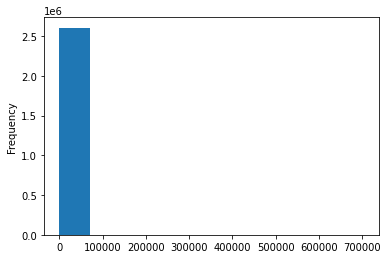

In [ ]:
tidal_volume['value'].plot(kind='hist')

In [ ]:
tidal_volume['value'].max()


703839.0

In [ ]:
tidal_volume.head(5)

admissionid  itemid   value  measuredat           registeredby
0         3574    8851    0.42  1131840000  ICV_IC-Verpleegkundig
1         7771    8851    2.00  1368000000  ICV_IC-Verpleegkundig
2        21989    8851    2.00   712260000  ICV_IC-Verpleegkundig
3        20689   12291  650.00  2232480000  ICV_IC-Verpleegkundig
4         6673    8851    0.53  1429800000  ICV_IC-Verpleegkundig

In [ ]:
tidal_volume['value'].describe()


count    1.326857e+06
mean     4.683518e+02
std      2.270364e+02
min      0.000000e+00
25%      3.780000e+02
50%      4.660000e+02
75%      5.590000e+02
max      1.612980e+05
Name: value, dtype: float64

In [ ]:
tidal_volume[tidal_volume['value']>3050].describe()

admissionid        itemid          value    measuredat
count    974.000000    974.000000     974.000000  9.740000e+02
mean   11677.689938  12276.919918    4776.222793  4.469630e+09
std     6735.807646      0.392313   31633.040557  1.997775e+10
min       35.000000  12275.000000    3051.000000 -4.800000e+05
25%     6382.250000  12277.000000    3055.000000  4.995000e+07
50%    11389.000000  12277.000000    3060.000000  3.601200e+08
75%    17616.500000  12277.000000    3069.000000  1.640160e+09
max    23488.000000  12277.000000  703839.000000  2.726849e+11

In [ ]:
tidal_volume[(tidal_volume['value']<100) & (tidal_volume['value']>1)].describe()


admissionid        itemid         value    measuredat
count  29909.000000  29909.000000  29909.000000  2.990900e+04
mean   11283.361664  11365.101675     31.882996  4.336374e+09
std     6613.103976   1512.568423     30.622705  2.141353e+10
min        2.000000   8851.000000      1.080000 -2.172000e+08
25%     5574.000000   8851.000000      2.000000  2.124600e+08
50%    11468.000000  12275.000000     23.000000  6.001800e+08
75%    16632.000000  12275.000000     56.000000  1.594920e+09
max    23551.000000  12291.000000     99.000000  3.623215e+11

In [ ]:
tidal_volume[tidal_volume['value']==0].describe()


admissionid        itemid   value    measuredat
count   8912.000000   8912.000000  8912.0  8.912000e+03
mean   11397.804870  12029.486984     0.0  6.145447e+09
std     6708.956551    884.903007     0.0  2.733275e+10
min        2.000000   8851.000000     0.0 -4.944000e+07
25%     5732.750000  12275.000000     0.0  1.794450e+08
50%    11278.000000  12275.000000     0.0  7.668000e+08
75%    17030.000000  12277.000000     0.0  2.318505e+09
max    23541.000000  12291.000000     0.0  3.620611e+11

In [ ]:
tidal_volume[(tidal_volume['value']<1) & (tidal_volume['value']>0)].describe()


admissionid   itemid         value    measuredat
count  18885.000000  18885.0  18885.000000  1.888500e+04
mean   10566.282605   8851.0      0.532993  1.044507e+09
std     6682.367684      0.0      0.073621  1.529714e+09
min       12.000000   8851.0      0.100000 -1.447800e+08
25%     4292.000000   8851.0      0.490000  3.282000e+07
50%    10756.000000   8851.0      0.520000  2.707200e+08
75%    16102.000000   8851.0      0.570000  1.628820e+09
max    23506.000000   8851.0      0.990000  1.021824e+10

In [ ]:
tidal_volume[(tidal_volume['value']<1) & (tidal_volume['value']>0)].describe()


#### Clean

In [ ]:
tidal_volume = tidal_volume[(tidal_volume['value']>100)&(tidal_volume['value']<1501)]

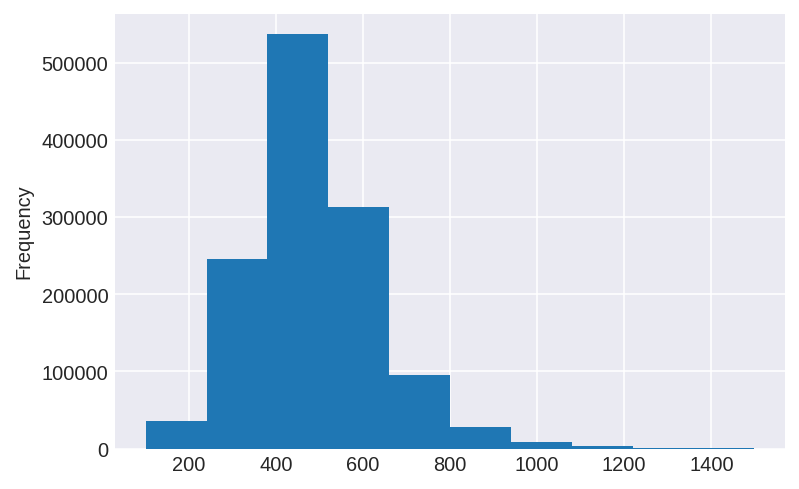

In [ ]:
tidal_volume['value'].plot(kind='hist')

In [ ]:
tidal_volume.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1269839 entries, 0 to 1326856
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   admissionid   1269839 non-null  int64  
 1   itemid        1269839 non-null  int64  
 2   value         1269839 non-null  float64
 3   measuredat    1269839 non-null  int64  
 4   registeredby  1269839 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 58.1+ MB


In [ ]:
tidal_volume.describe()


admissionid        itemid         value    measuredat
count  1.269839e+06  1.269839e+06  1.269839e+06  1.269839e+06
mean   1.169318e+04  1.227457e+04  4.872357e+02  4.912596e+09
std    6.727653e+03  4.827781e+01  1.498443e+02  2.326629e+10
min    0.000000e+00  8.851000e+03  1.010000e+02 -3.447000e+08
25%    6.056000e+03  1.227500e+04  3.910000e+02  2.364600e+08
50%    1.157200e+04  1.227500e+04  4.730000e+02  7.457400e+08
75%    1.752200e+04  1.227500e+04  5.640000e+02  1.880040e+09
max    2.355100e+04  1.235800e+04  1.499000e+03  3.916526e+11

In [ ]:
tidal_volume.plot(kind='hist')

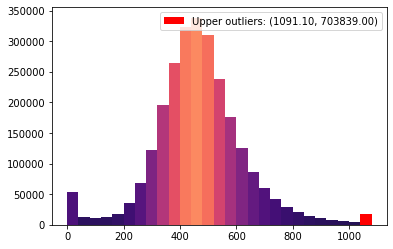

In [ ]:
adb.outliers_histogram(data=tidal_volume['value'], z_threshold=5).show()

###  Respiratory Rate

In [8]:
dictionary[dictionary['item'].str.contains(r'frequentie|rate', regex=True, case=False)&(dictionary['table']=='numericitems')]


itemid                        item  \
2       6640              Hartfrequentie   
487     7726     Ademfrequentie Spontaan   
875     8850                  Frequentie   
893     8873        Ademfrequentie Evita   
894     8874      Ademfrequentie Monitor   
896     8876         Frequentie Spontaan   
1437    9469        Pacemaker Frequentie   
1599    9654  Ademfrequentie Spontaan(2)   
2641   12090              HFO-Frequentie   
2894   12283       Adem Frequentie (Set)   
2898   12287       SIMV Frequentie (Set)   
2939   12322   Adem Frequentie (Set) (2)   
2969   12372         Rate (Bipap Vision)   
2982   12385                  Rate (Set)   
3594   13075            A_Hartfrequentie   
3605   13092            A_Ademfrequentie   
3918   14055     PiCCO HF Hartfrequentie   
4128   14455           RA_Ademfrequentie   
5031   16241         Zephyros Frequentie   
5409   16613          MCA_Ademfrequentie   
5626   16802    GRIP - InsulinAdviceRate   
5627   16805    GRIP - InsulinActualRate   

                                                               item_en  \
2                                                           heart rate   
487                                       respiratory rate spontaneous   
875                                           respiratory rate setting   
893                                           respiratory rate setting   
894                                           respiratory rate monitor   
896                                       respiratory rate spontaneous   
1437                                               pacemaker frequency   
1599                                      respiratory rate spontaneous   
2641                                                               NaN   
2894                                          respiratory rate setting   
2898  respiratory rate synchronized intermittent mandatory ventilation   
2939                                          respiratory rate setting   
2969                                                               NaN   
2982                                                               NaN   
3594                                                               NaN   
3605                                                               NaN   
3918                                                  PiCCO heart rate   
4128                                                               NaN   
5031                                          respiratory rate setting   
5409                                                               NaN   
5626                                                               NaN   
5627                                                               NaN   

     vocabulary_id vocabulary_concept_code  \
2            LOINC                 76282-3   
487          LOINC                 19839-0   
875          LOINC                 19834-1   
893          LOINC                 19834-1   
894          LOINC                  9279-1   
896          LOINC                 19839-0   
1437           NaN                     NaN   
1599         LOINC                 19839-0   
2641           NaN                     NaN   
2894         LOINC                 19834-1   
2898         LOINC                 19835-8   
2939         LOINC                 19834-1   
2969           NaN                     NaN   
2982           NaN                     NaN   
3594           NaN                     NaN   
3605           NaN                     NaN   
3918           NaN                     NaN   
4128           NaN                     NaN   
5031         LOINC                 19834-1   
5409           NaN                     NaN   
5626           NaN                     NaN   
5627           NaN                     NaN   

                                                 vocabulary_concept_name  \
2                                         Heart rate.beat-to-beat by EKG   
487                              Breath rate spontaneous --on ventilator   
875

#### Query

In [9]:
sql ='''
    SELECT
        admissionid
        , itemid
        , value
        , measuredat
        --, registeredat
        , registeredby
        --, updatedat
        --, updatedby
        --, islabresult
    FROM numericitems --only validated values
    WHERE itemid IN (
        12385, 9654, 12283, 12287, 7726, 8850, 8873, 8874, 8876, 12322, 12372,12385,16241,12090
        )
    '''

display(Markdown("``` mysql\n" + sql + "\n```"))
resp_rate = pd.read_sql(sql,con)

SyntaxError: invalid syntax (<ipython-input-9-1149e9feef6b>, line 1)

In [ ]:
resp_rate.head(10)

admissionid  itemid  value  measuredat             registeredby
0        11345    8873   43.0   716340000    ICV_IC-Verpleegkundig
1         1677    7726    2.0   824700000    ICV_IC-Verpleegkundig
2         3010    7726   36.0  1794600000    ICV_IC-Verpleegkundig
3        16875    8873   40.0  1313400000    ICV_IC-Verpleegkundig
4        16378    7726    2.0  2532900000    ICV_IC-Verpleegkundig
5         6673    7726    7.0  2722200000    ICV_IC-Verpleegkundig
6         9946    8873    2.0  2323620000  ICV_Physician assistant
7        16875    8873   37.0  1245000000    ICV_IC-Verpleegkundig
8         3010    8873   36.0  1755000000    ICV_IC-Verpleegkundig
9        20192    7726    4.0    47700000    ICV_IC-Verpleegkundig

In [ ]:
resp_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489331 entries, 0 to 1489330
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   admissionid   1489331 non-null  int64  
 1   itemid        1489331 non-null  int64  
 2   value         1489331 non-null  float64
 3   measuredat    1489331 non-null  int64  
 4   registeredby  1489331 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 56.8+ MB


In [ ]:
resp_rate.groupby('itemid')['value'].describe().sort_values(by='count',ascending=False)

count       mean        std   min    25%   50%    75%     max
itemid                                                                  
8874    857738.0  20.756332  10.320223  -1.0  15.00  20.0  25.00  3015.0
12283   463308.0  19.318719   5.763630   0.0  15.00  18.0  22.00   493.0
8873     77570.0  19.467010  10.770367   0.0  15.00  19.0  23.00  1610.0
8850     41425.0  17.439831   4.926493   0.0  14.00  18.0  20.00    45.0
7726     40932.0  12.644647  11.488601   0.0   0.00  13.0  21.00   700.0
12287     7814.0  14.812260  18.997294   0.0  10.00  13.0  15.00   205.0
12372      214.0  25.271028   5.795530   9.0  21.00  25.0  29.00    40.0
12385      187.0  21.390374   4.312088  12.0  20.00  21.0  25.00    35.0
12322       69.0  25.608696   3.683099  14.0  24.00  28.0  28.00    33.0
16241       62.0  25.693548   5.812899  12.0  21.25  27.0  30.00    36.0
9654         8.0  19.125000   7.414994   8.0  14.75  19.0  22.25    33.0
12090        3.0   5.933333   0.057735   5.9   5.90   5.9   5.95     6.0
8876         1.0  49.000000        NaN  49.0  49.00  49.0  49.00    49.0

#### 6 point analysis of respirtory rate

In [ ]:
resp_rate[(resp_rate['value']>10 ) & (resp_rate['value']<50 )].describe()

admissionid        itemid         value    measuredat
count  1.394092e+06  1.394092e+06  1.394092e+06  1.394092e+06
mean   1.159053e+04  9.991053e+03  2.060851e+01  5.262325e+09
std    6.755457e+03  1.628511e+03  6.410450e+00  2.535397e+10
min    0.000000e+00  7.726000e+03  1.100000e+01 -3.447000e+08
25%    5.790000e+03  8.874000e+03  1.500000e+01  1.240200e+08
50%    1.144000e+04  8.874000e+03  2.000000e+01  5.607600e+08
75%    1.744300e+04  1.228300e+04  2.400000e+01  1.892700e+09
max    2.355200e+04  1.624100e+04  4.900000e+01  3.916526e+11

#### Histogram

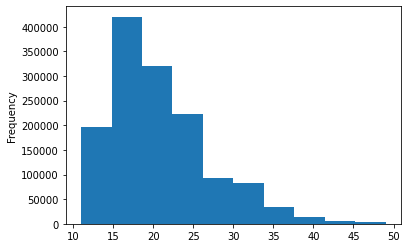

In [ ]:
resp_rate[(resp_rate['value']>10 ) & (resp_rate['value']<50 )]['value'].plot(kind='hist')

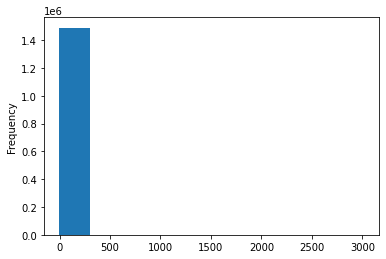

In [ ]:
resp_rate['value'].plot(kind='hist')

#### Clean

In [ ]:
resp_rate = resp_rate[resp_rate['itemid']!=8876]

In [ ]:
resp_rate.groupby('itemid')['value'].describe().sort_values(by='count',ascending=False)


count       mean        std   min    25%   50%    75%     max
itemid                                                                  
8874    857738.0  20.756332  10.320223  -1.0  15.00  20.0  25.00  3015.0
12283   463308.0  19.318719   5.763630   0.0  15.00  18.0  22.00   493.0
8873     77570.0  19.467010  10.770367   0.0  15.00  19.0  23.00  1610.0
8850     41425.0  17.439831   4.926493   0.0  14.00  18.0  20.00    45.0
7726     40932.0  12.644647  11.488601   0.0   0.00  13.0  21.00   700.0
12287     7814.0  14.812260  18.997294   0.0  10.00  13.0  15.00   205.0
12372      214.0  25.271028   5.795530   9.0  21.00  25.0  29.00    40.0
12385      187.0  21.390374   4.312088  12.0  20.00  21.0  25.00    35.0
12322       69.0  25.608696   3.683099  14.0  24.00  28.0  28.00    33.0
9654         8.0  19.125000   7.414994   8.0  14.75  19.0  22.25    33.0

In [ ]:
resp_rate[resp_rate['value']!=0].count()

admissionid     1462549
itemid          1462549
value           1462549
measuredat      1462549
registeredby    1462549
dtype: int64

In [ ]:
resp_rate = resp_rate[(resp_rate['value']>10 ) & (resp_rate['value']<50 )]

### PEEP


#### Get from Dictionary

In [ ]:
dictionary[dictionary['item'].str.contains(r'peep', regex=True, case=False).fillna(False)]


itemid                               item  \
886     8862                          PEEP/CPAP   
899     8879                     PEEP (gemeten)   
901     8882                     Intrinsic PEEP   
1459    9493  Intrinsic PEEP en Airtrap bepalen   
1460    9493  Intrinsic PEEP en Airtrap bepalen   
1602    9661                  Intrinsic PEEP(2)   
1605    9666                  PEEP (gemeten)(2)   
2895   12284                         PEEP (Set)   
2896   12285                PC boven PEEP (Set)   
2897   12286                PS boven PEEP (Set)   
2925   12297                       T peep (Set)   
2928   12301                           PEEP tot   
2942   12335            PC boven PEEP (Set) (2)   
2943   12336                     PEEP (Set) (2)   
2945   12338            PS boven PEEP (Set) (2)   
2946   12342                   T peep (Set) (2)   
2963   12364                       PEEP tot (2)   
4628   15142                  CPAP PEEP (cmH2O)   
4629   15142                  CPAP PEEP (cmH2O)   
5038   16250                      Zephyros PEEP   

                                                item_en vocabulary_id  \
886   positive end expiratory pressure setting/conti...         LOINC   
899        positive end expiratory pressure measurement         LOINC   
901                                                 NaN           NaN   
1459                                                NaN           NaN   
1460                                                NaN           NaN   
1602                                                NaN           NaN   
1605       positive end expiratory pressure measurement         LOINC   
2895           positive end expiratory pressure setting         LOINC   
2896                pressure control above PEEP setting         LOINC   
2897                pressure support above PEEP setting         LOINC   
2925                                                NaN           NaN   
2928                                                NaN           NaN   
2942                                                NaN           NaN   
2943           positive end expiratory pressure setting         LOINC   
2945                                                NaN           NaN   
2946                                                NaN           NaN   
2963                                                NaN           NaN   
4628                                                NaN           NaN   
4629                                                NaN           NaN   
5038           positive end expiratory pressure setting         LOINC   

     vocabulary_concept_code  \
886                  35410-0   
899                  76248-4   
901                      NaN   
1459                     NaN   
1460                     NaN   
1602                     NaN   
1605                 76248-4   
2895                 20077-4   
2896                 76152-8   
2897                 20079-0   
2925                     NaN   
2928                     NaN   
2942                     NaN   
2943                 20077-4   
2945                     NaN   
2946                     NaN   
2963                     NaN   
4628                     NaN   
4629                     NaN   
5038                 20077-4   

                                vocabulary_concept_name  \
886   Continuous positive airway pressure Respirator...   
899             PEEP Respiratory system --on ventilator   
901                                                 NaN   
1459                                                NaN   
1460                                                NaN   
1602                                                NaN   
1605            PEEP Respiratory system --on ventilator   
2895  Positive end expiratory pressure setting Venti...   
2896           Airway pressure delta setting Ventilator   
2897                Pressure support setting Ventilator   
2925                                                NaN   
2928               

#### Query

In [ ]:
peep = client.query(
    '''
    SELECT
        admissionid
        , itemid
        , value
        , measuredat
        --, registeredat
        , registeredby
        --, updatedat
        --, updatedby
        --, islabresult
    FROM numericitems --only validated values
    WHERE itemid IN ( 8862, 8879, 9666, 12284, 12297, 15142, 16250
        
        )
    ''',job_config=job_config).to_dataframe()

In [ ]:
peep.groupby('itemid')['value'].describe().sort_values(by='count',ascending=False)


count       mean       std   min   25%   50%   75%    max
itemid                                                               
12284   1282336.0   8.791743  3.489162   0.0   6.0   8.0  10.0  118.0
8862      77267.0   8.688120  4.230351   0.0   5.0   8.0  10.0  513.0
8879      76452.0   9.192526  4.058971  -5.0   6.0   8.0  12.0   58.0
12297      1968.0   9.361890  8.398072   0.0   2.0   8.0  17.0   46.0
16250       241.0   6.614108  2.028045   3.0   5.0   6.0   8.0   10.0
9666          1.0  12.000000       NaN  12.0  12.0  12.0  12.0   12.0

In [ ]:
peep[(peep['value']>=0 ) & (peep['value']<40 )].describe()


admissionid        itemid         value    measuredat
count  1.438251e+06  1.438251e+06  1.438251e+06  1.438251e+06
mean   1.160558e+04  1.191986e+04  8.807121e+00  4.574555e+09
std    6.736344e+03  1.056119e+03  3.548900e+00  2.214141e+10
min    0.000000e+00  8.862000e+03  0.000000e+00 -3.447000e+08
25%    5.884000e+03  1.228400e+04  6.000000e+00  2.409000e+08
50%    1.153700e+04  1.228400e+04  8.000000e+00  7.574400e+08
75%    1.738900e+04  1.228400e+04  1.000000e+01  1.893600e+09
max    2.355100e+04  1.625000e+04  3.900000e+01  3.916526e+11

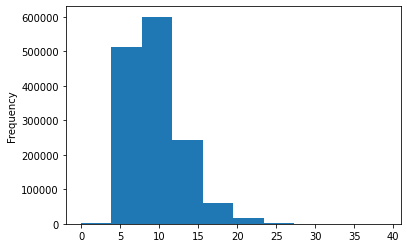

In [ ]:
peep[(peep['value']>=0 ) & (peep['value']<40 )]['value'].plot(kind='hist')

#### Clean

In [ ]:
peep = peep[(peep['value']>=0 ) & (peep['value']<40 )]

### Inspiratory pressure above peep

In [ ]:
dictionary[dictionary['item_en'].str.contains(r'.above', regex=True, case=False).fillna(False)]


itemid                 item                              item_en  \
2896   12285  PC boven PEEP (Set)  pressure control above PEEP setting   
2897   12286  PS boven PEEP (Set)  pressure support above PEEP setting   

     vocabulary_id vocabulary_concept_code  \
2896         LOINC                 76152-8   
2897         LOINC                 20079-0   

                       vocabulary_concept_name         abbreviation  \
2896  Airway pressure delta setting Ventilator  PC boven PEEP (Set)   
2897       Pressure support setting Ventilator        PS boven PEEP   

      categoryid                    category category_en  ...  unitid   unit  \
2896         587  RESP-Servo Machinegegevens         NaN  ...   175.0  cmH2O   
2897         587  RESP-Servo Machinegegevens         NaN  ...   175.0  cmH2O   

      ucum_code  low_normal_value high_normal_value  expected_min_value  \
2896    cm[H2O]               NaN               NaN                 NaN   
2897    cm[H2O]               NaN               NaN                 NaN   

     expected_max_value         table     count count_validated  
2896                NaN  numericitems   4069976        456455.0  
2897                NaN  numericitems  10799693        961936.0  

[2 rows x 25 columns]

#### Query

In [ ]:
pre_above_peep = client.query(
    '''
    SELECT
        admissionid
        , itemid
        , value
        , measuredat
        --, registeredat
        , registeredby
        --, updatedat
        --, updatedby
        --, islabresult
    FROM numericitems --only validated values
    WHERE itemid IN (
      12285,12286 
      )
    ''',job_config=job_config).to_dataframe()

In [ ]:
pre_above_peep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418391 entries, 0 to 1418390
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   admissionid   1418391 non-null  int64  
 1   itemid        1418391 non-null  int64  
 2   value         1418391 non-null  float64
 3   measuredat    1418391 non-null  int64  
 4   registeredby  1418391 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 54.1+ MB


In [ ]:
pre_above_peep.groupby('itemid')['value'].describe().sort_values(by='count',ascending=False)

count       mean       std  min   25%   50%   75%     max
itemid                                                              
12286   961936.0   9.209532  6.080196  0.0   5.0  10.0  13.0   254.0
12285   456455.0  15.457294  6.465816  0.0  12.0  14.0  18.0  2022.0

itemid
12285    AxesSubplot(0.125,0.125;0.775x0.755)
12286    AxesSubplot(0.125,0.125;0.775x0.755)
Name: value, dtype: object

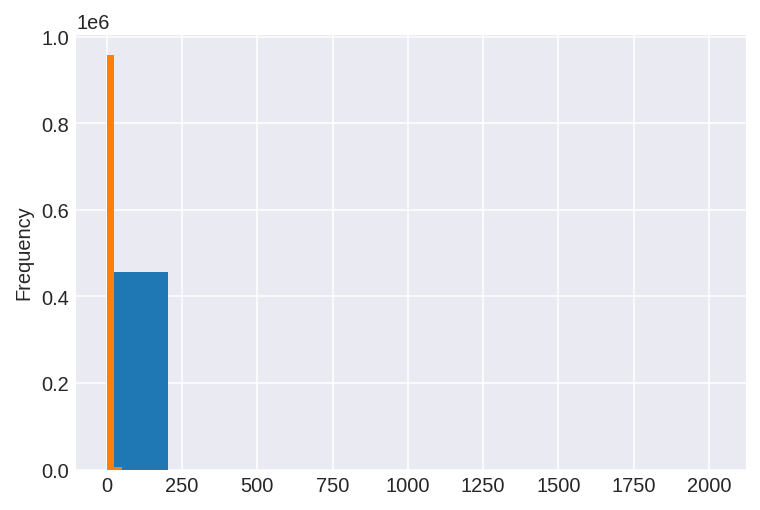

In [ ]:
pre_above_peep.groupby('itemid')['value'].plot(kind='hist')


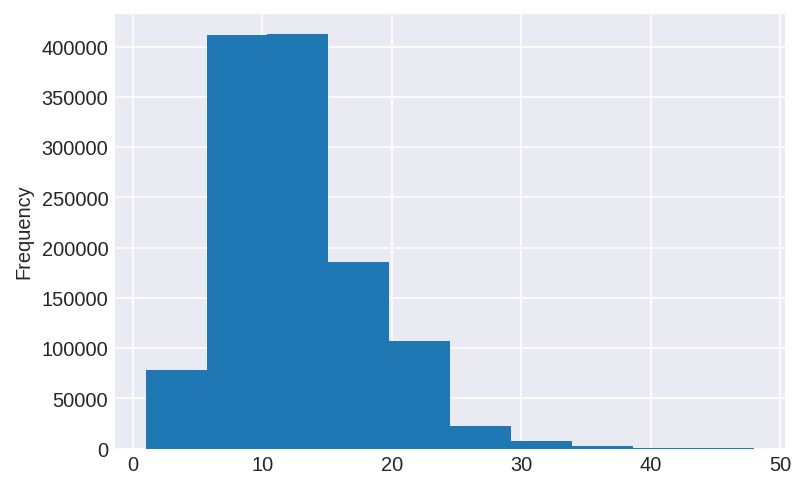

In [ ]:
pre_above_peep[(pre_above_peep['value']>0 ) & (pre_above_peep['value']<50 )]['value'].plot(kind='hist')


#### Clean

In [ ]:
pre_above_peep = pre_above_peep[(pre_above_peep['value']>0 ) & (pre_above_peep['value']<50 )]

### PO2

In [ ]:
dictionary[dictionary['item'].str.contains(r'po2.*', regex=True, case=False).fillna(False)]


itemid                    item                           item_en  \
447     7433                     PO2  partial pressure of oxygen blood   
1734    9996             PO2 (bloed)  partial pressure of oxygen blood   
1735    9997            pO2 (overig)                               NaN   
5643   16835  Streef Onderwaarde pO2                               NaN   
8345   19611             Streef SpO2                               NaN   
8986   21214       PO2 (bloed) - kPa  partial pressure of oxygen blood   

     vocabulary_id vocabulary_concept_code  \
447          LOINC                 11556-8   
1734         LOINC                 11556-8   
1735           NaN                     NaN   
5643           NaN                     NaN   
8345           NaN                     NaN   
8986         LOINC                 11556-8   

                 vocabulary_concept_name            abbreviation  categoryid  \
447   Oxygen [Partial pressure] in Blood                     PO2         372   
1734  Oxygen [Partial pressure] in Blood             PO2 (bloed)         491   
1735                                 NaN            pO2 (overig)         512   
5643                                 NaN  Streef Onderwaarde pO2         701   
8345                                 NaN             Streef SpO2         701   
8986  Oxygen [Partial pressure] in Blood       PO2 (bloed) - kPa         491   

                    category category_en  ...  unitid  unit  ucum_code  \
447              LAB ASTRUPS         NaN  ...   173.0  mmHg     mm[Hg]   
1734          LAB-Astr-bloed         NaN  ...   173.0  mmHg     mm[Hg]   
1735       LAB-Astr-diversen         NaN  ...   173.0  mmHg     mm[Hg]   
5643  RESP-Acceptatiewaarden         NaN  ...   173.0  mmHg     mm[Hg]   
8345  RESP-Acceptatiewaarden         NaN  ...     0.0  None        NaN   
8986          LAB-Astr-bloed         NaN  ...   152.0   kPa        kPa   

      low_normal_value high_normal_value  expected_min_value  \
447                NaN               NaN                 NaN   
1734                76               NaN                 NaN   
1735               NaN               NaN                 NaN   
5643               NaN               NaN                 NaN   
8345               NaN               NaN                 NaN   
8986                10              13,3                 NaN   

     expected_max_value         table   count count_validated  
447                 NaN  numericitems   25372         25372.0  
1734                NaN  numericitems  654417        654417.0  
1735                NaN  numericitems      14            14.0  
5643                NaN  numericitems      64            64.0  
8345                NaN  numericitems    7755          7755.0  
8986                NaN  numericitems    9392          9392.0  

[6 rows x 25 columns]

#### Query

In [ ]:
po2 = client.query(
    '''
    SELECT
        admissionid
        , itemid
        , value
        , measuredat
        --, registeredat
        , registeredby
        --, updatedat
        --, updatedby
        --, islabresult
    FROM numericitems --only validated values
    WHERE itemid IN (
      7433,
      9996,
      21214 -- kpa 
      )
    ''',job_config=job_config).to_dataframe()

In [ ]:
po2.describe()

admissionid         itemid          value    measuredat
count  689181.000000  689181.000000  689181.000000  6.891810e+05
mean    11710.803316   10054.520215     103.608109  5.063620e+09
std      6752.009059    1397.633533     119.179742  2.504472e+10
min         0.000000    7433.000000       0.000000 -5.451300e+09
25%      5996.000000    9996.000000      76.000000  6.624000e+07
50%     11656.000000    9996.000000      92.000000  4.296600e+08
75%     17506.000000    9996.000000     117.000000  1.511640e+09
max     23551.000000   21214.000000   88888.000000  3.916534e+11

In [ ]:
po2[po2['itemid']==21214]['value'].head()

0    13.6
1    13.0
2     8.7
3     6.7
4    12.3
Name: value, dtype: float64

-- converting values of this itemid from kpa to mmHg

In [ ]:
po2['itemid'].loc[21214]

9996

In [ ]:
po2[po2['itemid']==21214]['value']*7.50061683


0         102.008389
1          97.508019
2          65.255365
3          50.254131
4          92.257587
             ...    
193804     76.506292
193805     88.507279
193806    141.761658
193807     63.755243
193808     86.257094
Name: value, Length: 9392, dtype: float64

In [ ]:
po2_mmhg = po2[po2['itemid']==21214]['value']*7.50061683

In [ ]:
po2.loc[po2['itemid']==21214]['value']

0         13.6
1         13.0
2          8.7
3          6.7
4         12.3
          ... 
193804    10.2
193805    11.8
193806    18.9
193807     8.5
193808    11.5
Name: value, Length: 9392, dtype: float64

In [ ]:
po2['value'].loc[po2['itemid']==21214] = po2_mmhg

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
po2.loc[po2['itemid']==21214]['value']


0         102.008389
1          97.508019
2          65.255365
3          50.254131
4          92.257587
             ...    
193804     76.506292
193805     88.507279
193806    141.761658
193807     63.755243
193808     86.257094
Name: value, Length: 9392, dtype: float64

In [ ]:
po2[po2['itemid']==21214]['value'].head()

0    102.008389
1     97.508019
2     65.255365
3     50.254131
4     92.257587
Name: value, dtype: float64

#### Clean

In [ ]:
po2 = po2[(po2['value']>40)&(po2['value']<300)]

In [ ]:
po2.describe()

admissionid         itemid          value    measuredat
count  659681.000000  659681.000000  659681.000000  6.596810e+05
mean    11709.428501   10051.468369     102.496532  5.118557e+09
std      6751.135902    1398.210328      38.119724  2.503339e+10
min         0.000000    7433.000000      40.099998 -1.256280e+09
25%      5999.000000    9996.000000      78.000000  7.584000e+07
50%     11656.000000    9996.000000      93.000000  4.663800e+08
75%     17506.000000    9996.000000     117.000000  1.566060e+09
max     23551.000000   21214.000000     299.100010  3.916534e+11

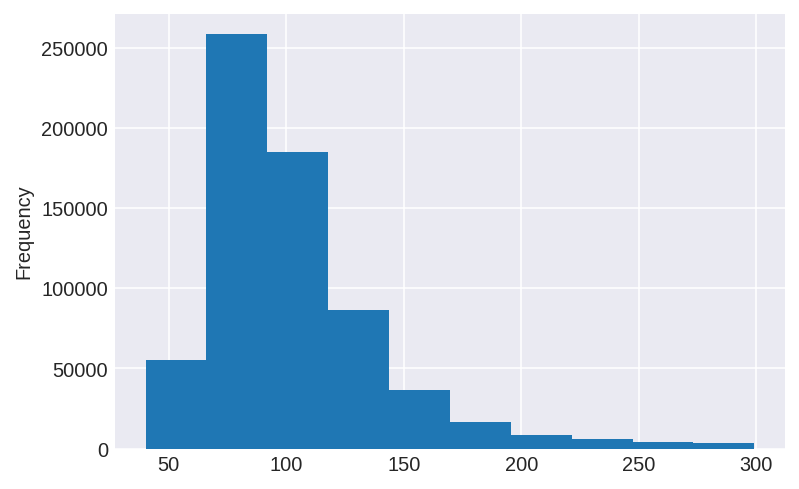

In [ ]:
po2['value'].plot(kind='hist')


### FIO2

In [ ]:
dictionary[dictionary['item'].str.contains(r'fio2.*', regex=True, case=False).fillna(False)]


itemid               item                                item_en  \
80      6699             FiO2 %  inspired oxygen concentration setting   
3595   13076             A_FiO2                                    NaN   
4136   14471            RA_FiO2                                    NaN   
5035   16246      Zephyros FiO2  inspired oxygen concentration setting   
5419   16629           MCA_FiO2                                    NaN   
8694   20134  Breathing FiO2(%)                                    NaN   
8858   20656        ECMO - FiO2                                    NaN   

     vocabulary_id vocabulary_concept_code  \
80           LOINC                 19994-3   
3595           NaN                     NaN   
4136           NaN                     NaN   
5035         LOINC                 19994-3   
5419           NaN                     NaN   
8694           NaN                     NaN   
8858           NaN                     NaN   

                                vocabulary_concept_name       abbreviation  \
80    Oxygen/Inspired gas setting [Volume Fraction] ...              FiO2%   
3595                                                NaN             A_FiO2   
4136                                                NaN            RA_FiO2   
5035  Oxygen/Inspired gas setting [Volume Fraction] ...      Zephyros FiO2   
5419                                                NaN           MCA_FiO2   
8694                                                NaN  Breathing FiO2(%)   
8858                                                NaN        ECMO - FiO2   

      categoryid                       category category_en  ...  unitid  \
80           329                  RESP-O2aanbod         NaN  ...   191.0   
3595         635                      APACHE-II         NaN  ...   191.0   
4136         671             APACHE II RESEARCH         NaN  ...   191.0   
5035         693  RESP-Zephyros Machinegegevens         NaN  ...   191.0   
5419         699                 APACHE II MICV         NaN  ...   191.0   
8694         733          Transport Registratie         NaN  ...     0.0   
8858         745                           ECMO         NaN  ...   191.0   

      unit  ucum_code  low_normal_value high_normal_value  expected_min_value  \
80    Geen        NaN               NaN               NaN                 NaN   
3595  Geen        NaN                 0                 4                 NaN   
4136  Geen        NaN                 0                 4                 NaN   
5035  Geen        NaN               NaN               NaN                 NaN   
5419  Geen        NaN                 0                 4                 NaN   
8694  None        NaN               NaN               NaN                 NaN   
8858  Geen        NaN               NaN               NaN                 NaN   

     expected_max_value         table  count count_validated  
80                  NaN  numericitems  91881         83474.0  
3595                NaN  numericitems  10817         10817.0  
4136                NaN  numericitems     76            76.0  
5035                NaN  numericitems    239           239.0  
5419                NaN  numericitems   1951          1951.0  
8694                NaN  numericitems     14            14.0  
8858                NaN  numericitems    478           478.0  

[7 rows x 25 columns]

In [ ]:
#another trial to get more fio2 data
dictionary[(dictionary['item_en'].str.contains(r'.*oxygen.*', regex=True, case=False).fillna(False))&(dictionary['table']=='numericitems')]


itemid                       item  \
80      6699                     FiO2 %   
82      6709        Saturatie (Monitor)   
447     7433                        PO2   
870     8845                   O2 l/min   
1734    9996                PO2 (bloed)   
2890   12279            O2 concentratie   
2893   12282      O2 concentratie (Set)   
2940   12329  O2 concentratie (Set) (2)   
2967   12369                    SET %O2   
5035   16246              Zephyros FiO2   
8986   21214          PO2 (bloed) - kPa   

                                        item_en vocabulary_id  \
80        inspired oxygen concentration setting         LOINC   
82                       oxygen saturation SpO2         LOINC   
447            partial pressure of oxygen blood         LOINC   
870                         oxygen flow (l/min)         LOINC   
1734           partial pressure of oxygen blood         LOINC   
2890  inspired oxygen concentration measurement         LOINC   
2893      inspired oxygen concentration setting         LOINC   
2940      inspired oxygen concentration setting         LOINC   
2967      inspired oxygen concentration setting         LOINC   
5035      inspired oxygen concentration setting         LOINC   
8986           partial pressure of oxygen blood         LOINC   

     vocabulary_concept_code  \
80                   19994-3   
82                   59408-5   
447                  11556-8   
870                  19941-4   
1734                 11556-8   
2890                 19995-0   
2893                 19994-3   
2940                 19994-3   
2967                 19994-3   
5035                 19994-3   
8986                 11556-8   

                                vocabulary_concept_name       abbreviation  \
80    Oxygen/Inspired gas setting [Volume Fraction] ...              FiO2%   
82    Oxygen saturation in Arterial blood by Pulse o...  Saturatie Monitor   
447                  Oxygen [Partial pressure] in Blood                PO2   
870              Oxygen gas flow Oxygen delivery system           O2 l/min   
1734                 Oxygen [Partial pressure] in Blood        PO2 (bloed)   
2890  Oxygen/Inspired gas Respiratory system by O2 A...                O2%   
2893  Oxygen/Inspired gas setting [Volume Fraction] ...          O2% (Set)   
2940  Oxygen/Inspired gas setting [Volume Fraction] ...      O2% (Set) (2)   
2967  Oxygen/Inspired gas setting [Volume Fraction] ...            SET %O2   
5035  Oxygen/Inspired gas setting [Volume Fraction] ...      Zephyros FiO2   
8986                 Oxygen [Partial pressure] in Blood  PO2 (bloed) - kPa   

      categoryid                           category category_en  ...  unitid  \
80           329                      RESP-O2aanbod         NaN  ...   191.0   
82           586         RESP-Servo Patiëntgegevens         NaN  ...     0.0   
447          372                        LAB ASTRUPS         NaN  ...   173.0   
870          329                      RESP-O2aanbod         NaN  ...    26.0   
1734         491                     LAB-Astr-bloed         NaN  ...   173.0   
2890         329                      RESP-O2aanbod         NaN  ...   191.0   
2893         587         RESP-Servo Machinegegevens         NaN  ...   191.0   
2940         588      RESP-Servo Machinegegevens(2)         NaN  ...   191.0   
2967         590  RESP-Bipap Vision Machinegegevens         NaN  ...   191.0   
5035         693      RESP-Zephyros Machinegegevens         NaN  ...   191.0   
8986         491                     LAB-Astr-bloed         NaN  ...   152.0   

       unit  ucum_code  low_normal_value high_normal_value  \
80     Geen        NaN               NaN               NaN   
82     None        NaN               NaN               NaN   
447    mmHg     mm[Hg]               NaN               NaN   
870   l/min      L/min               NaN               NaN   
1734   mmHg     mm[Hg]                76               NaN   
2890   Geen        NaN               NaN             

#### Query

In [ ]:
fio2 = client.query(
    '''
    SELECT
        admissionid
        , itemid
        , value
        , measuredat
        --, registeredat
        , registeredby
        --, updatedat
        --, updatedby
        --, islabresult
    FROM numericitems --only validated values
    WHERE itemid IN (
      6699,
      16246,
      12282 -- inspired oxygen concentration setting	
      )
    ''',job_config=job_config).to_dataframe()

In [ ]:
fio2.describe()

admissionid        itemid         value    measuredat
count  1.364878e+06  1.364878e+06  1.364878e+06  1.364878e+06
mean   1.165091e+04  1.194125e+04  4.474008e+01  4.760657e+09
std    6.728506e+03  1.339009e+03  7.523544e+01  2.274322e+10
min    0.000000e+00  6.699000e+03  0.000000e+00 -3.447000e+08
25%    5.999000e+03  1.228200e+04  4.000000e+01  2.403000e+08
50%    1.157100e+04  1.228200e+04  4.000000e+01  7.531800e+08
75%    1.746600e+04  1.228200e+04  5.000000e+01  1.888500e+09
max    2.355100e+04  1.624600e+04  8.615000e+04  3.916526e+11

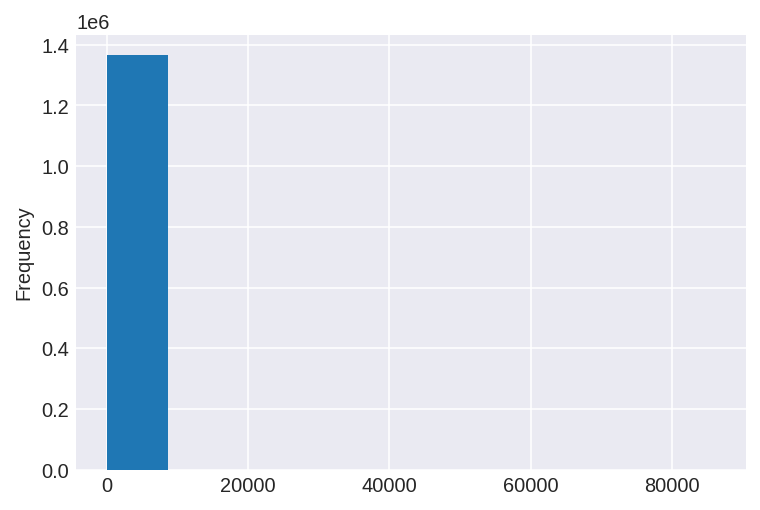

In [ ]:
fio2['value'].plot(kind='hist')

#### Clean

In [ ]:
fio2 = fio2[(fio2['value']>21) & (fio2['value']<101)]

In [ ]:
fio2.describe()

admissionid        itemid         value    measuredat
count  1.357678e+06  1.357678e+06  1.357678e+06  1.357678e+06
mean   1.164656e+04  1.194480e+04  4.479949e+01  4.723548e+09
std    6.726740e+03  1.332404e+03  1.056011e+01  2.246756e+10
min    0.000000e+00  6.699000e+03  2.200000e+01 -3.447000e+08
25%    5.988000e+03  1.228200e+04  4.000000e+01  2.410800e+08
50%    1.157100e+04  1.228200e+04  4.000000e+01  7.539900e+08
75%    1.744500e+04  1.228200e+04  5.000000e+01  1.884960e+09
max    2.355100e+04  1.624600e+04  1.000000e+02  3.916526e+11

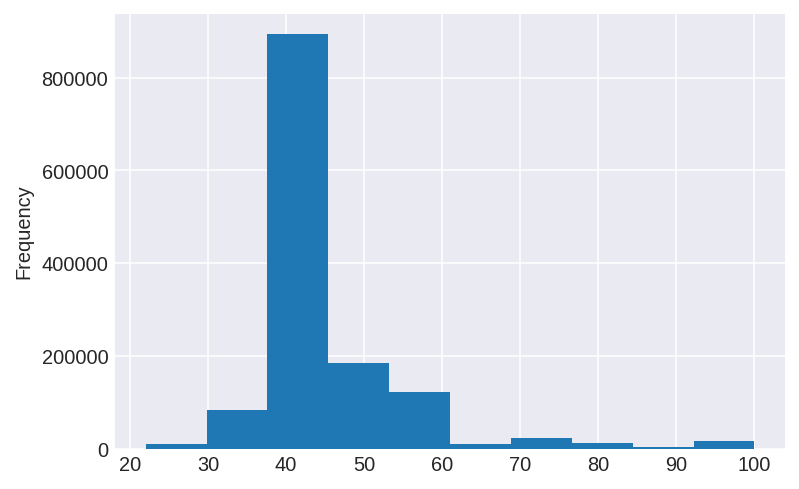

In [ ]:
fio2['value'].plot(kind='hist')

### PCO2

In [ ]:
dictionary[(dictionary['item'].str.contains(r'pco2', regex=True, case=False).fillna(False))&(dictionary['table']=='numericitems')]


itemid                     item  \
167     6846                     PCO2   
1728    9990             pCO2 (bloed)   
1729    9991            pCO2 (overig)   
5644   16837  Streef Onderwaarde pCO2   
5645   16838  Streef Bovenwaarde pCO2   
8985   21213       PCO2 (bloed) - kPa   

                                          item_en vocabulary_id  \
167   partial pressure of carbon dioxide in blood         LOINC   
1728  partial pressure of carbon dioxide in blood         LOINC   
1729                                          NaN           NaN   
5644                                          NaN           NaN   
5645                                          NaN           NaN   
8985  partial pressure of carbon dioxide in blood         LOINC   

     vocabulary_concept_code                     vocabulary_concept_name  \
167                  11557-6  Carbon dioxide [Partial pressure] in Blood   
1728                 11557-6  Carbon dioxide [Partial pressure] in Blood   
1729                     NaN                                         NaN   
5644                     NaN                                         NaN   
5645                     NaN                                         NaN   
8985                 11557-6  Carbon dioxide [Partial pressure] in Blood   

                 abbreviation  categoryid                category category_en  \
167                      PCO2         372             LAB ASTRUPS         NaN   
1728             pCO2 (bloed)         491          LAB-Astr-bloed         NaN   
1729            pCO2 (overig)         512       LAB-Astr-diversen         NaN   
5644  Streef Onderwaarde pCO2         701  RESP-Acceptatiewaarden         NaN   
5645  Streef Bovenwaarde pCO2         701  RESP-Acceptatiewaarden         NaN   
8985       PCO2 (bloed) - kPa         491          LAB-Astr-bloed         NaN   

      ...  unitid  unit  ucum_code  low_normal_value high_normal_value  \
167   ...   173.0  mmHg     mm[Hg]                36                44   
1728  ...   173.0  mmHg     mm[Hg]                35                45   
1729  ...   173.0  mmHg     mm[Hg]               NaN               NaN   
5644  ...   173.0  mmHg     mm[Hg]               NaN               NaN   
5645  ...   173.0  mmHg     mm[Hg]               NaN               NaN   
8985  ...   152.0   kPa        kPa               4,7                 6   

      expected_min_value expected_max_value         table   count  \
167                  NaN                NaN  numericitems   25348   
1728                 NaN                NaN  numericitems  659807   
1729                 NaN                NaN  numericitems      21   
5644                 NaN                NaN  numericitems     890   
5645                 NaN                NaN  numericitems    1394   
8985                 NaN                NaN  numericitems    9464   

     count_validated  
167          25348.0  
1728        659807.0  
1729            21.0  
5644           890.0  
5645          1394.0  
8985          9464.0  

[6 rows x 25 columns]

#### Query

In [ ]:
pco2 = client.query(
    '''
    SELECT
        admissionid
        , itemid
        , value
        , measuredat
        --, registeredat
        , registeredby
        --, updatedat
        --, updatedby
        --, islabresult
    FROM numericitems --only validated values
    WHERE itemid IN (
      6846, -- partial pressure of carbon dioxide in blood
      9990 -- partial pressure of carbon dioxide in blood
      
      )
    ''',job_config=job_config).to_dataframe()

In [ ]:
pco2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685155 entries, 0 to 685154
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   admissionid   685155 non-null  int64  
 1   itemid        685155 non-null  int64  
 2   value         685155 non-null  float64
 3   measuredat    685155 non-null  int64  
 4   registeredby  685155 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 26.1+ MB


In [ ]:
pco2.describe()


admissionid         itemid          value    measuredat
count  685155.000000  685155.000000  685155.000000  6.851550e+05
mean    11710.100024    9873.684550      42.423170  5.086946e+09
std      6750.120184     593.436605      10.986406  2.511661e+10
min         0.000000    6846.000000      -1.000000 -5.451300e+09
25%      5999.000000    9990.000000      36.000000  6.594000e+07
50%     11666.000000    9990.000000      41.000000  4.308000e+08
75%     17506.000000    9990.000000      46.099998  1.517820e+09
max     23551.000000    9990.000000    3537.000000  3.916534e+11

In [ ]:
pco2.describe()


admissionid         itemid          value    measuredat  \
count  684890.000000  684890.000000  684890.000000  6.848900e+05   
mean    11710.218254    9873.823166      42.396898  5.087565e+09   
std      6750.101215     593.096471       9.691310  2.511935e+10   
min         0.000000    6846.000000       5.400000 -5.451300e+09   
25%      5999.000000    9990.000000      36.000000  6.594000e+07   
50%     11666.000000    9990.000000      41.000000  4.308000e+08   
75%     17506.000000    9990.000000      46.000000  1.517760e+09   
max     23551.000000    9990.000000     149.000000  3.916534e+11   

           measurehr  
count  684890.000000  
mean     1413.216448  
std      6977.595686  
min     -1514.000000  
25%        18.000000  
50%       120.000000  
75%       422.000000  
max    108793.000000

#### Clean


In [ ]:
pco2 = pco2[(pco2['value']>5) & (pco2['value']<150)]

### Ventilation free days

In [ ]:

dictionary[dictionary['item'].str.contains(r'o2', regex=True, case=False).fillna(False)]


itemid                                    item  \
80      6699                                  FiO2 %   
81      6707              End tidal CO2 concentratie   
167     6846                                    PCO2   
447     7433                                     PO2   
534     8080                            CO2 min prod   
621     8507                                    SVO2   
870     8845                                O2 l/min   
889     8869                               O2 Volume   
903     8884                         End Tidal CO2 %   
904     8885                      End Tidal CO2 mmHG   
974     8903                                     SO2   
979     8916                                   FO2Hb   
1468    9501                Water voor O2 verschonen   
1520    9545                          Cerebrale PaO2   
1601    9658                      End Tidal CO2% (2)   
1604    9664                            O2 Volume(2)   
1728    9990                            pCO2 (bloed)   
1729    9991                           pCO2 (overig)   
1734    9996                             PO2 (bloed)   
1735    9997                            pO2 (overig)   
1844   10282                      O2-Content (bloed)   
1845   10283                     O2-CONTENT (overig)   
2390   11425                          O2sat (overig)   
2404   11543                        SO2 (Hb) (bloed)   
2883   12267                           CO2 min prodX   
2884   12270                     CO2 tidal productie   
2890   12279                         O2 concentratie   
2893   12282                   O2 concentratie (Set)   
2934   12311                    O2-Saturatie (bloed)   
2940   12329               O2 concentratie (Set) (2)   
2955   12350                        CO2 min prod (2)   
2956   12352                 CO2 tidal productie (2)   
2958   12356          End tidal CO2 concentratie (2)   
2967   12369                                 SET %O2   
3019   12432                    VCO2-Metabole meting   
3020   12433                     VO2-Metabole meting   
3135   12534                          SvO2 Vigilance   
3323   12805                               EtCO2 (%)   
3595   13076                                  A_FiO2   
4136   14471                                 RA_FiO2   
5034   16245                            Zephyros O2i   
5035   16246                           Zephyros FiO2   
5419   16629                                MCA_FiO2   
5643   16835                  Streef Onderwaarde pO2   
5644   16837                 Streef Onderwaarde pCO2   
5645   16838                 Streef Bovenwaarde pCO2   
8345   19611                             Streef SpO2   
8465   19735                  Deltatrac-VCO2  studie   
8694   20134                       Breathing FiO2(%)   
8818   20405                          PrinterNOx NO2   
8858   20656                             ECMO - FiO2   
8907   20921                           O2-ICU studie   
8908   20922    O2-ICU Laag-normaal PaO2 (60-90mmHg)   
8909   20923  O2-ICU Hoog-normaal PaO2 (105-130mmHg)   
8985   21213                      PCO2 (bloed) - kPa   
8986   21214                       PO2 (bloed) - kPa   

                                          item_en vocabulary_id  \
80          inspired oxygen concentration setting         LOINC   
81      end tidal carbon dioxide partial pressure         LOINC   
167   partial pressure of carbon dioxide in blood         LOINC   
447              partial pressure of oxygen blood         LOINC   
534                                           NaN           NaN   
621                                           NaN           NaN   
870                           oxygen flow (l/min)         LOINC   
889                                           NaN           NaN   
903     end tidal carbon dioxide partial pressure         LOINC   
904     end tidal carbon dioxide partial pressure         LOINC   
974                                           NaN           NaN   
979      

In [ ]:
o2_flow = client.query(
    '''
    SELECT
        admissionid
        , itemid
        , value
        , measuredat
        --, registeredat
        , registeredby
        --, updatedat
        --, updatedby
        --, islabresult
    FROM numericitems --only validated values
    WHERE itemid IN (
      8854 -- vent mode (set)
      
      )
    ''',job_config=job_config).to_dataframe()


ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 4))



Forbidden: ignored

In [ ]:
dictionary[dictionary['item'].str.contains(r'venti', regex=True, case=False).fillna(False)]


itemid                               item                      item_en  \
2901   12290              Ventilatie Mode (Set)  mechanical ventilation mode   
2902   12290              Ventilatie Mode (Set)  mechanical ventilation mode   
2903   12290              Ventilatie Mode (Set)  mechanical ventilation mode   
2904   12290              Ventilatie Mode (Set)  mechanical ventilation mode   
2905   12290              Ventilatie Mode (Set)  mechanical ventilation mode   
2906   12290              Ventilatie Mode (Set)  mechanical ventilation mode   
2907   12290              Ventilatie Mode (Set)  mechanical ventilation mode   
2908   12290              Ventilatie Mode (Set)  mechanical ventilation mode   
2909   12290              Ventilatie Mode (Set)  mechanical ventilation mode   
2910   12290              Ventilatie Mode (Set)  mechanical ventilation mode   
2911   12290              Ventilatie Mode (Set)  mechanical ventilation mode   
2912   12290              Ventilatie Mode (Set)  mechanical ventilation mode   
2913   12290              Ventilatie Mode (Set)  mechanical ventilation mode   
2914   12290              Ventilatie Mode (Set)  mechanical ventilation mode   
2915   12290              Ventilatie Mode (Set)  mechanical ventilation mode   
2916   12290              Ventilatie Mode (Set)  mechanical ventilation mode   
2917   12290              Ventilatie Mode (Set)  mechanical ventilation mode   
2918   12290              Ventilatie Mode (Set)  mechanical ventilation mode   
2948   12347          Ventilatie Mode (Set) (2)  mechanical ventilation mode   
2949   12347          Ventilatie Mode (Set) (2)  mechanical ventilation mode   
2950   12347          Ventilatie Mode (Set) (2)  mechanical ventilation mode   
2951   12347          Ventilatie Mode (Set) (2)  mechanical ventilation mode   
2952   12347          Ventilatie Mode (Set) (2)  mechanical ventilation mode   
2953   12347          Ventilatie Mode (Set) (2)  mechanical ventilation mode   
5339   16332          Intubatie KlinischEventID                          NaN   
5359   16379       Tracheotomie KlinischEventID                          NaN   
5362   16385        Thoraxdrain KlinischEventID                          NaN   
5369   16443       Veneuze lijn KlinischEventID                          NaN   
5690   16957      SEPSIS_PROTECTIEVE_VENTILATIE                          NaN   
5691   16957      SEPSIS_PROTECTIEVE_VENTILATIE                          NaN   
5692   16957      SEPSIS_PROTECTIEVE_VENTILATIE                          NaN   
7888   18692          Complicatie_Interventie_1                          NaN   
7889   18692          Complicatie_Interventie_1                          NaN   
7890   18693          Complicatie_Interventie_2                          NaN   
7891   18693          Complicatie_Interventie_2                          NaN   
8410   19708  Echografie ICARUS KlinischEventID                          NaN   

     vocabulary_id vocabulary_concept_code      vocabulary_concept_name  \
2901         LOINC                 20124-4  Ventilation mode Ventilator   
2902         LOINC                 20124-4  Ventilation mode Ventilator   
2903         LOINC                 20124-4  Ventilation mode Ventilator   
2904         LOINC                 20124-4  Ventilation mode Ventilator   
2905         LOINC                 20124-4  Ventilation mode Ventilator   
2906         LOINC                 20124-4  Ventilation mode Ventilator   
2907         LOINC                 20124-4  Ventilation mode Ventilator   
2908         LOINC                 20124-4  Ventilation mode Ventilator   
2909         LOINC                 20124-4  Ventilation mode Ventilator   
2910         LOINC                 20124-4  Ventilation mode Ventilator   
2911         LOINC                 20124-4  Ventilation mode Ventilator   
2912         LOINC                 20124-4  Ventilation mode Ventilator   
2913         LOINC                 20124-4  Ventilation mode Ventilato

#### Query

In [ ]:
vent_mode = client.query(
    '''
    SELECT
        admissionid
        , itemid
        , value
        , measuredat
        --, registeredat
        , registeredby
        --, updatedat
        --, updatedby
        --, islabresult
    FROM listitems --only validated values
    WHERE itemid IN (
      12290, -- vent mode (set)
      12347 -- vent mode (set 2)
      
      )
    ''',job_config=job_config).to_dataframe()

Forbidden: ignored

In [ ]:
vent_mode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1283570 entries, 0 to 1283569
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   admissionid   1283570 non-null  int64 
 1   itemid        1283570 non-null  int64 
 2   value         1283570 non-null  object
 3   measuredat    1283570 non-null  int64 
 4   registeredby  1283570 non-null  object
dtypes: int64(3), object(2)
memory usage: 49.0+ MB


In [ ]:
vent_mode.isnull().sum()

admissionid     0
itemid          0
value           0
measuredat      0
registeredby    0
dtype: int64

In [ ]:
vent_mode['value'].unique()

array(['PC', 'PS/CPAP', 'NAVA', 'SIMV(PC)+PS', 'SIMV(VC)+PS', 'VC ',
       'PS/CPAP (trig)', 'PS/CPAP in NIV', 'PC in NIV', 'Bi Vente',
       'Stand By', 'VS', 'VC (trig)', 'PC ', 'PC (No trig)',
       'VC (No trig)', 'PRVC (No trig)', 'PRVC ', 'PRVC (trig)', 'VC'],
      dtype=object)

In [ ]:
o2_flow['value'].describe()

count    72306.000000
mean         0.691169
std          0.930721
min          0.000000
25%          0.200000
50%          0.400000
75%          1.400000
max        106.000000
Name: value, dtype: float64

#### Clean

## Mechanical power calculation formula for pressure control

MP=0.098∙RR∙Vt∙[PEEP+ΔPinsp]

## Merging Dataframes

### Add Measure Hour Function

In [ ]:
#this function takes the dataframe and the measuredat column, adds a new column with the calculated measure hour and displays it
def add_measurehr(df,measuredt):
  df['measurehr']=df[measuredt].apply(lambda x: round(x/1000/60/60))
  
for df in [tidal_volume,resp_rate,peep,po2,fio2,pre_above_peep,pco2,o2_flow,vent_mode]:
  add_measurehr(df,'measuredat')

In [ ]:
def add_measuredy(df, measurehr):
  df['measuredy']=df[measurehr].apply(lambda x: round(x/24))

for df in [tidal_volume,resp_rate,peep,po2,fio2,pre_above_peep,pco2,o2_flow,vent_mode]:
  add_measuredy(df,'measurehr')

In [ ]:
peep.sort_values(by='measurehr').head(5)

admissionid  itemid  value  measuredat           registeredby  \
287101         6042   12284    5.0  -344700000  ICV_IC-Verpleegkundig   
175065         6042   12284    5.0  -339600000  ICV_IC-Verpleegkundig   
300656         6042   12284    5.0  -336000000  ICV_IC-Verpleegkundig   
350959         6042   12284    5.0  -332400000  ICV_IC-Verpleegkundig   
227944         6042   12284    5.0  -328800000  ICV_IC-Verpleegkundig   

        measurehr  
287101        -96  
175065        -94  
300656        -93  
350959        -92  
227944        -91

### Merging based on admissionid and measurehr

In [ ]:
from functools import reduce

vars = [tidal_volume,resp_rate,peep,pre_above_peep,po2,fio2,pco2,vent_mode]
all_var = reduce(lambda  left,right: pd.merge(left,right,on=['admissionid','measurehr'],
                                            how='inner'), vars)
all_var.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'itemid_x', 'measuredy_x', 'value_x', 'measuredat_x', 'registeredby_x'} in the result is deprecated and will raise a MergeError in a future version.
  """


admissionid itemid_x  value_x  measuredat_x  registeredby_x  measurehr  \
0        17525    12291    500.0       2880000     ICV_Medisch          1   
1        17525    12291    500.0       2880000     ICV_Medisch          1   
2        17525    12291    500.0       2880000     ICV_Medisch          1   
3        17525    12291    500.0       2880000     ICV_Medisch          1   
4        17525    12291    500.0       2880000     ICV_Medisch          1   

   measuredy_x itemid_y  value_y  measuredat_y  ... itemid_x  value_x  \
0            0    12283     15.0       5280000  ...     9990     39.0   
1            0    12283     15.0       5280000  ...     9990     39.0   
2            0    12283     15.0       5280000  ...     9990     39.0   
3            0    12283     15.0       5280000  ...     9990     39.0   
4            0    12283     15.0       5280000  ...     9990     39.0   

   measuredat_x  registeredby_x  measuredy_x itemid_y  value_y  measuredat_y  \
0       4140000         Systeem            0    12290      VC        2880000   
1       4140000         Systeem            0    12290      PC        5280000   
2       4140000         Systeem            0    12290      VC        2880000   
3       4140000         Systeem            0    12290      PC        5280000   
4       4140000         Systeem            0    12290      VC        2880000   

          registeredby_y  measuredy_y  
0            ICV_Medisch            0  
1  ICV_IC-Verpleegkundig            0  
2            ICV_Medisch            0  
3  ICV_IC-Verpleegkundig            0  
4            ICV_Medisch            0  

[5 rows x 42 columns]

In [ ]:
all_var.columns

Index(['admissionid', 'itemid_x', 'value_x', 'measuredat_x', 'registeredby_x',
       'measurehr', 'measuredy_x', 'itemid_y', 'value_y', 'measuredat_y',
       'registeredby_y', 'measuredy_y', 'itemid_x', 'value_x', 'measuredat_x',
       'registeredby_x', 'measuredy_x', 'itemid_y', 'value_y', 'measuredat_y',
       'registeredby_y', 'measuredy_y', 'itemid_x', 'value_x', 'measuredat_x',
       'registeredby_x', 'measuredy_x', 'itemid_y', 'value_y', 'measuredat_y',
       'registeredby_y', 'measuredy_y', 'itemid_x', 'value_x', 'measuredat_x',
       'registeredby_x', 'measuredy_x', 'itemid_y', 'value_y', 'measuredat_y',
       'registeredby_y', 'measuredy_y'],
      dtype='object')

### renaming columns 

In [ ]:
all_var.columns = 'admissionid itemid_vt	vt	measuredat_vt	registeredby_vt	measurehr	itemid_rr	rr	measuredat_rr	registeredby_rr	itemid_peep	peep	measuredat_peep	registeredby_peep	itemid_pi	pi	measuredat_pi	registeredby_pi itemid_po2 po2 measuredat_po2 registeredby_po2 itemid_fio2 fio2 measuredat_fio2 registeredby_fio2 itemid_pco2 pco2 measuredat_pco2 registeredby_pco2 itemid_vent_mode vent_mode measuredat_vent_mode registeredby_vent_mode'.split()

In [ ]:

all_var.head(5)

admissionid  itemid_vt     vt  measuredat_vt registeredby_vt  measurehr  \
0        17525      12291  500.0        2880000     ICV_Medisch          1   
1        17525      12291  500.0        2880000     ICV_Medisch          1   
2        17525      12291  500.0        2880000     ICV_Medisch          1   
3        17525      12291  500.0        2880000     ICV_Medisch          1   
4        17525      12291  500.0        2880000     ICV_Medisch          1   

   itemid_rr    rr  measuredat_rr registeredby_rr  ...  measuredat_fio2  \
0      12283  15.0        5280000     ICV_Medisch  ...          2880000   
1      12283  15.0        5280000     ICV_Medisch  ...          2880000   
2      12283  15.0        5280000     ICV_Medisch  ...          5280000   
3      12283  15.0        5280000     ICV_Medisch  ...          5280000   
4      12283  15.0        5280000     ICV_Medisch  ...          2880000   

   registeredby_fio2  itemid_pco2  pco2  measuredat_pco2  registeredby_pco2  \
0        ICV_Medisch         9990  39.0          4140000            Systeem   
1        ICV_Medisch         9990  39.0          4140000            Systeem   
2        ICV_Medisch         9990  39.0          4140000            Systeem   
3        ICV_Medisch         9990  39.0          4140000            Systeem   
4        ICV_Medisch         9990  39.0          4140000            Systeem   

   itemid_vent_mode vent_mode  measuredat_vent_mode  registeredby_vent_mode  
0             12290       VC                2880000             ICV_Medisch  
1             12290       PC                5280000   ICV_IC-Verpleegkundig  
2             12290       VC                2880000             ICV_Medisch  
3             12290       PC                5280000   ICV_IC-Verpleegkundig  
4             12290       VC                2880000             ICV_Medisch  

[5 rows x 34 columns]

### Adding Mechanical Power Calculated Field and p/f

In [ ]:
rr, vt, peep, pi = all_var['rr'],all_var['vt'],all_var['peep'],all_var['pi']
mp = 0.098*rr*(vt/1000)*(peep+pi)


all_var['mp'] = mp

pfr = all_var['po2']/(all_var['fio2']/100)

all_var['pfr'] = pfr

In [ ]:
all_var.head(5)

admissionid  itemid_vt     vt  measuredat_vt        registeredby_vt  \
0        16685      12291  504.0       26400000  ICV_IC-Verpleegkundig   
1        10675      12291  440.0     3369360000  ICV_MC-Verpleegkundig   
2        10675      12275  511.0     3369360000  ICV_MC-Verpleegkundig   
3        20506      12358  224.0     6652320000  ICV_IC-Verpleegkundig   
4        20506      12358  224.0     6652320000  ICV_IC-Verpleegkundig   

   measurehr  itemid_rr    rr  measuredat_rr        registeredby_rr  \
0          7      12283  30.0       26400000  ICV_IC-Verpleegkundig   
1        936      12287  10.0     3369360000  ICV_MC-Verpleegkundig   
2        936      12287  10.0     3369360000  ICV_MC-Verpleegkundig   
3       1848      12283  28.0     6653580000  ICV_IC-Verpleegkundig   
4       1848      12322  28.0     6652320000  ICV_IC-Verpleegkundig   

   itemid_peep  peep  measuredat_peep      registeredby_peep  itemid_pi    pi  \
0        12284   8.0         26400000  ICV_IC-Verpleegkundig      12285  18.0   
1        12284   5.0       3369360000  ICV_MC-Verpleegkundig      12286  16.0   
2        12284   5.0       3369360000  ICV_MC-Verpleegkundig      12286  16.0   
3        12284  12.0       6653580000  ICV_IC-Verpleegkundig      12285  12.0   
4        12284  12.0       6653580000  ICV_IC-Verpleegkundig      12285  12.0   

   measuredat_pi        registeredby_pi         mp  
0       26400000  ICV_IC-Verpleegkundig  38.525760  
1     3369360000  ICV_MC-Verpleegkundig   9.055200  
2     3369360000  ICV_MC-Verpleegkundig  10.516380  
3     6653580000  ICV_IC-Verpleegkundig  14.751744  
4     6653580000  ICV_IC-Verpleegkundig  14.751744

In [ ]:
all_var[all_var['vt_kg']<3].sort_values(by='vt_kg').head()

admissionid  itemid_vt     vt  measuredat_vt        registeredby_vt  \
201775        21117      12275  103.0     1039680000  ICV_IC-Verpleegkundig   
31891          8767      12275  103.0     1869540000  ICV_IC-Verpleegkundig   
215146        18908      12275  104.0      124380000  ICV_IC-Verpleegkundig   
215148        18908      12275  104.0      124380000  ICV_IC-Verpleegkundig   
215147        18908      12275  104.0      124380000  ICV_IC-Verpleegkundig   

        measurehr  itemid_rr    rr  measuredat_rr        registeredby_rr  ...  \
201775        289      12283  22.0     1039680000  ICV_IC-Verpleegkundig  ...   
31891         519       8874  15.0     1869540000  ICV_IC-Verpleegkundig  ...   
215146         35      12283  20.0      124380000  ICV_IC-Verpleegkundig  ...   
215148         35      12283  20.0      124380000  ICV_IC-Verpleegkundig  ...   
215147         35      12283  20.0      124380000  ICV_IC-Verpleegkundig  ...   

        agegroup  admissioncount  admittedat lengthofstay  gender  \
201775     50-59               1           0          644     Man   
31891      18-39               1           0          974     Man   
215146     60-69               1           0          230     Man   
215148     60-69               1           0          230     Man   
215147     60-69               1           0          230     Man   

        heightsource  heightgroup     ht  pred_wt     vt_kg  
201775       Geschat         190+  190.0   84.216  1.223046  
31891        Gemeten         190+  190.0   84.216  1.223046  
215146       Geschat         190+  190.0   84.216   1.23492  
215148       Geschat         190+  190.0   84.216   1.23492  
215147       Geschat         190+  190.0   84.216   1.23492  

[5 rows x 39 columns]

In [ ]:
all_var.columns

Index(['admissionid', 'itemid_vt', 'vt', 'measuredat_vt', 'registeredby_vt',
       'measurehr', 'itemid_rr', 'rr', 'measuredat_rr', 'registeredby_rr',
       'itemid_peep', 'peep', 'measuredat_peep', 'registeredby_peep',
       'itemid_pi', 'pi', 'measuredat_pi', 'registeredby_pi', 'itemid_po2',
       'po2', 'measuredat_po2', 'registeredby_po2', 'itemid_fio2', 'fio2',
       'measuredat_fio2', 'registeredby_fio2', 'itemid_pco2', 'pco2',
       'measuredat_pco2', 'registeredby_pco2', 'itemid_vent_mode', 'vent_mode',
       'measuredat_vent_mode', 'registeredby_vent_mode', 'mp', 'pfr'],
      dtype='object')

## Adding basic data from admission table

In [ ]:
age_weight_sex = client.query(
    '''
    SELECT 
      patientid, admissionid, agegroup, admissioncount, admittedat, lengthofstay, gender,heightsource, heightgroup, destination 
      
    FROM admissions
    
    '''
    , job_config=job_config).to_dataframe()



Forbidden: ignored

In [ ]:
age_weight_sex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23106 entries, 0 to 23105
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   patientid       23106 non-null  int64 
 1   admissionid     23106 non-null  int64 
 2   agegroup        23106 non-null  object
 3   admissioncount  23106 non-null  int64 
 4   admittedat      23106 non-null  int64 
 5   lengthofstay    23106 non-null  int64 
 6   gender          23106 non-null  object
 7   heightsource    17114 non-null  object
 8   heightgroup     21624 non-null  object
 9   destination     22886 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


### Merging age height gender data to resp data

In [ ]:
all_var = all_var.merge(age_weight_sex, on='admissionid')

-- Next setps:

---- 

1. calculate average height for each height group
2. calculate prediceted weight
3. calculate tidal volume per kg
4. extract po2, fio2 from numerics
5. calculate pf ratio
6. filter df on pf ratio < 300



### Missing Values

In [ ]:
all_var['heightgroup'].isnull().sum()/len(all_var['heightgroup'])

0.0650926287275315

Unforunately we have 7.2 % of all heightgroup values missing

In [ ]:
all_var['gender'][all_var['gender']==''].count()

36713

In [ ]:
all_var['gender'][all_var['gender']==''].count()/(len(all_var['gender']))

0.030460268403476386

Unforunately we have 3 % of all gender values missing

**The Result will be Missing More Predicted Weight Values (As it is calculated based on height and gender)**

----
### Adding Ht column to all_var dataframe

In [ ]:
import numpy as np

ht_avg = {'170-179': 175,
          '160-169': 165,
          '180-189': 185,
          '190+': 190 ,
          '159-': 159 }

all_var['ht'] = all_var['heightgroup'].apply(lambda x: ht_avg[x] if x is not None else None)

In [ ]:
all_var[['heightgroup','ht']].head()

heightgroup     ht
0     180-189  185.0
1     180-189  185.0
2     180-189  185.0
3     180-189  185.0
4     180-189  185.0

---
### Adding Prediceted Weight pred_wt to all_var dataframe

In [ ]:
all_var['gender'].unique()

array(['Man', 'Vrouw', ''], dtype=object)

In [ ]:
conditions = [
    all_var['gender'] == 'Man',
    all_var['gender'] == 'Vrouw',    
]

outputs = [
    50 + 0.91 * (all_var['ht']-152.4), 45.5 + 0.91 * (all_var['ht']-152.4)
]

pred_wt = np.select(conditions, outputs, None)
pd.Series(pred_wt)

all_var['pred_wt'] = pred_wt

0          79.666
1          79.666
2          79.666
3          79.666
4          79.666
            ...  
1219703    66.066
1219704    66.066
1219705    70.566
1219706    56.966
1219707    56.966
Length: 1219708, dtype: object

In [ ]:
all_var['pred_wt'].unique()

array([70.566, 61.465999999999994, 79.666, 84.216, 56.965999999999994,
       51.50599999999999, 66.066, nan, 56.00599999999999, None, 75.166],
      dtype=object)

In [ ]:
all_var[all_var['pred_wt'].isnull()].head()


admissionid  itemid_vt     vt  measuredat_vt registeredby_vt  measurehr  \
2457         5753      12291  420.0         780000     ICV_Medisch          0   
2458         5753      12291  420.0         780000     ICV_Medisch          0   
2459         5753      12291  420.0         780000     ICV_Medisch          0   
2460         5753      12291  420.0         780000     ICV_Medisch          0   
2461         5753      12291  420.0         240000     ICV_Medisch          0   

      itemid_rr    rr  measuredat_rr registeredby_rr  ...  patientid  \
2457      12283  30.0         780000     ICV_Medisch  ...       4986   
2458      12283  30.0         780000     ICV_Medisch  ...       4986   
2459      12283  30.0         240000     ICV_Medisch  ...       4986   
2460      12283  30.0         240000     ICV_Medisch  ...       4986   
2461      12283  30.0         780000     ICV_Medisch  ...       4986   

      agegroup  admissioncount admittedat  lengthofstay  gender  heightsource  \
2457     40-49               1          0           316   Vrouw          None   
2458     40-49               1          0           316   Vrouw          None   
2459     40-49               1          0           316   Vrouw          None   
2460     40-49               1          0           316   Vrouw          None   
2461     40-49               1          0           316   Vrouw          None   

     heightgroup  ht  pred_wt  
2457        None NaN      NaN  
2458        None NaN      NaN  
2459        None NaN      NaN  
2460        None NaN      NaN  
2461        None NaN      NaN  

[5 rows x 29 columns]

In [ ]:
all_var[all_var['pred_wt'].isnull()].count()


admissionid          115074
itemid_vt            115074
vt                   115074
measuredat_vt        115074
registeredby_vt      115074
measurehr            115074
itemid_rr            115074
rr                   115074
measuredat_rr        115074
registeredby_rr      115074
itemid_peep          115074
peep                 115074
measuredat_peep      115074
registeredby_peep    115074
itemid_pi            115074
pi                   115074
measuredat_pi        115074
registeredby_pi      115074
mp                   115074
patientid            115074
agegroup             115074
admissioncount       115074
admittedat           115074
lengthofstay         115074
gender               115074
heightsource          53006
heightgroup           25951
ht                    25951
pred_wt                   0
dtype: int64

In [ ]:
all_var['pred_wt'].isnull().sum()/len(all_var['pred_wt'])

0.09547530646532949

Unfortunately we have about 9.5 % of predicted wt missing due to missing height or gender or both

### Adding vt_kg

In [ ]:
vt_kg = all_var['vt']/all_var['pred_wt']
all_var['vt_kg'] = vt_kg

# THE PURE DATAFRAME

In [ ]:
df = all_var['admissionid patientid agegroup gender ht pred_wt vt_kg mp pfr measurehr rr peep pi destination pco2 admissioncount admittedat lengthofstay'.split()]

In [ ]:
df.head()

admissionid  patientid agegroup gender     ht pred_wt     vt_kg   mp  \
0        12064      10411    70-79    Man  175.0  70.566  7.085565  0.0   
1        12064      10411    70-79    Man  175.0  70.566  7.085565  0.0   
2        12064      10411    70-79    Man  175.0  70.566  7.085565  0.0   
3        12064      10411    70-79    Man  175.0  70.566  7.085565  0.0   
4        12064      10411    70-79    Man  175.0  70.566  7.085565  0.0   

          pfr  measurehr   rr  peep    pi destination  pco2  
0  146.666667          2  0.0   5.0  12.0          19  48.0  
1  146.666667          2  0.0   5.0  12.0          19  48.0  
2  146.666667          2  0.0   5.0  12.0          19  48.0  
3  146.666667          2  0.0   5.0  12.0          19  48.0  
4  146.666667          2  0.0   5.0  12.0          19  48.0

In [ ]:
df.isnull().sum()

admissionid         0
patientid           0
vt_kg          115074
mp                  0
measurehr           0
dtype: int64

## Final

In [ ]:
df_all = df[(df['vt_kg'].notnull()) & (df['measurehr']>0)]


### One-Step Cleaning

In [ ]:
df = df[(df['vt_kg'].notnull()) & (df['pfr']<300) & (df['measurehr']>0)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5053562 entries, 96 to 5909028
Data columns (total 18 columns):
 #   Column          Dtype  
---  ------          -----  
 0   admissionid     int64  
 1   patientid       int64  
 2   agegroup        object 
 3   gender          object 
 4   ht              float64
 5   pred_wt         object 
 6   vt_kg           object 
 7   mp              float64
 8   pfr             float64
 9   measurehr       int64  
 10  rr              float64
 11  peep            float64
 12  pi              float64
 13  destination     object 
 14  pco2            float64
 15  admissioncount  int64  
 16  admittedat      int64  
 17  lengthofstay    int64  
dtypes: float64(7), int64(6), object(5)
memory usage: 732.6+ MB


In [ ]:
df.describe()

admissionid     patientid            ht            mp           pfr  \
count  1.240051e+06  1.240051e+06  1.240051e+06  1.240051e+06  1.240051e+06   
mean   1.211929e+04  1.046238e+04  1.754929e+02  2.262527e+01  1.897941e+02   
std    6.131045e+03  5.288069e+03  7.516120e+00  1.073567e+01  1.053996e+02   
min    0.000000e+00  0.000000e+00  1.590000e+02  5.501132e+00  4.100000e+01   
25%    6.919000e+03  5.970000e+03  1.750000e+02  1.440208e+01  1.116667e+02   
50%    1.302000e+04  1.123500e+04  1.750000e+02  2.120563e+01  1.625000e+02   
75%    1.560150e+04  1.346450e+04  1.850000e+02  3.007620e+01  2.432353e+02   
max    2.355100e+04  2.032500e+04  1.900000e+02  6.175411e+01  9.166667e+02   

          measurehr            rr          peep            pi          pco2  
count  1.240051e+06  1.240051e+06  1.240051e+06  1.240051e+06  1.240051e+06  
mean   5.808006e+02  1.847700e+01  9.802391e+00  1.552647e+01  4.587217e+01  
std    4.367370e+03  5.615332e+00  3.776259e+00  5.237164e+00  1.141616e+01  
min   -9.300000e+01  4.000000e+00  0.000000e+00  1.000000e+00  1.000000e+01  
25%    6.000000e+00  1.500000e+01  7.000000e+00  1.200000e+01  3.900000e+01  
50%    4.700000e+01  1.600000e+01  1.000000e+01  1.500000e+01  4.500000e+01  
75%    9.100000e+01  2.100000e+01  1.200000e+01  2.000000e+01  5.000000e+01  
max    1.005930e+05  2.050000e+02  3.500000e+01  4.800000e+01  1.490000e+02

#### Correcting type of vt_kg and pred_wt

we can see in above cells vt_kg and pred_wt are object so not analysed. So we will convert them back to float

In [ ]:
vt_kg_float, pred_wt_float = pd.to_numeric(df['vt_kg']), pd.to_numeric(df['pred_wt'])


In [ ]:
df['vt_kg'],df['pred_wt'] = vt_kg_float, pred_wt_float


#### Wondering why do we have extremely high vt_kg and MP?

this is the max pred_wt we have. 
and we already set max vt to 1500 ml
so if a patient with max weight was given the max vt it will be 
1500 / 84.123

which is 17.8 only

so how come we have higher values??

may be some patient with lower weight were receiving higher vt??

----
# ANALYSIS

## Few More cleaning

1. Given this unlogic values of vt_kg and mp,more cleanging will be done to exclude:
vt_kg <3 and >10
mp <5.5 and >61.7

based on literature and clinical practice
2. In order to calculate the mode for these values we need to round the fractions to avoid fragmentation


## Excluding vt_kg and MP outliers

In [ ]:
df = df[(df['vt_kg']>=3) & (df['vt_kg']<=10) & (df['mp']>=5.5) & (df['mp']<=61.76)]

In [ ]:
df.describe()

admissionid     patientid            ht            mp           pfr  \
count  1.240051e+06  1.240051e+06  1.240051e+06  1.240051e+06  1.240051e+06   
mean   1.211929e+04  1.046238e+04  1.754929e+02  2.262527e+01  1.897941e+02   
std    6.131045e+03  5.288069e+03  7.516120e+00  1.073567e+01  1.053996e+02   
min    0.000000e+00  0.000000e+00  1.590000e+02  5.501132e+00  4.100000e+01   
25%    6.919000e+03  5.970000e+03  1.750000e+02  1.440208e+01  1.116667e+02   
50%    1.302000e+04  1.123500e+04  1.750000e+02  2.120563e+01  1.625000e+02   
75%    1.560150e+04  1.346450e+04  1.850000e+02  3.007620e+01  2.432353e+02   
max    2.355100e+04  2.032500e+04  1.900000e+02  6.175411e+01  9.166667e+02   

          measurehr            rr          peep            pi          pco2  
count  1.240051e+06  1.240051e+06  1.240051e+06  1.240051e+06  1.240051e+06  
mean   5.808006e+02  1.847700e+01  9.802391e+00  1.552647e+01  4.587217e+01  
std    4.367370e+03  5.615332e+00  3.776259e+00  5.237164e+00  1.141616e+01  
min   -9.300000e+01  4.000000e+00  0.000000e+00  1.000000e+00  1.000000e+01  
25%    6.000000e+00  1.500000e+01  7.000000e+00  1.200000e+01  3.900000e+01  
50%    4.700000e+01  1.600000e+01  1.000000e+01  1.500000e+01  4.500000e+01  
75%    9.100000e+01  2.100000e+01  1.200000e+01  2.000000e+01  5.000000e+01  
max    1.005930e+05  2.050000e+02  3.500000e+01  4.800000e+01  1.490000e+02

## Rounding 

In [ ]:
df_rounded = df['vt_kg mp pfr'.split()].apply(lambda x: round(x,1))

In [ ]:
df_rounded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837325 entries, 0 to 1219707
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   vt_kg   837325 non-null  float64
 1   mp      837325 non-null  float64
 2   pfr     837325 non-null  float64
dtypes: float64(3)
memory usage: 25.6 MB


In [ ]:
df_rounded.head()

vt_kg    mp    pfr
0    6.8  22.9  100.0
3    8.2  24.1  125.0
4    6.8  36.1  135.0
5    5.5   7.4  153.8
6    5.5   7.4  153.8

In [ ]:
df['vt_kg mp pfr'.split()] = df_rounded

## Basic Stats

Number of admissions

In [ ]:
df['admissionid'].nunique()

10209

Number of patients

In [ ]:
df['patientid'].nunique()

9537

In [ ]:
df['vt_kg mp pfr'.split()].describe()

vt_kg             mp            pfr
count  837325.000000  837325.000000  837325.000000
mean        7.228673      23.785790     159.982707
std         1.719411      10.443051      63.990710
min         3.000000       5.500000      41.000000
25%         5.900000      15.600000     110.000000
50%         7.200000      22.900000     162.500000
75%         8.600000      30.100000     202.500000
max        10.000000      61.800000     300.000000

### Vent Free Days

In [ ]:
df.sort_values(by='admissioncount', ascending=False).head(5)

admissionid  patientid agegroup gender     ht  pred_wt  vt_kg    mp  \
4274329        13680      11805    50-59    Man  175.0   70.566    4.8  14.4   
4273541        13680      11805    50-59    Man  175.0   70.566    4.8  10.8   
4273531        13680      11805    50-59    Man  175.0   70.566    4.8  10.8   
4273536        13680      11805    50-59    Man  175.0   70.566    4.8  10.8   
4273537        13680      11805    50-59    Man  175.0   70.566    4.8  10.8   

           pfr  measurehr    rr  peep    pi destination  pco2  admissioncount  \
4274329  107.0      55072  16.0   9.0  18.0   Overleden  62.0               6   
4273541  107.0      55072  12.0   9.0  18.0   Overleden  62.0               6   
4273531  107.0      55072  12.0   9.0  18.0   Overleden  62.0               6   
4273536  107.0      55072  12.0   9.0  18.0   Overleden  62.0               6   
4273537  107.0      55072  12.0   9.0  18.0   Overleden  62.0               6   

           admittedat  lengthofstay  
4274329  198054780000            84  
4273541  198054780000            84  
4273531  198054780000            84  
4273536  198054780000            84  
4273537  198054780000            84

In [ ]:
df.groupby('admissionid')['patientid'].count()

admissionid
0         67
1          2
2          1
3          6
4          9
        ... 
23537     13
23540     26
23541    113
23546      5
23547     30
Name: patientid, Length: 10203, dtype: int64

Males and Females

In [ ]:
df['patientid gender'.split()].drop_duplicates().groupby('gender').count()

patientid
gender           
Man          6580
Vrouw        2960

In [ ]:
male_female = df['patientid gender'.split()].drop_duplicates().groupby('gender').count().reset_index()


In [ ]:
male_female.columns

Index(['gender', 'patientid'], dtype='object')

In [ ]:
male_female.head()

gender  patientid
0    Man       6580
1  Vrouw       2960

In [ ]:
male_female['gender'].loc[male_female['gender']=='Man']='Male'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
male_female['gender'].loc[male_female['gender']=='Vrouw']='Female'


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
male_female.head()


gender  patientid
0    Male       6580
1  Female       2960

In [ ]:
male_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   gender     2 non-null      object
 1   patientid  2 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 160.0+ bytes


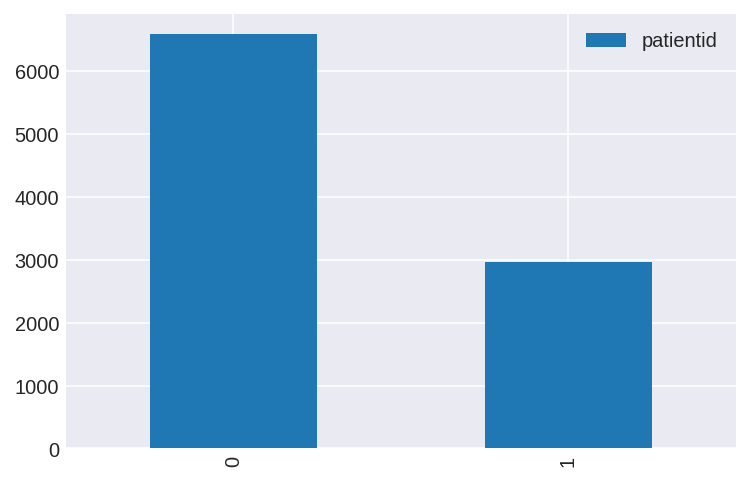

In [ ]:
male_female.plot(kind='bar')

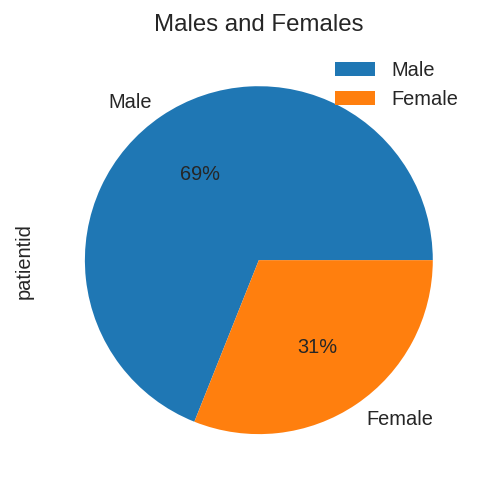

In [ ]:
male_female.plot(kind='pie',y='patientid',autopct='%.0f%%', title='Males and Females', labels=['Male','Female' ])


In [ ]:
fig = px.pie(male_female, values='patientid', names='gender' ,title='Males to Females')
fig.show()

## Age grouping analysis


In [ ]:
age_grouped = df['patientid agegroup'.split()].drop_duplicates().groupby('agegroup').count().reset_index()

In [ ]:
age_grouped.sort_values(axis=0, by='patientid')

agegroup  patientid
0    18-39        610
1    40-49        697
5      80+       1053
2    50-59       1518
3    60-69       2751
4    70-79       2908

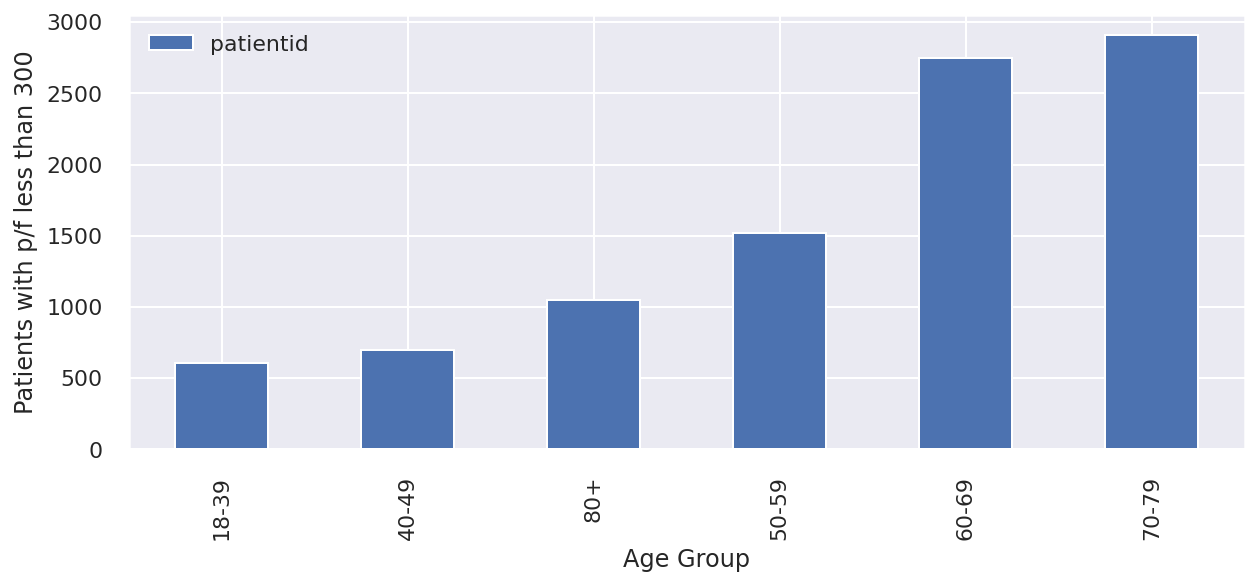

In [ ]:
age_grouped.sort_values(axis=0, by='patientid').plot.bar(x='agegroup',y='patientid', style='seaborn', ylabel='Patients with p/f less than 300', xlabel='Age Group')

---
## Getting the mode for vt and mp

In [ ]:
df['admissionid vt_kg mp rr'.split()].groupby('admissionid').agg(lambda x : x.mode()[0])


vt_kg    mp    rr
admissionid                   
0              7.8  10.7  13.0
1              6.0   9.4  15.0
2              6.6  11.5  15.0
3              6.0  18.9  20.0
4              6.4   9.9  14.0
...            ...   ...   ...
23537          5.2  11.4  20.0
23540          5.4  15.1  18.0
23541          7.1  18.6  20.0
23546          5.5   8.4  14.0
23547          7.4  19.4  18.0

[10211 rows x 3 columns]

### Defining the final mode summary dataframe

In [ ]:
df_mode = df['admissionid agegroup patientid vt_kg mp rr peep pi pfr pco2'.split()].groupby('admissionid').agg(lambda x : x.mode()[0])


In [ ]:
df_mode.loc[df_mode['vt_kg']<6].count()

agegroup     3018
patientid    3018
vt_kg        3018
mp           3018
rr           3018
dtype: int64

In [ ]:
df_mode.describe()

patientid         vt_kg            mp            rr
count  10211.000000  10211.000000  10211.000000  10211.000000
mean   10151.372833      6.654990     15.368926     16.950544
std     5855.167890      1.302194      8.445786      4.760946
min        0.000000      3.000000      5.500000      4.000000
25%     5088.500000      5.800000      9.700000     14.000000
50%    10218.000000      6.600000     12.800000     15.000000
75%    15195.500000      7.500000     18.500000     20.000000
max    20321.000000     10.000000     61.700000     58.000000

In [ ]:
df_mode.isnull().sum()

agegroup     0
patientid    0
vt_kg        0
mp           0
rr           0
dtype: int64

## Comparing MP of 3 groups

### Adding Vt group column

In [ ]:
conditions = [
    df_mode['vt_kg']<6,
    (df_mode['vt_kg']>=6) & (df_mode['vt_kg']<=8),
    df_mode['vt_kg']>8,    
]

outputs = [
    'Very Low', 'Low', 'High'
]

vt_group = np.select(conditions, outputs)
pd.Series(vt_group)

df_mode['vt_group'] = vt_group

In [ ]:
pd.Series(vt_group).isnull().sum()

0

### Count Compare and Plot

In [ ]:
df_mode.groupby('vt_group')['vt_kg'].count()

vt_group
High        1505
Low         5688
Very Low    3018
Name: vt_kg, dtype: int64

In [ ]:
very_low = df_mode[df_mode['vt_group']=='Very Low']

In [ ]:
very_low.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2954 entries, 32 to 23546
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   agegroup   2954 non-null   object 
 1   patientid  2954 non-null   int64  
 2   vt_kg      2954 non-null   float64
 3   mp         2954 non-null   float64
 4   rr         2954 non-null   float64
 5   peep       2954 non-null   float64
 6   pi         2954 non-null   float64
 7   pfr        2954 non-null   float64
 8   pco2       2954 non-null   float64
 9   vt_group   2954 non-null   object 
dtypes: float64(7), int64(1), object(2)
memory usage: 253.9+ KB


In [ ]:
very_low['mp'].describe()

count    2954.000000
mean       13.998781
std         8.137776
min         5.500000
25%         8.600000
50%        11.300000
75%        16.900000
max        59.500000
Name: mp, dtype: float64

In [ ]:
2954/40

73.85

In [ ]:
pd.qcut(very_low['mp'],q=3)

admissionid
32        (9.4, 14.4]
49       (5.499, 9.4]
51       (5.499, 9.4]
58       (14.4, 59.5]
67       (14.4, 59.5]
             ...     
23520    (5.499, 9.4]
23536    (5.499, 9.4]
23537     (9.4, 14.4]
23540    (14.4, 59.5]
23546    (5.499, 9.4]
Name: mp, Length: 2954, dtype: category
Categories (3, interval[float64, right]): [(5.499, 9.4] < (9.4, 14.4] < (14.4, 59.5]]

In [ ]:
very_low.describe()

patientid        vt_kg           mp           rr         peep  \
count   2954.000000  2954.000000  2954.000000  2954.000000  2954.000000   
mean   10094.199391     5.156635    13.998781    18.411307     7.790792   
std     5830.232373     0.659658     8.137776     5.389510     3.252169   
min       31.000000     3.000000     5.500000     5.000000     2.000000   
25%     5016.750000     4.800000     8.600000    15.000000     5.000000   
50%    10190.500000     5.300000    11.300000    16.000000     8.000000   
75%    15085.750000     5.700000    16.900000    20.000000    10.000000   
max    20320.000000     5.900000    59.500000    58.000000    26.000000   

                pi          pfr         pco2  
count  2954.000000  2954.000000  2954.000000  
mean     12.575829   182.108869    44.658429  
std       4.773201    65.573953    10.714191  
min       2.000000    41.000000    20.000000  
25%      10.000000   128.000000    38.000000  
50%      12.000000   186.000000    43.000000  
75%      15.000000   236.000000    49.000000  
max      40.000000   298.300000   118.000000

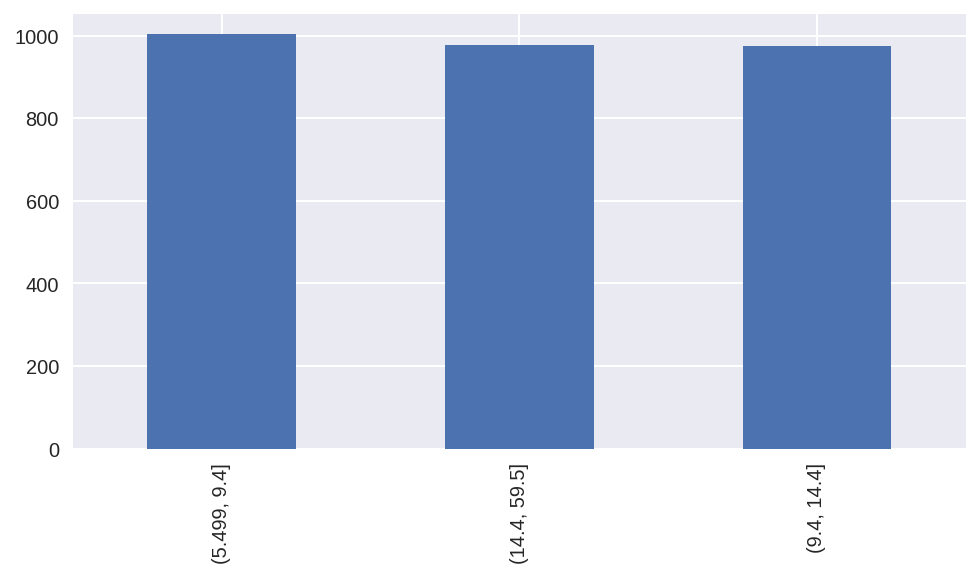

In [ ]:
pd.qcut(very_low['mp'],q=3).value_counts().plot.bar(figsize=(8,4))

In [ ]:
very_low['tertile'] = pd.qcut(very_low['mp'],q=74, labels=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
very_low.head()

agegroup  patientid  vt_kg    mp    rr  peep    pi    pfr  pco2  \
admissionid                                                                   
4949             80+       4305    3.0  10.0  25.0  16.0  15.0   92.0  40.0   
14174          18-39      12221    3.0  10.0  20.0   5.0  19.0  260.0  46.0   
15402          60-69      13298    3.0   7.8  15.0  10.0  12.0  225.0  40.0   
1934           40-49       1683    3.0  14.9  18.0   8.0  15.0  247.5  27.0   
3909           70-79       3395    3.1   6.0  15.0  15.0  30.0  114.0  63.0   

             vt_group  tertile  
admissionid                     
4949         Very Low       28  
14174        Very Low       28  
15402        Very Low       12  
1934         Very Low       50  
3909         Very Low        2

In [ ]:
very_low.groupby('tertile')['mp'].median()

tertile
0      5.60
1      5.90
2      6.00
3      6.30
4      6.50
      ...  
69    29.50
70    31.00
71    34.10
72    38.45
73    48.00
Name: mp, Length: 74, dtype: float64

In [ ]:
vlow_tertile_meds = very_low.groupby('tertile')['mp'].median()


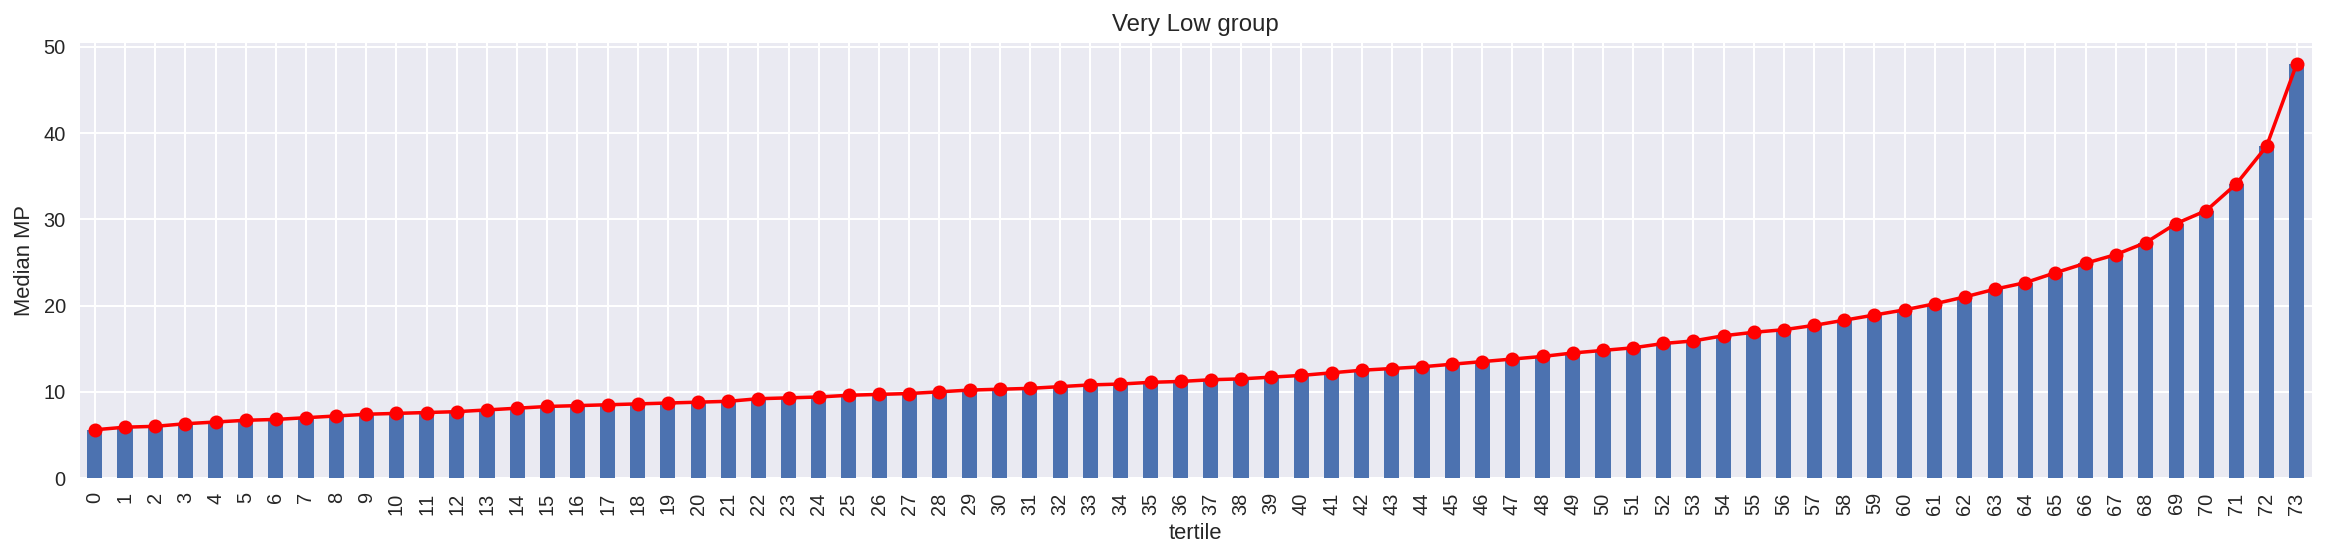

In [ ]:
ax = very_low.groupby('tertile')['mp'].median().plot(
    x='tertile', linestyle='-', marker='o',color='r')
very_low.groupby('tertile')['mp'].median().plot(x='tertile', kind='bar',
                                                        ax=ax, figsize=(20,4), title='Very Low group', ylabel='Median MP')

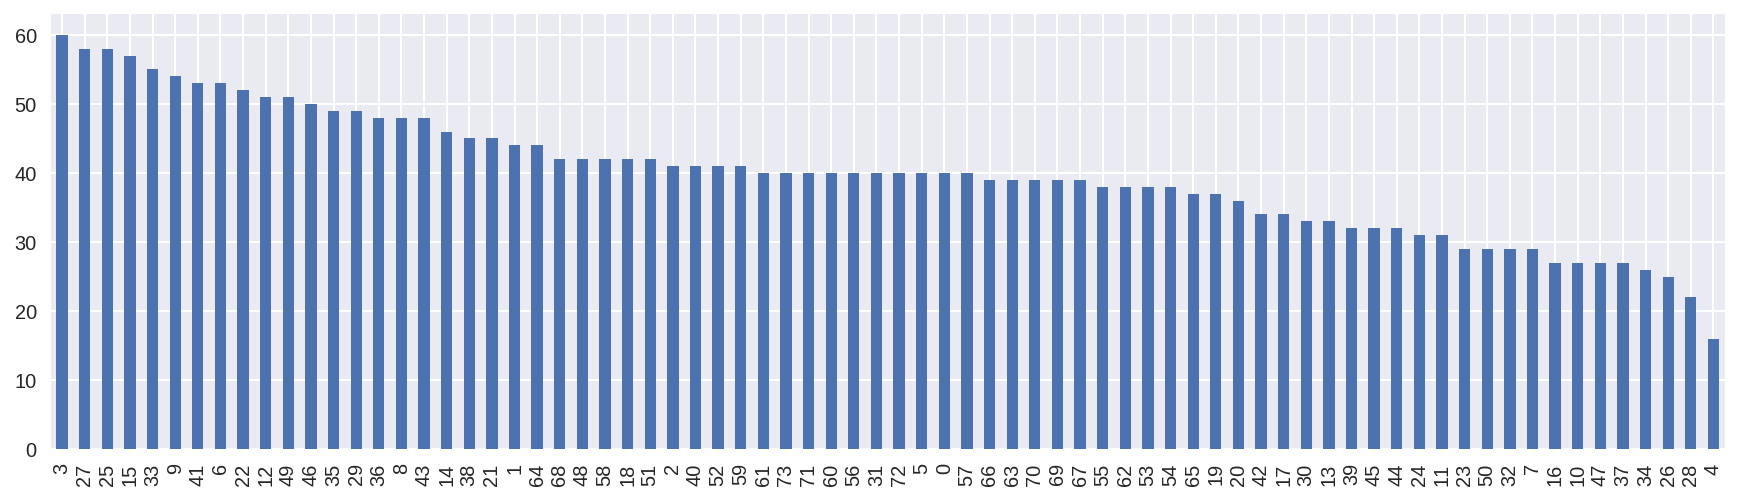

In [ ]:
pd.qcut(very_low['mp'],q=74, labels=False).value_counts().plot.bar(figsize=(15,4))

In [ ]:
very_low = very_low.sort_values(axis=0,by='vt_kg')

In [ ]:
very_low.head()

agegroup  patientid  vt_kg    mp    rr  peep    pi    pfr  pco2  \
admissionid                                                                   
4949             80+       4305    3.0  10.0  25.0  16.0  15.0   92.0  40.0   
14174          18-39      12221    3.0  10.0  20.0   5.0  19.0  260.0  46.0   
15402          60-69      13298    3.0   7.8  15.0  10.0  12.0  225.0  40.0   
1934           40-49       1683    3.0  14.9  18.0   8.0  15.0  247.5  27.0   
3909           70-79       3395    3.1   6.0  15.0  15.0  30.0  114.0  63.0   

             vt_group  
admissionid            
4949         Very Low  
14174        Very Low  
15402        Very Low  
1934         Very Low  
3909         Very Low

### Low group tertiles

In [ ]:
low = df_mode[df_mode['vt_group']=='Low']


In [ ]:
low.count()

agegroup     5704
patientid    5704
vt_kg        5704
mp           5704
rr           5704
peep         5704
pi           5704
pfr          5704
pco2         5704
vt_group     5704
dtype: int64

In [ ]:
5704/40


142.6

In [ ]:
low['tertile'] = pd.qcut(low['mp'],q=143, labels=False, duplicates='drop')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
low.head()

agegroup  patientid  vt_kg    mp    rr  peep    pi    pfr  pco2  \
admissionid                                                                   
0                80+          0    7.8  10.7  13.0   7.0  12.0  180.0  39.0   
1              60-69          1    6.0   9.4  15.0   5.0  10.0  216.0  38.0   
2              60-69          2    6.6  11.5  15.0   8.0   7.0  267.5  43.0   
3              50-59          3    6.0  18.9  20.0   8.0  12.0  162.0  40.0   
4              70-79          4    6.4   9.0  14.0   8.0   8.0  156.0  43.0   

            vt_group  tertile  
admissionid                    
0                Low       38  
1                Low       24  
2                Low       47  
3                Low      100  
4                Low       20

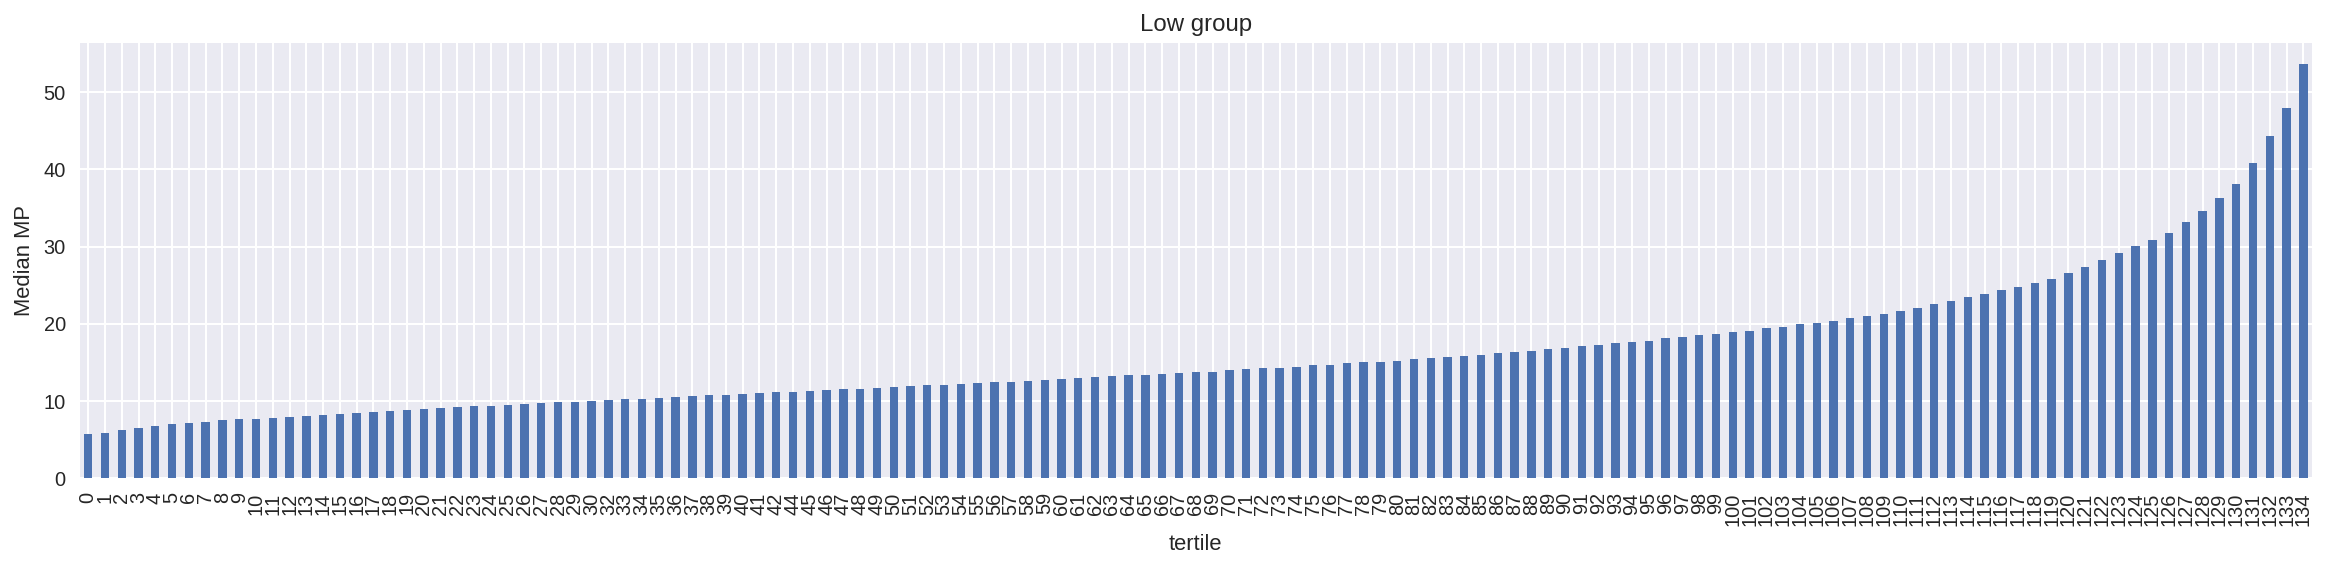

In [ ]:
low.groupby('tertile')['mp'].median().plot.bar(figsize=(20,4), title='Low group', ylabel='Median MP')


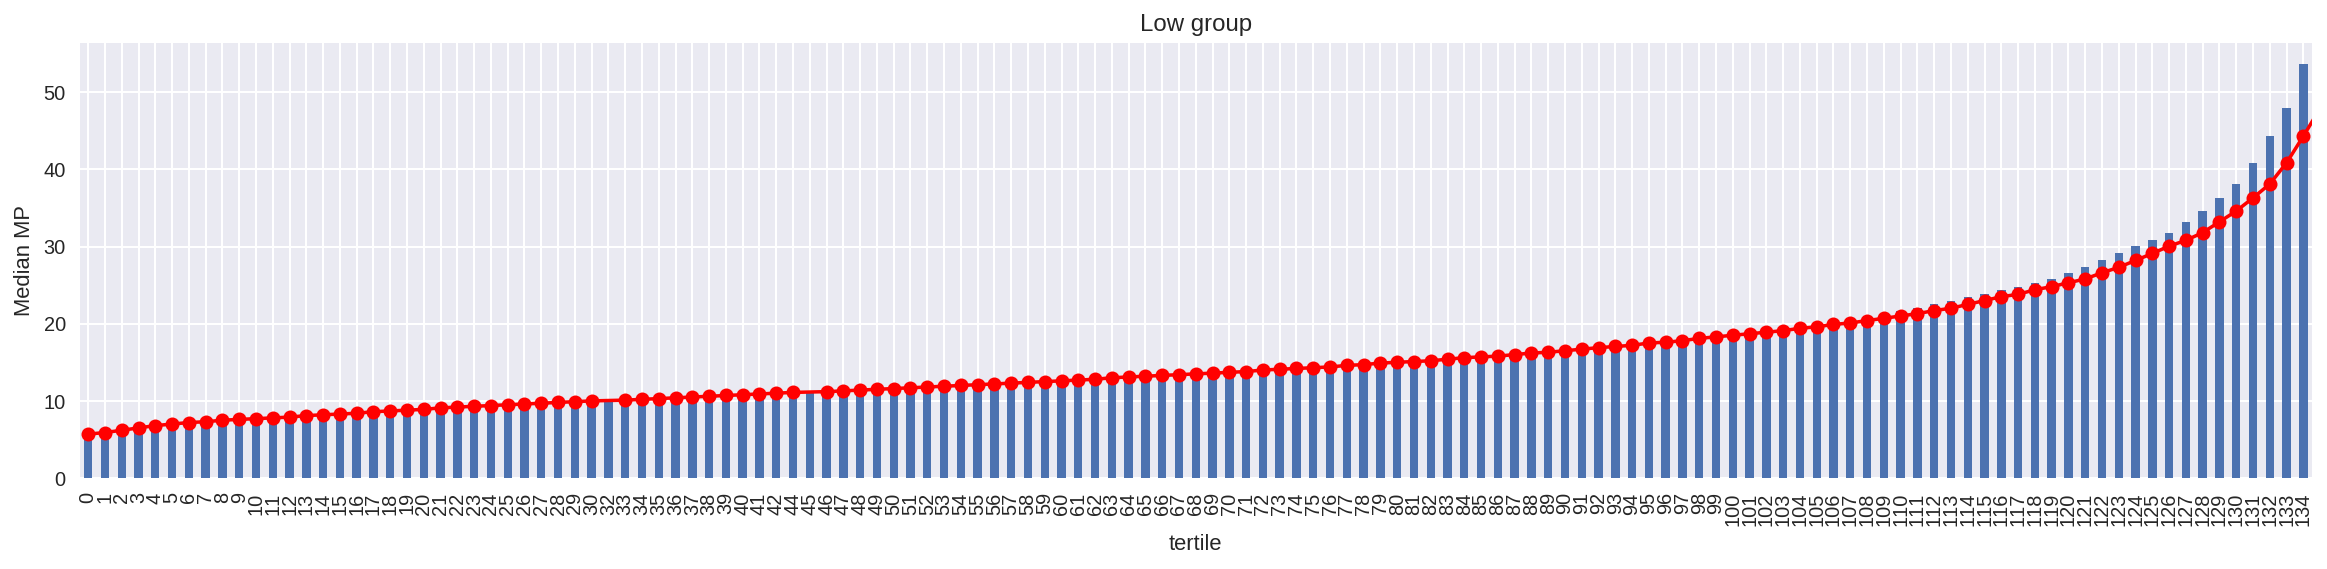

In [ ]:
ax = low.groupby('tertile')['mp'].median().plot(
    x='tertile', linestyle='-', marker='o',color='r')
low.groupby('tertile')['mp'].median().plot(x='tertile', kind='bar',
                                                        ax=ax, figsize=(20,4), title='Low group', ylabel='Median MP')

In [ ]:
low_tertiles_meds = low.groupby('tertile')['mp'].median()

### high tertile group

In [ ]:
high = df_mode[df_mode['vt_group']=='High']


In [ ]:
high.count()

NameError: ignored

In [ ]:
1545/40


38.625

In [ ]:
high['tertile'] = pd.qcut(high['mp'],q=39, labels=False, duplicates='drop')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
high.head()

agegroup  patientid  vt_kg    mp    rr  peep    pi    pfr  pco2  \
admissionid                                                                   
9              70-79          9    8.5  12.1  14.0  10.0  12.0  130.0  50.0   
19             50-59         18    9.5  31.7  20.0  15.0  15.0   56.0  27.0   
31             50-59         30    9.1  12.2  12.0   6.0  14.0  158.2  41.0   
50             50-59         46    8.4  27.5  20.0   8.0  12.0   90.0  33.0   
54             70-79         50    9.2  20.3  26.0   5.0  13.0  133.3  28.0   

            vt_group  tertile  
admissionid                    
9               High       11  
19              High       35  
31              High       11  
50              High       33  
54              High       27

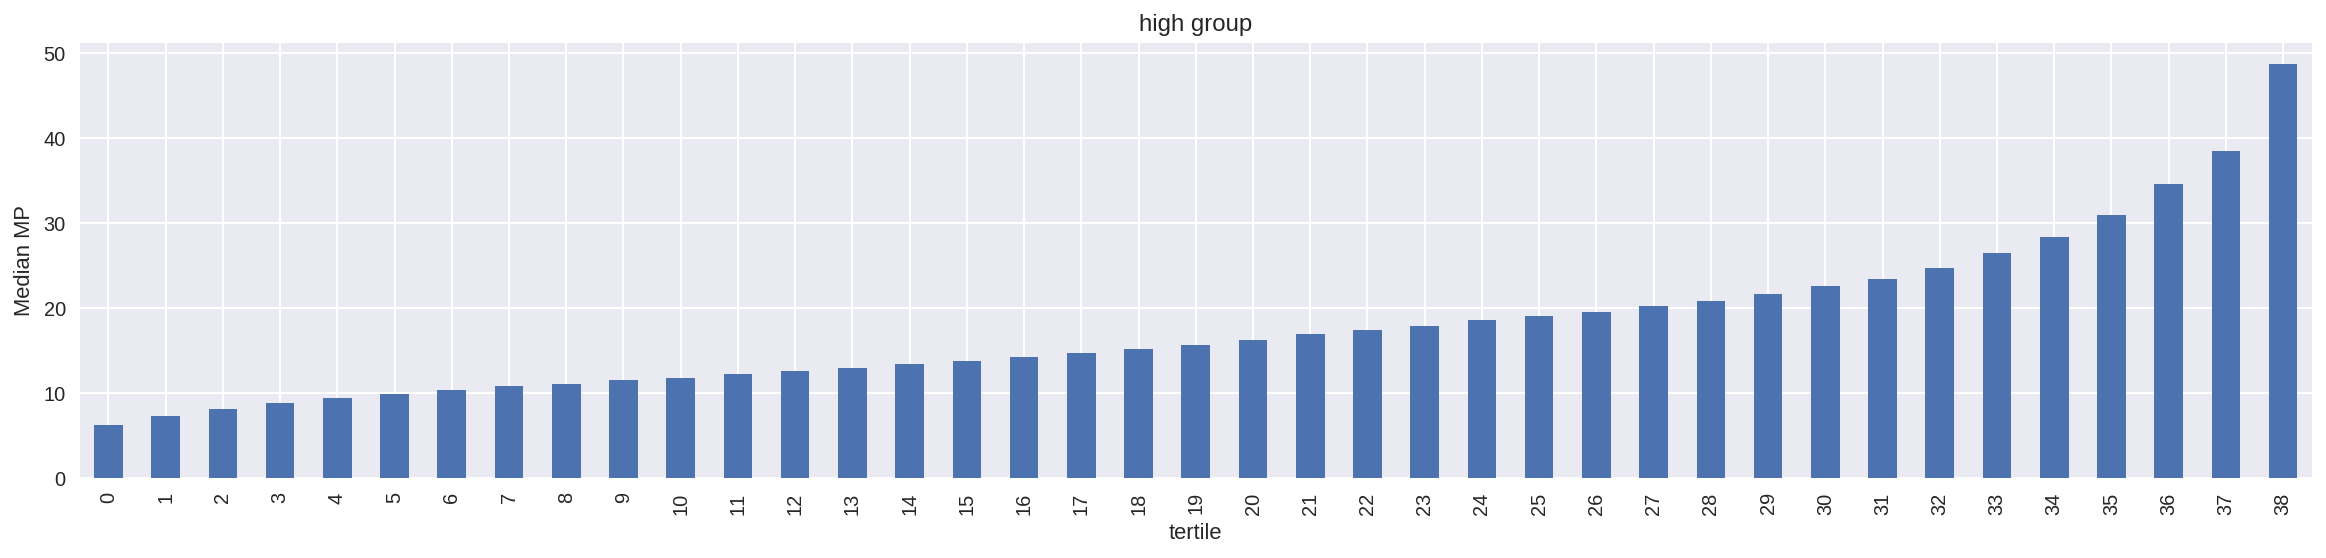

In [ ]:
high.groupby('tertile')['mp'].median().plot.bar(figsize=(20,4), title='high group', ylabel='Median MP')


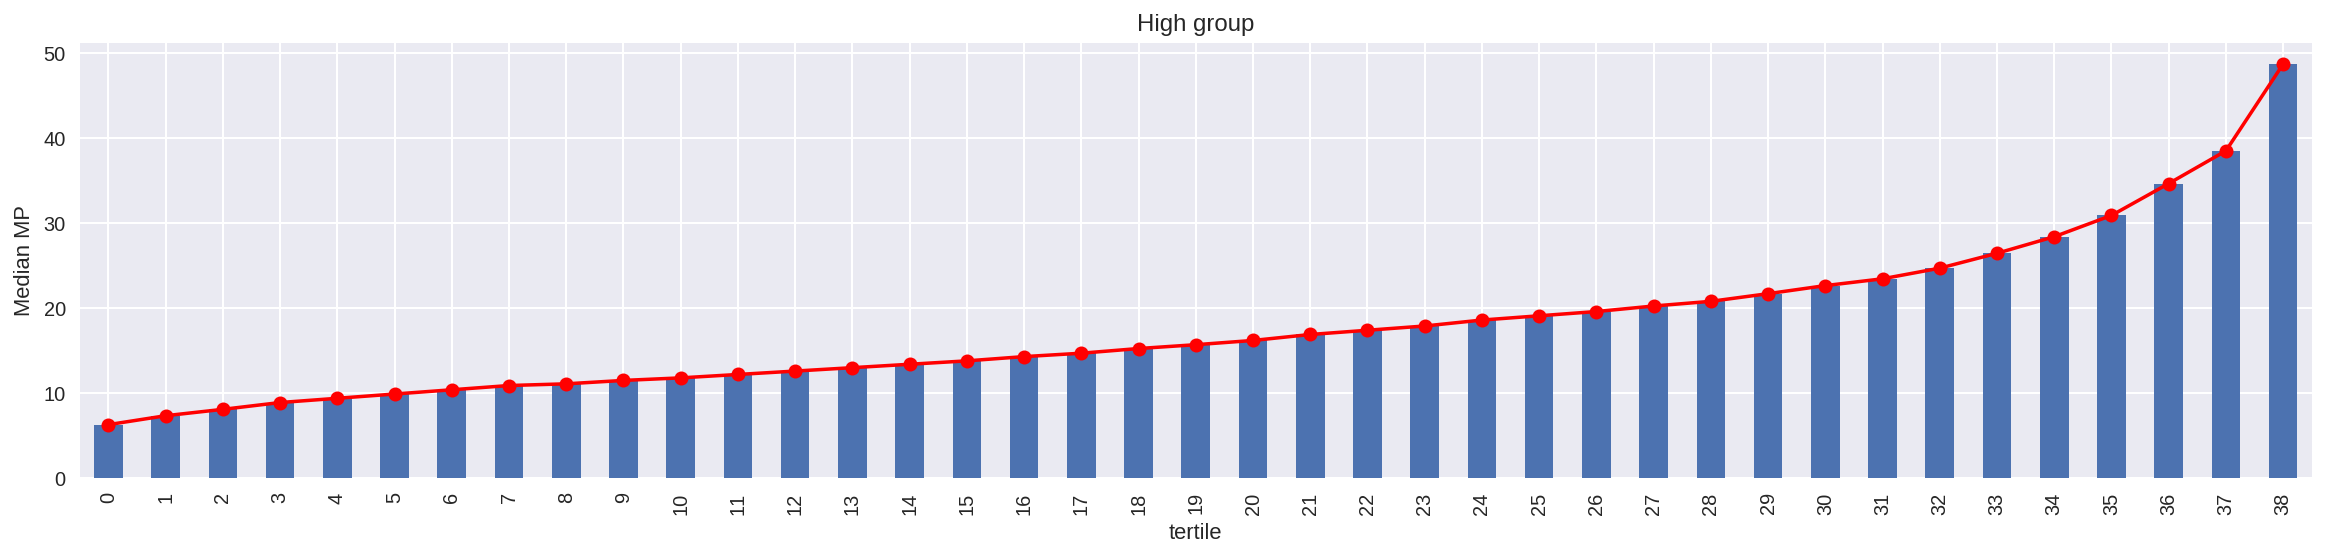

In [ ]:
ax = high.groupby('tertile')['mp'].median().plot(
    x='tertile', linestyle='-', marker='o',color='r')
high.groupby('tertile')['mp'].median().plot(x='tertile', kind='bar',
                                                        ax=ax, figsize=(20,4), title='High group', ylabel='Median MP')

In [ ]:
high_tertiles_meds = high.groupby('tertile')['mp'].median()

In [ ]:
high['tertile'] = pd.qcut(high['mp'],q=74, labels=False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
high.groupby('tertile')['mp'].median()


tertile
0      5.80
1      6.50
2      7.20
3      7.60
4      7.95
      ...  
69    34.90
70    37.00
71    38.90
72    44.10
73    55.10
Name: mp, Length: 74, dtype: float64

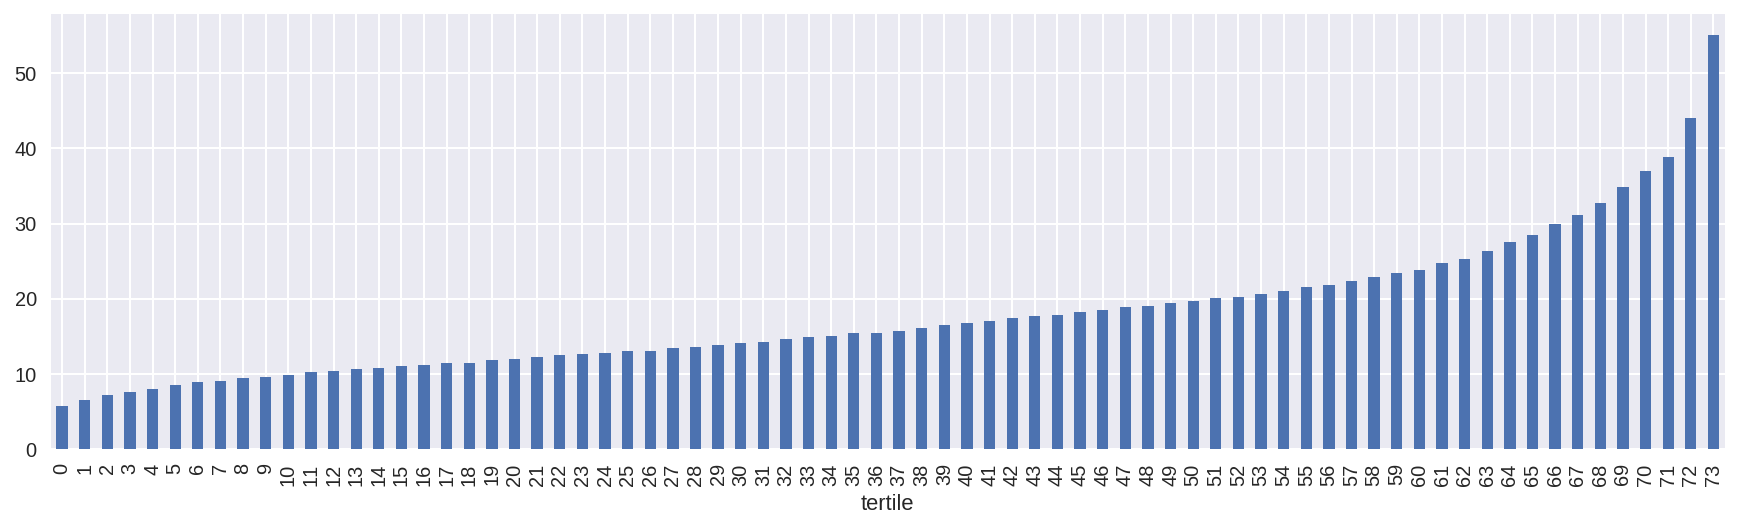

In [ ]:
high.groupby('tertile')['mp'].median().plot.bar(figsize=(15,4))

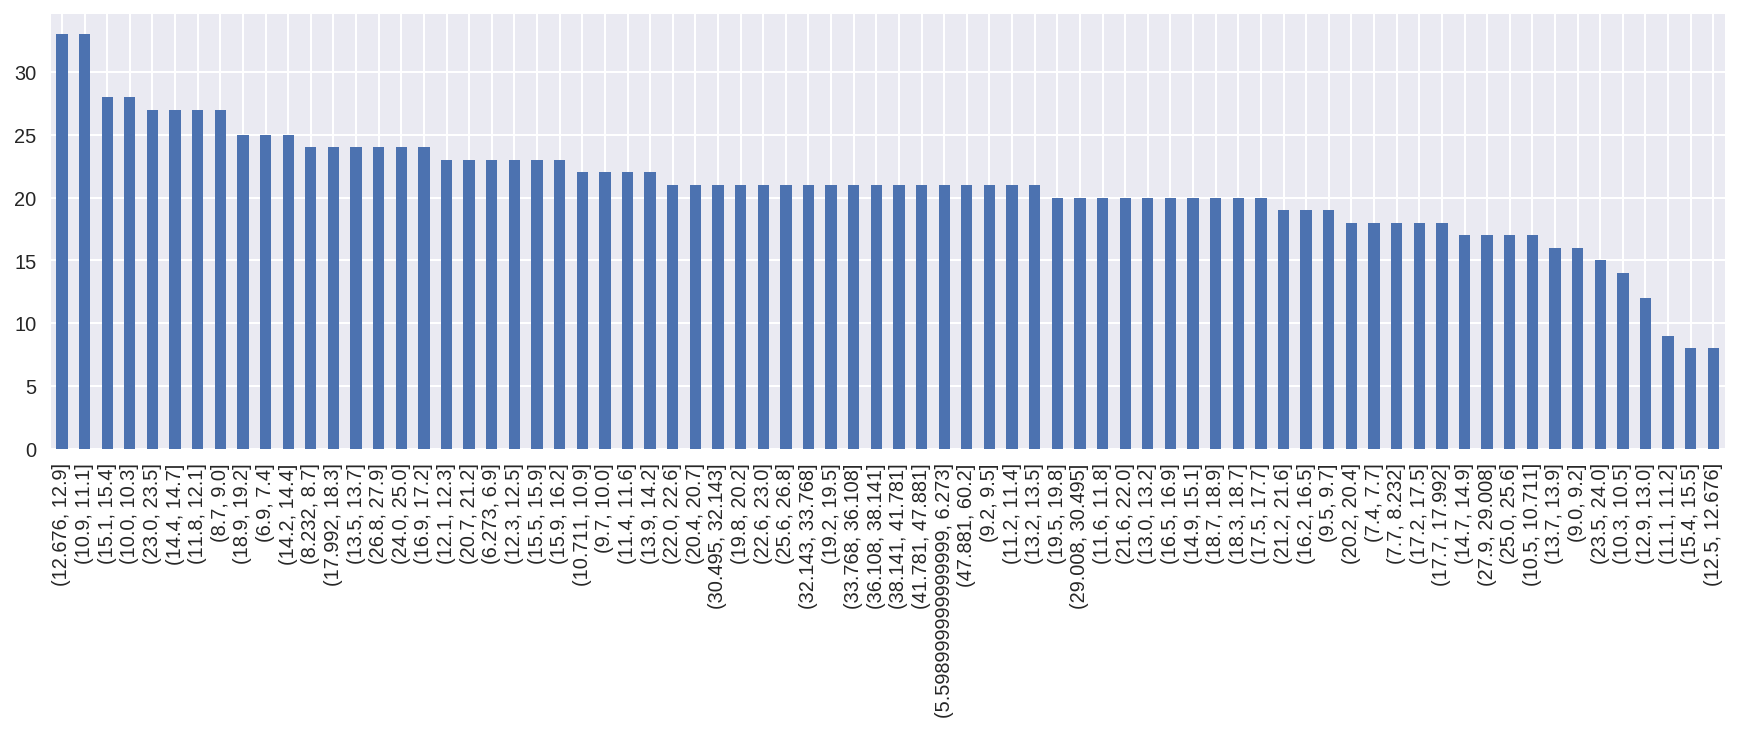

In [ ]:
pd.qcut(high['mp'],q=74).value_counts().plot.bar(figsize=(15,4))


In [ ]:
df_mode.count()

agegroup     10203
patientid    10203
vt_kg        10203
mp           10203
rr           10203
peep         10203
pi           10203
pfr          10203
pco2         10203
vt_group     10203
dtype: int64

In [ ]:
10203/40


255.075

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  """Entry point for launching an IPython kernel.


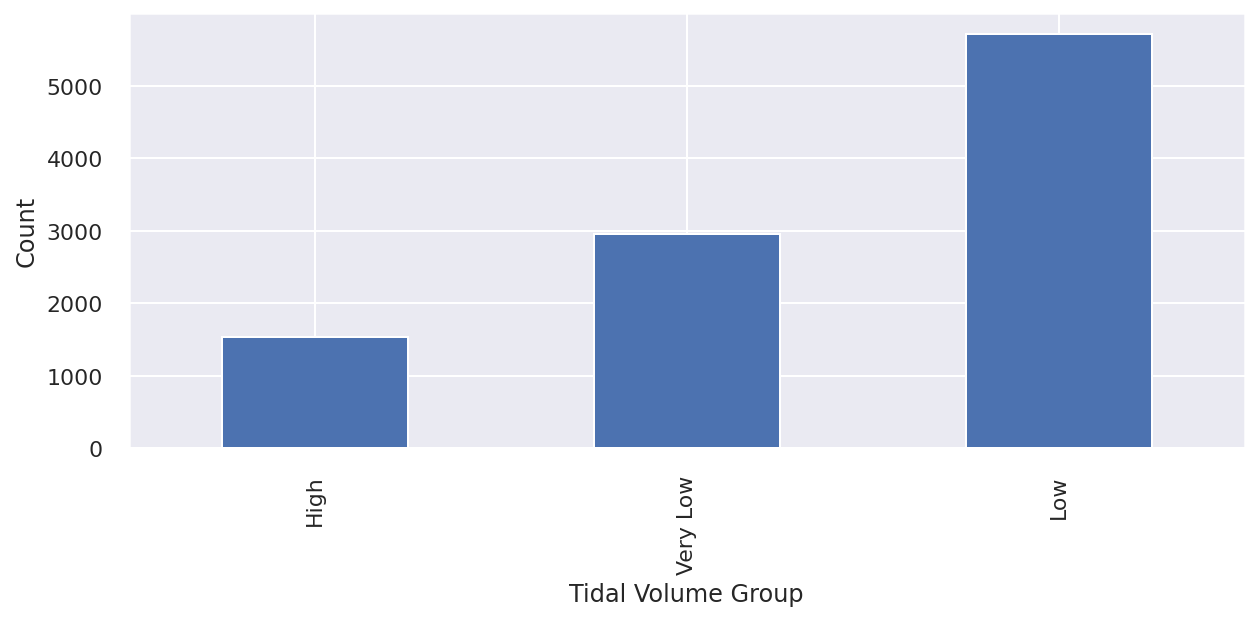

In [ ]:
df_mode.groupby('vt_group')['vt_kg'].count().sort_values(0).plot.bar(xlabel='Tidal Volume Group', ylabel='Count')

### Histogram Plotting Comparison

In [ ]:
plt.style.use('seaborn')
plt.rcParams["figure.dpi"] = 144

vt_group
High        AxesSubplot(0.125,0.125;0.775x0.755)
Low         AxesSubplot(0.125,0.125;0.775x0.755)
Very Low    AxesSubplot(0.125,0.125;0.775x0.755)
Name: mp, dtype: object

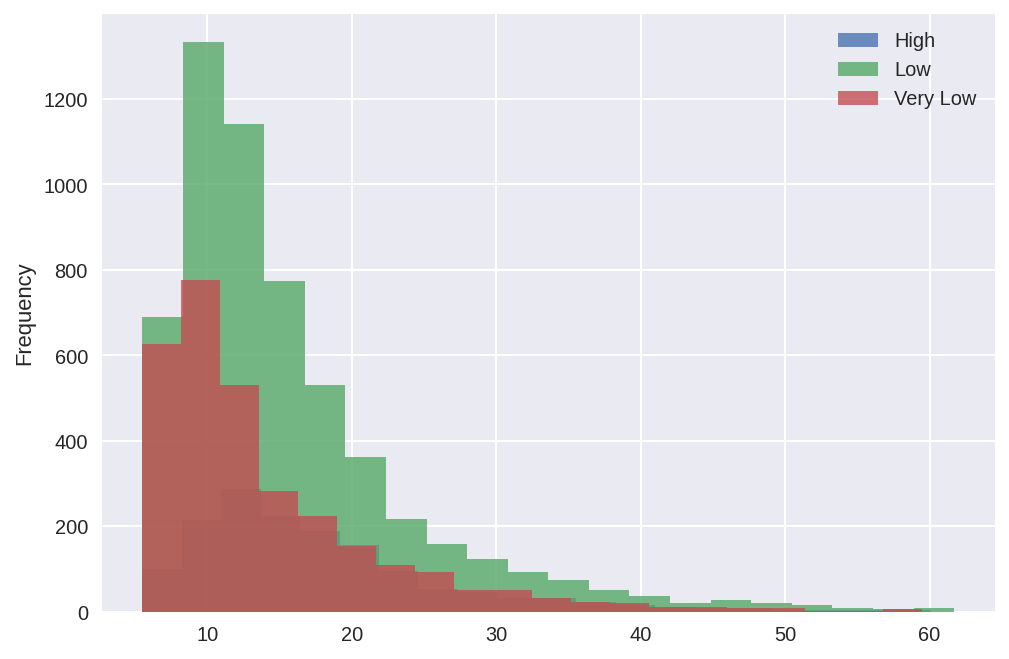

In [ ]:
df_mode.groupby('vt_group')['mp'].plot.hist(bins=20, legend=True, alpha=0.8)


vt_group
High        AxesSubplot(0.125,0.125;0.775x0.755)
Low         AxesSubplot(0.125,0.125;0.775x0.755)
Very Low    AxesSubplot(0.125,0.125;0.775x0.755)
Name: mp, dtype: object

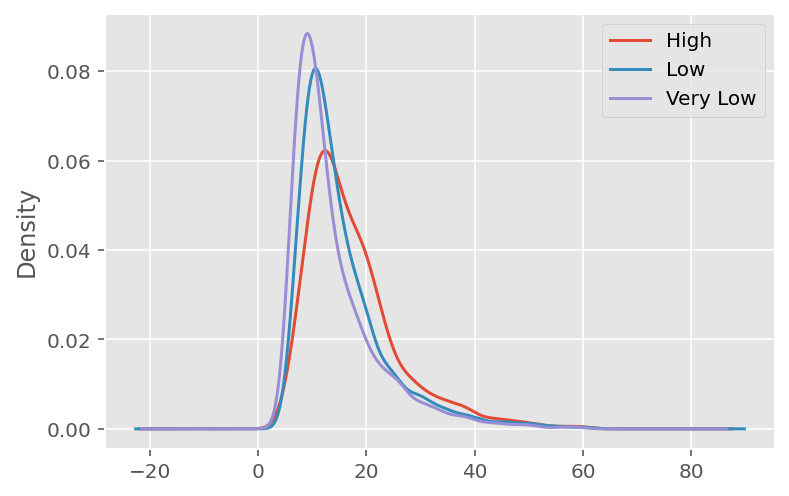

In [ ]:
df_mode.groupby('vt_group')['mp'].plot.kde(legend=True)


In [ ]:
sns.set(rc={"figure.figsize":(8, 4)}) #width=8, height=4

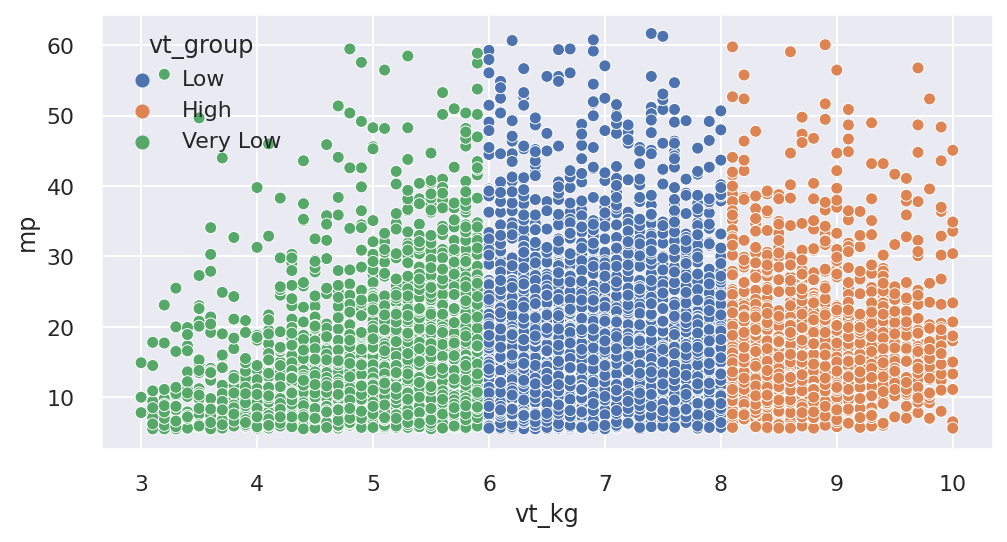

In [ ]:
sns.scatterplot(data=df_mode['vt_kg mp vt_group'.split()],x='vt_kg',y='mp',hue='vt_group')

In [ ]:
sns.set(rc={"figure.figsize":(10, 4)}) #width=8, height=4


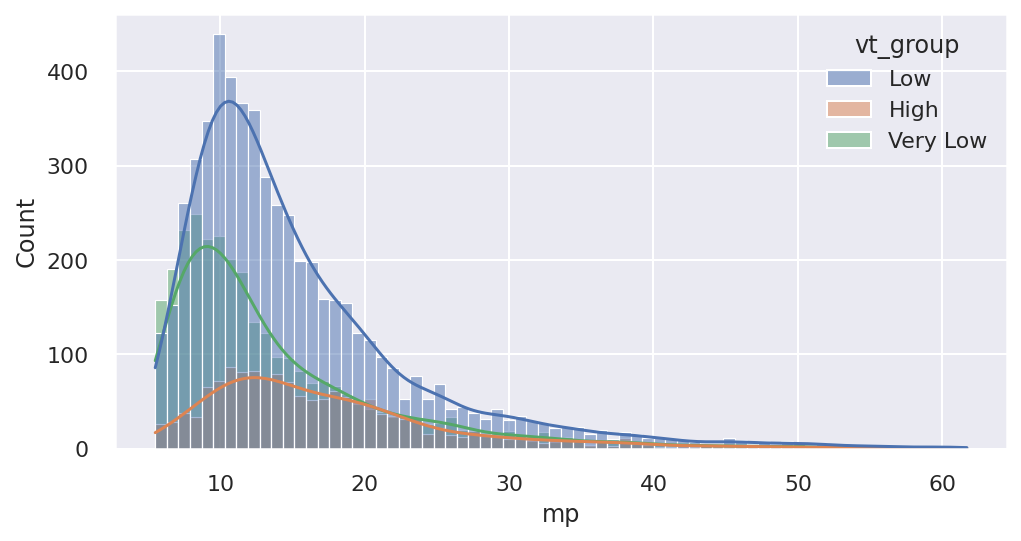

In [ ]:
sns.histplot(data=df_mode['vt_kg mp vt_group'.split()],x='mp',hue='vt_group',kde=True)


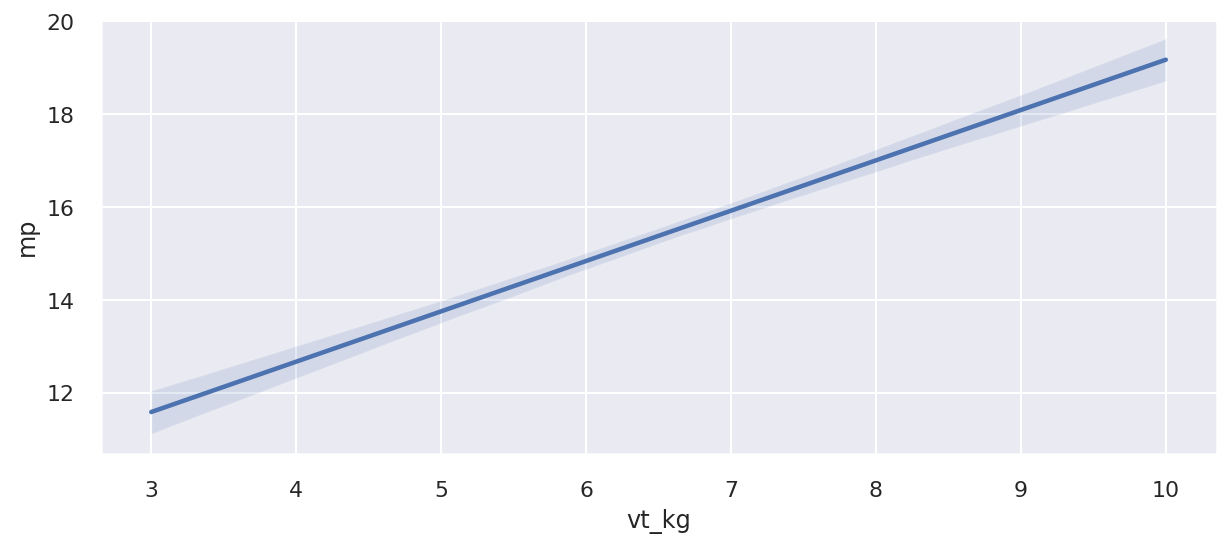

In [ ]:
sns.regplot(data = df_mode['vt_kg mp vt_group'.split()],x='vt_kg',y='mp', scatter=False)


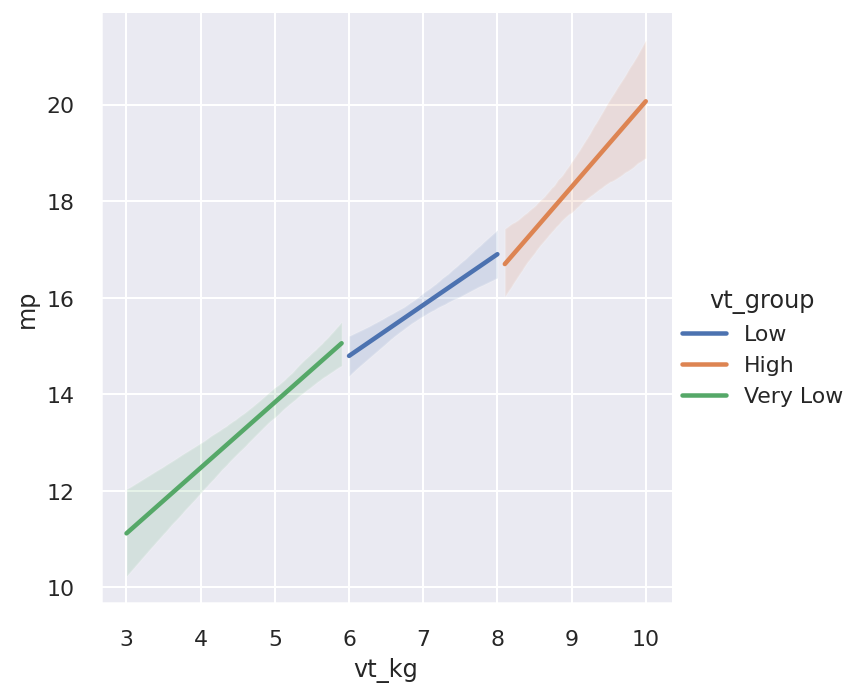

In [ ]:
sns.lmplot(data = df_mode['vt_kg mp vt_group'.split()],x='vt_kg',y='mp', scatter=False, hue='vt_group')


## RR per group

In [ ]:
df_mode['vt_kg rr vt_group'.split()].groupby('vt_group').describe()

vt_kg                                                    rr  \
           count      mean       std  min  25%  50%  75%   max   count   
vt_group                                                                 
High      1505.0  8.747375  0.515422  8.1  8.3  8.7  9.1  10.0  1505.0   
Low       5688.0  6.895974  0.578776  6.0  6.4  6.9  7.4   8.0  5688.0   
Very Low  3018.0  5.157389  0.661574  3.0  4.8  5.3  5.7   5.9  3018.0   

                                                            
               mean       std  min   25%   50%   75%   max  
vt_group                                                    
High      15.716944  3.976278  4.0  13.0  15.0  17.0  38.0  
Low       16.529887  4.472901  5.0  14.0  15.0  18.0  58.0  
Very Low  18.358516  5.295012  5.0  15.0  16.0  20.0  58.0

In [ ]:
df_mode['vt_kg rr vt_group'.split()].groupby('vt_group').median()


vt_kg    rr
vt_group             
High        8.7  15.0
Low         6.9  15.0
Very Low    5.3  16.0

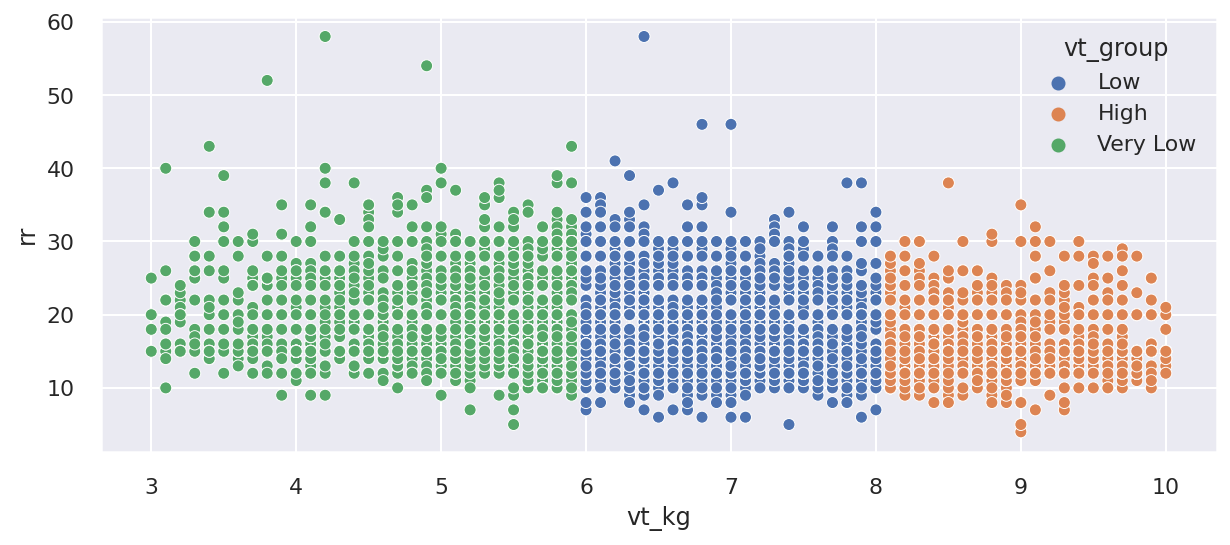

In [ ]:
sns.scatterplot(data=df_mode['vt_kg rr vt_group'.split()],x='vt_kg',y='rr',hue='vt_group')


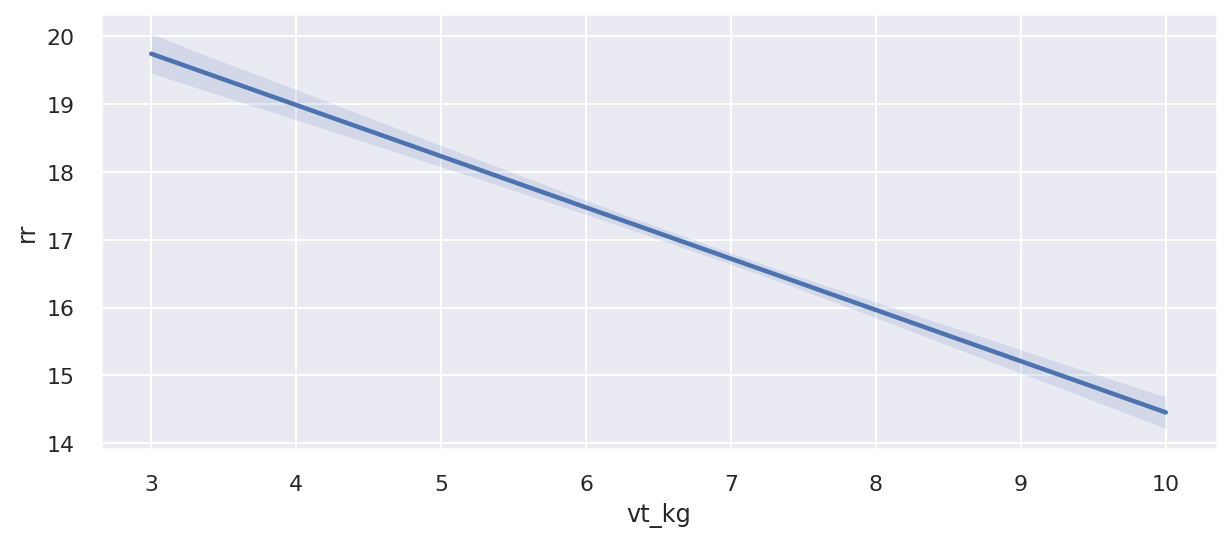

In [ ]:
sns.regplot(data = df_mode['vt_kg rr vt_group'.split()],x='vt_kg',y='rr', scatter=False)


## PEEP per group

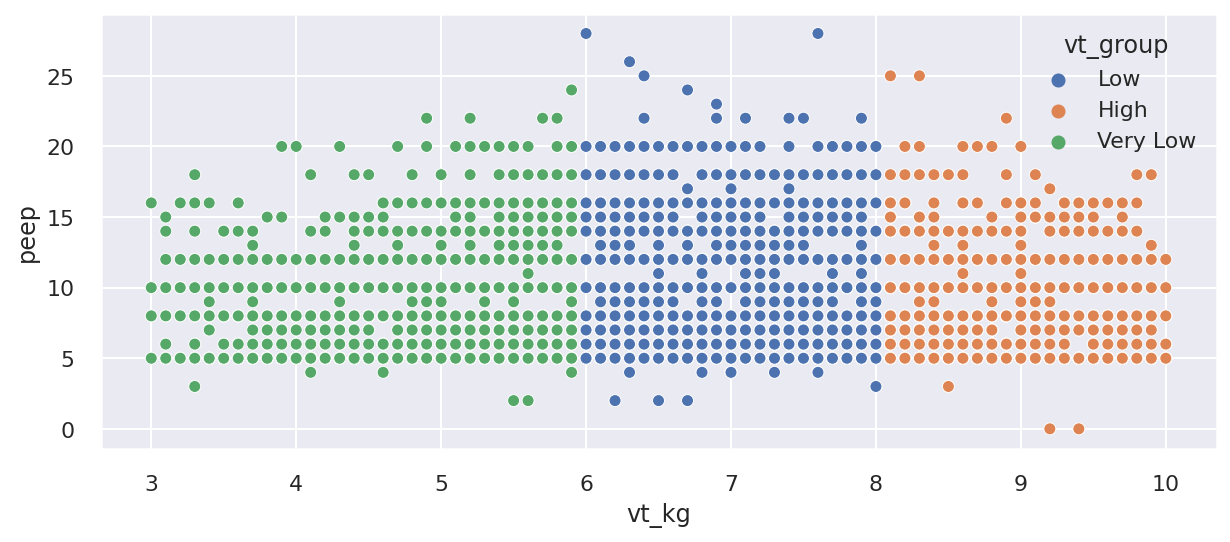

In [ ]:
sns.scatterplot(data=df_mode['vt_kg peep vt_group'.split()],x='vt_kg',y='peep',hue='vt_group')


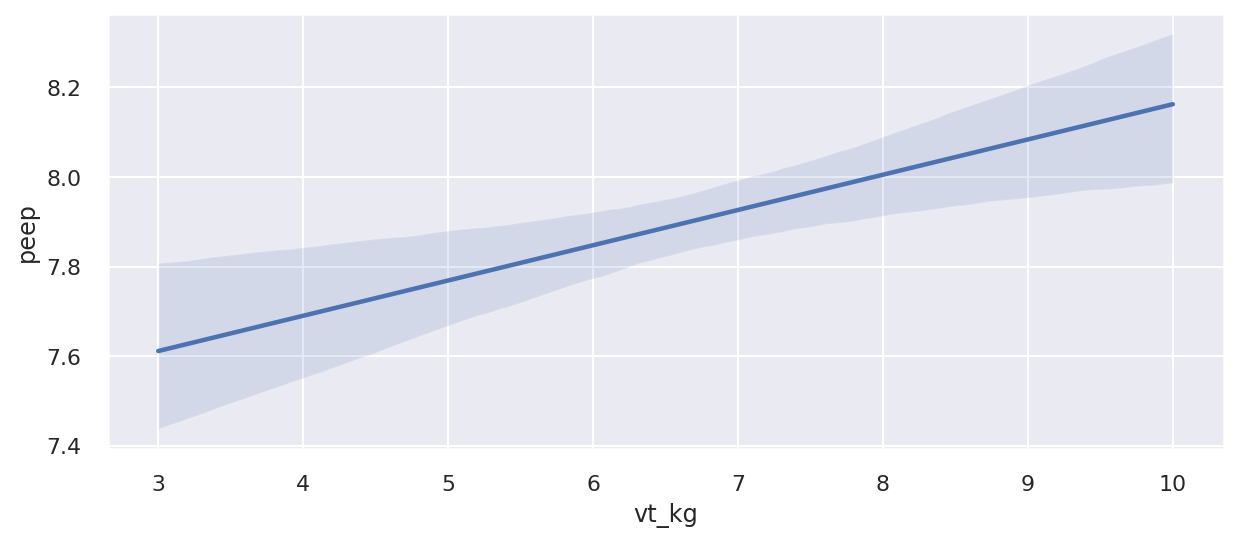

In [ ]:
sns.regplot(data = df_mode['vt_kg peep vt_group'.split()],x='vt_kg',y='peep', scatter=False)


In [ ]:
df_mode['vt_kg peep vt_group'.split()].groupby('vt_group').describe()


vt_kg                                                  peep  \
           count      mean       std  min  25%  50%  75%   max   count   
vt_group                                                                 
High      1505.0  8.747375  0.515422  8.1  8.3  8.7  9.1  10.0  1505.0   
Low       5688.0  6.895974  0.578776  6.0  6.4  6.9  7.4   8.0  5688.0   
Very Low  3018.0  5.157389  0.661574  3.0  4.8  5.3  5.7   5.9  3018.0   

                                                         
              mean       std  min  25%  50%   75%   max  
vt_group                                                 
High      8.138870  3.292680  0.0  5.0  8.0  10.0  25.0  
Low       7.875545  3.297785  0.1  5.0  8.0  10.0  28.0  
Very Low  7.794897  3.232974  2.0  5.0  8.0  10.0  24.0

In [ ]:
df_mode['vt_kg peep vt_group'.split()].groupby('vt_group').median()


vt_kg  peep
vt_group             
High        8.7   8.0
Low         6.9   8.0
Very Low    5.3   8.0

## Pressure Above PEEP per group

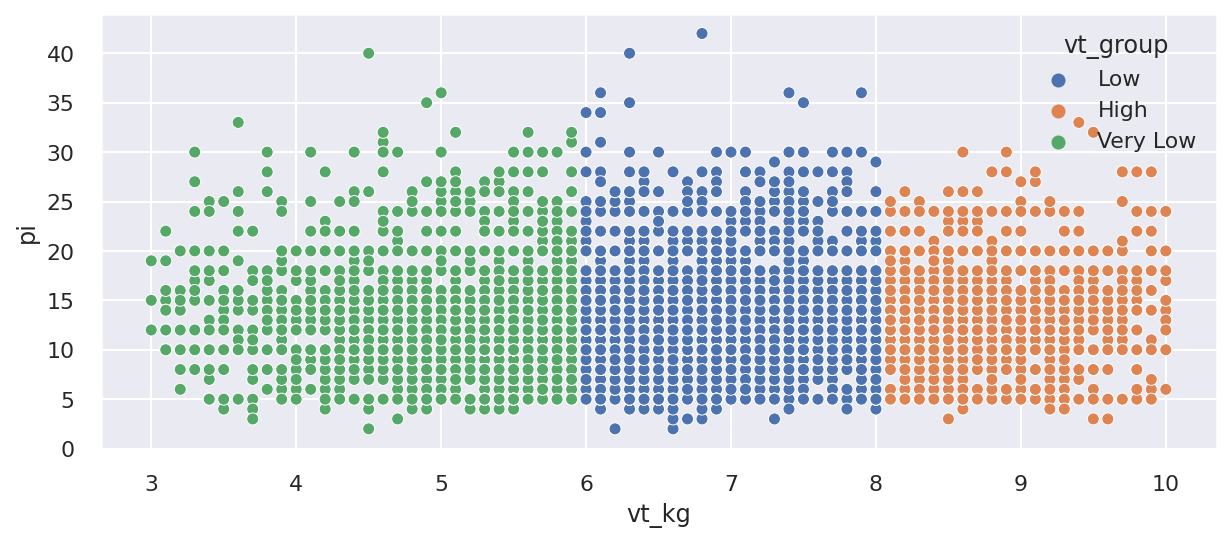

In [ ]:
sns.scatterplot(data=df_mode['vt_kg pi vt_group'.split()],x='vt_kg',y='pi',hue='vt_group')


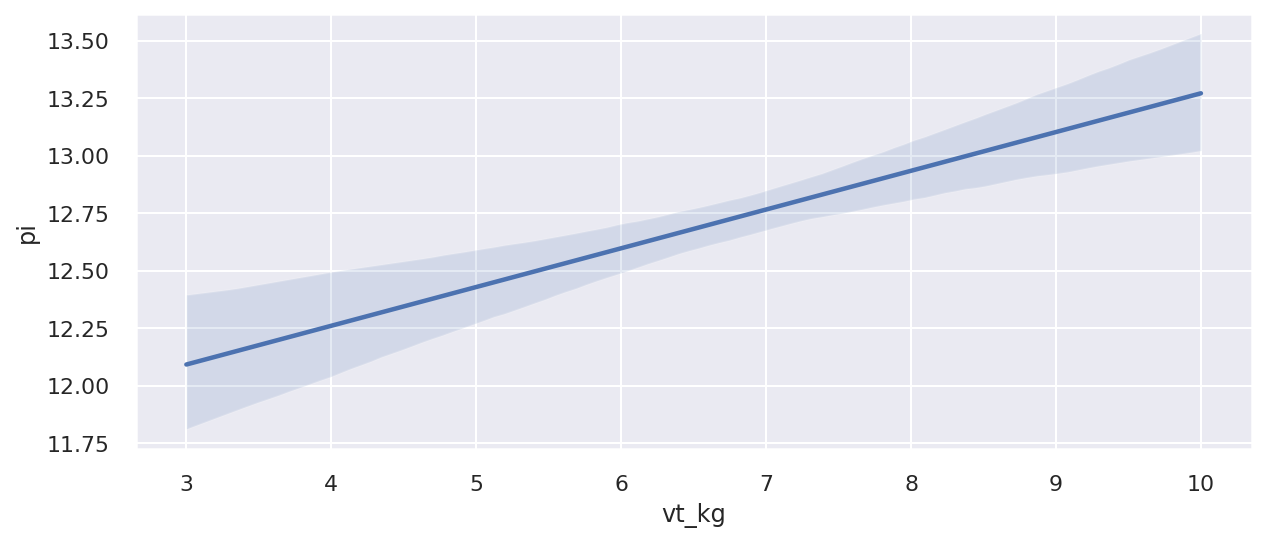

In [ ]:
sns.regplot(data = df_mode['vt_kg pi vt_group'.split()],x='vt_kg',y='pi', scatter=False)


In [ ]:
df_mode['vt_kg pi vt_group'.split()].groupby('vt_group').describe()


vt_kg                                                    pi  \
           count      mean       std  min  25%  50%  75%   max   count   
vt_group                                                                 
High      1505.0  8.747375  0.515422  8.1  8.3  8.7  9.1  10.0  1505.0   
Low       5688.0  6.895974  0.578776  6.0  6.4  6.9  7.4   8.0  5688.0   
Very Low  3018.0  5.157389  0.661574  3.0  4.8  5.3  5.7   5.9  3018.0   

                                                            
               mean       std  min   25%   50%   75%   max  
vt_group                                                    
High      13.326910  4.382111  3.0  10.0  13.0  16.0  33.0  
Low       12.574719  4.224287  2.0  10.0  12.0  15.0  42.0  
Very Low  12.557323  4.730895  2.0  10.0  12.0  15.0  40.0

In [ ]:
df_mode['vt_kg pi vt_group'.split()].groupby('vt_group').median()


vt_kg    pi
vt_group             
High        8.7  13.0
Low         6.9  12.0
Very Low    5.3  12.0

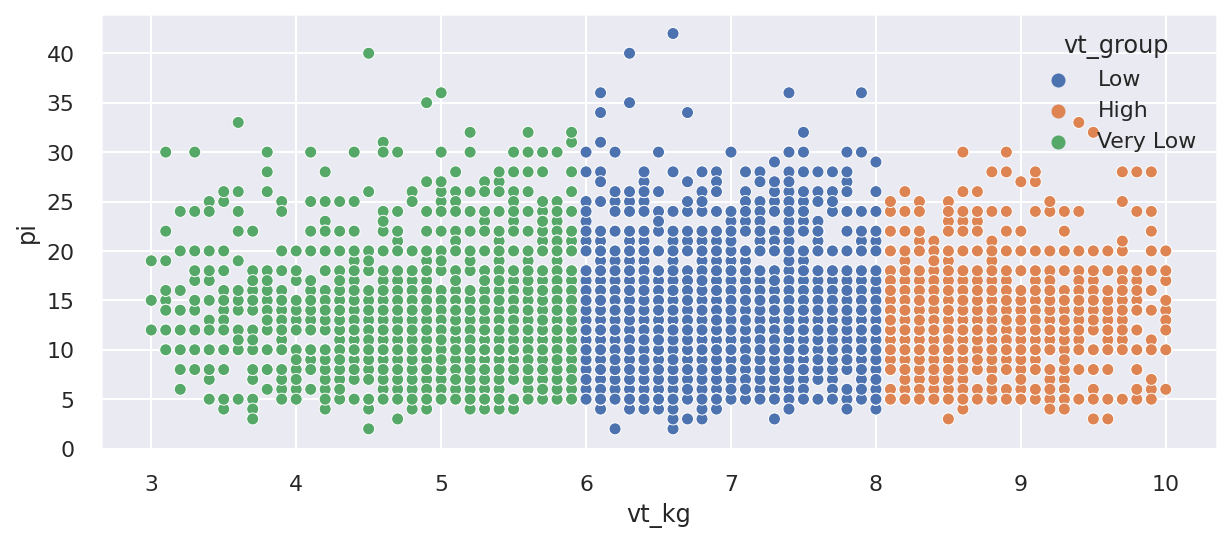

In [ ]:
sns.scatterplot(data=df_mode['vt_kg pi vt_group'.split()],x='vt_kg',y='pi',hue='vt_group')


In [ ]:
df_mode['vt_kg rr peep pi mp vt_group'.split()].groupby('vt_group').median()


vt_kg    rr  peep    pi    mp
vt_group                               
High        8.7  15.0   8.0  13.0  15.4
Low         6.9  15.0   8.0  12.0  13.0
Very Low    5.3  16.0   8.0  12.0  11.3

In [ ]:
df_mode['vt_kg rr peep pi mp vt_group'.split()].groupby('vt_group').mean()


vt_kg         rr      peep         pi         mp
vt_group                                                     
High      8.747375  15.716944  8.138870  13.326910  17.583256
Low       6.895974  16.529887  7.875545  12.574719  15.532402
Very Low  5.157389  18.358516  7.794897  12.557323  13.956594

In [ ]:
df_mode['vt_kg rr peep pi mp vt_group'.split()].groupby('vt_group').describe().transpose()


vt_group            High          Low     Very Low
vt_kg count  1505.000000  5688.000000  3018.000000
      mean      8.747375     6.895974     5.157389
      std       0.515422     0.578776     0.661574
      min       8.100000     6.000000     3.000000
      25%       8.300000     6.400000     4.800000
      50%       8.700000     6.900000     5.300000
      75%       9.100000     7.400000     5.700000
      max      10.000000     8.000000     5.900000
rr    count  1505.000000  5688.000000  3018.000000
      mean     15.716944    16.529887    18.358516
      std       3.976278     4.472901     5.295012
      min       4.000000     5.000000     5.000000
      25%      13.000000    14.000000    15.000000
      50%      15.000000    15.000000    16.000000
      75%      17.000000    18.000000    20.000000
      max      38.000000    58.000000    58.000000
peep  count  1505.000000  5688.000000  3018.000000
      mean      8.138870     7.875545     7.794897
      std       3.292680     3.297785     3.232974
      min       0.000000     0.100000     2.000000
      25%       5.000000     5.000000     5.000000
      50%       8.000000     8.000000     8.000000
      75%      10.000000    10.000000    10.000000
      max      25.000000    28.000000    24.000000
pi    count  1505.000000  5688.000000  3018.000000
      mean     13.326910    12.574719    12.557323
      std       4.382111     4.224287     4.730895
      min       3.000000     2.000000     2.000000
      25%      10.000000    10.000000    10.000000
      50%      13.000000    12.000000    12.000000
      75%      16.000000    15.000000    15.000000
      max      33.000000    42.000000    40.000000
mp    count  1505.000000  5688.000000  3018.000000
      mean     17.583256    15.532402    13.956594
      std       8.800359     8.394505     8.091129
      min       5.500000     5.500000     5.500000
      25%      11.400000    10.000000     8.600000
      50%      15.400000    13.000000    11.300000
      75%      21.000000    18.400000    16.700000
      max      60.100000    61.700000    59.500000

## pco2 per group

In [ ]:
df_mode['vt_kg pco2 vt_group'.split()].groupby('vt_group').describe()

vt_kg                                                  pco2  \
           count      mean       std  min  25%  50%  75%   max   count   
vt_group                                                                 
High      1969.0  8.738141  0.520712  8.1  8.3  8.6  9.1  10.0  1969.0   
Low       7426.0  6.900821  0.573519  6.0  6.4  6.9  7.4   8.0  7426.0   
Very Low  3555.0  5.191505  0.641349  3.0  4.9  5.4  5.7   5.9  3555.0   

                                                               
               mean        std   min   25%   50%   75%    max  
vt_group                                                       
High      38.903504   7.620698  16.0  34.0  38.0  43.0  106.0  
Low       40.848371   7.433089  17.0  36.0  40.0  44.0  129.0  
Very Low  43.614909  10.083889  19.0  38.0  42.0  47.0  116.0

In [ ]:
df_mode['vt_kg pco2 vt_group'.split()].groupby('vt_group').median()


vt_kg  pco2
vt_group             
High        8.6  38.0
Low         6.9  40.0
Very Low    5.4  42.0

In [ ]:
df_mode['vt_kg pco2 vt_group'.split()].groupby('vt_group').median()


vt_kg  pco2
vt_group             
High        8.6  39.0
Low         6.9  41.0
Very Low    5.3  43.0

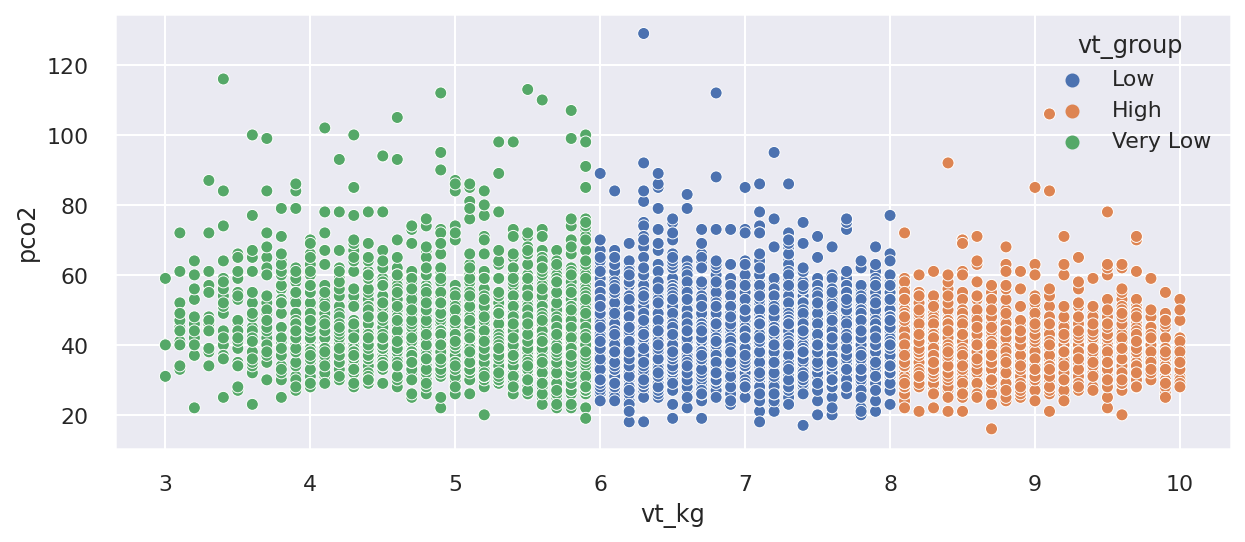

In [ ]:
sns.scatterplot(data=df_mode['vt_kg pco2 vt_group'.split()],x='vt_kg',y='pco2',hue='vt_group')


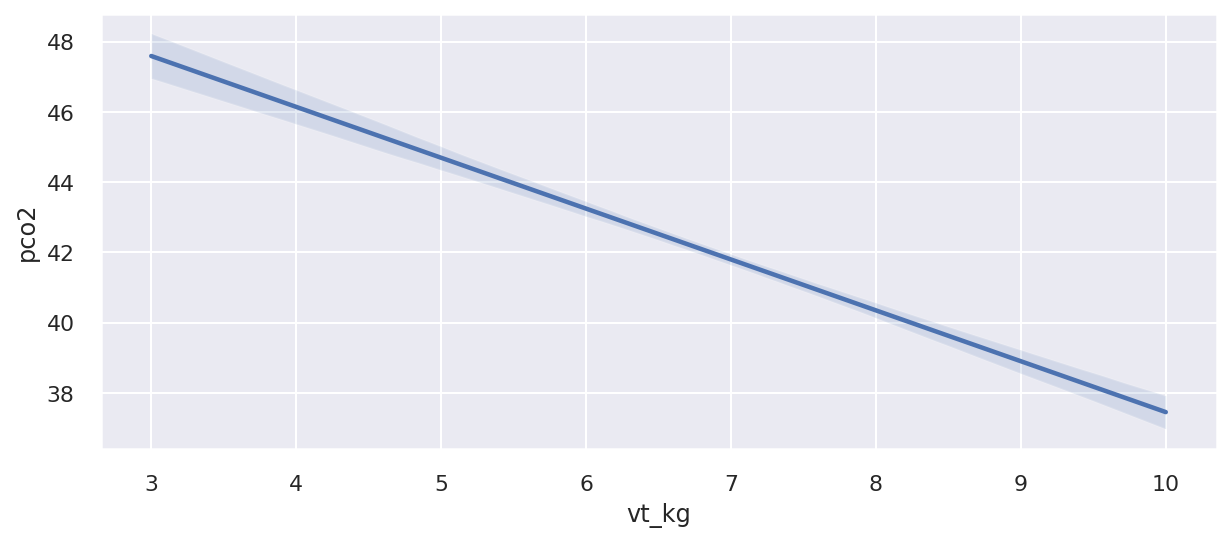

In [ ]:
sns.regplot(data = df_mode['vt_kg pco2 vt_group'.split()],x='vt_kg',y='pco2', scatter=False)


## pfr per group

In [ ]:
df_mode['vt_kg pfr vt_group'.split()].groupby('vt_group').describe()

vt_kg                                                   pfr  \
           count      mean       std  min  25%  50%  75%   max   count   
vt_group                                                                 
High      1969.0  8.738141  0.520712  8.1  8.3  8.6  9.1  10.0  1969.0   
Low       7426.0  6.900821  0.573519  6.0  6.4  6.9  7.4   8.0  7426.0   
Very Low  3555.0  5.191505  0.641349  3.0  4.9  5.4  5.7   5.9  3555.0   

                                                                    
                mean         std   min    25%    50%    75%    max  
vt_group                                                            
High      234.067395  107.919074  41.0  156.0  215.0  295.0  702.5  
Low       238.005131  106.459428  41.0  160.0  223.3  305.0  824.0  
Very Low  231.661322  109.620492  41.0  148.3  215.0  300.0  796.0

In [ ]:
df_mode['vt_kg pfr vt_group'.split()].groupby('vt_group').median()


vt_kg    pfr
vt_group              
High        8.6  215.0
Low         6.9  223.3
Very Low    5.4  215.0

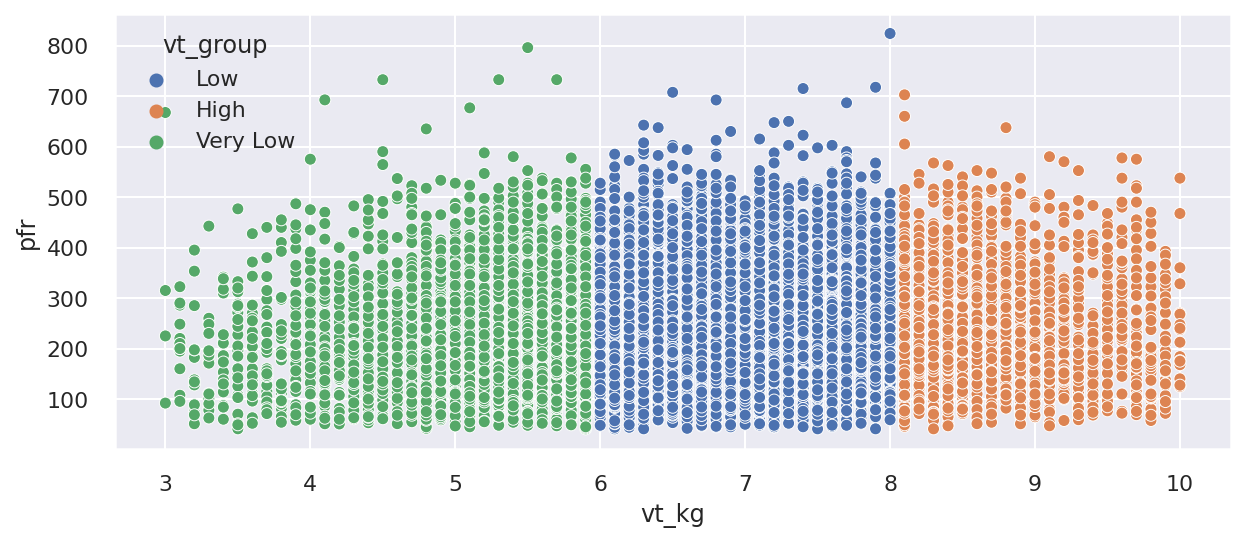

In [ ]:
sns.scatterplot(data=df_mode['vt_kg pfr vt_group'.split()],x='vt_kg',y='pfr',hue='vt_group')


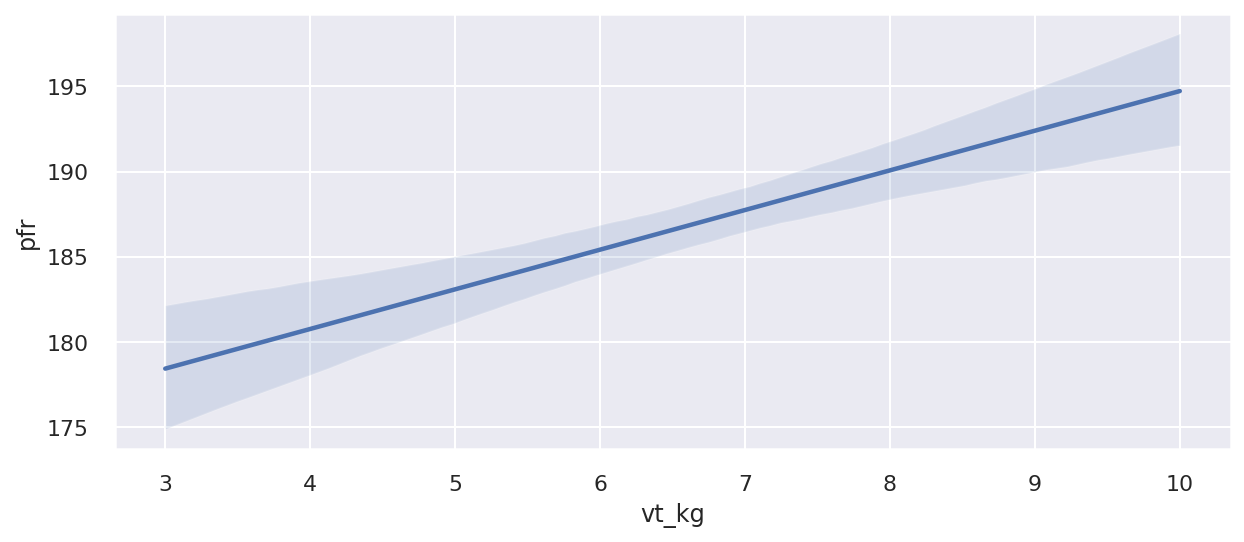

In [ ]:
sns.regplot(data = df_mode['vt_kg pfr vt_group'.split()],x='vt_kg',y='pfr', scatter=False)


## Mortality

In [ ]:
df.head()

admissionid  patientid agegroup gender     ht  pred_wt  vt_kg    mp  \
8         12064      10411    70-79    Man  175.0   70.566    7.1  10.0   
9         12064      10411    70-79    Man  175.0   70.566    7.1  10.0   
10        12064      10411    70-79    Man  175.0   70.566    7.1  10.0   
11        12064      10411    70-79    Man  175.0   70.566    7.1  10.0   
12        12064      10411    70-79    Man  175.0   70.566    7.1  12.5   

      pfr  measurehr    rr  peep    pi destination  pco2 vt_group  
8   146.7          2  12.0   5.0  12.0          19  48.0      Low  
9   146.7          2  12.0   5.0  12.0          19  48.0      Low  
10  146.7          2  12.0   5.0  12.0          19  48.0      Low  
11  146.7          2  12.0   5.0  12.0          19  48.0      Low  
12  146.7          2  15.0   5.0  12.0          19  48.0      Low

In [ ]:
vt_cat = [
    df['vt_kg']<6,
    (df['vt_kg']>=6) & (df['vt_kg']<8),
    df['vt_kg']>=8,    
]

cat_names = [
    'Very Low', 'Low', 'High'
]

vt_group = np.select(vt_cat, cat_names)
pd.Series(vt_group)

df['vt_group'] = vt_group

In [ ]:
df['admissionid vt_group'.split()].drop_duplicates().groupby('vt_group').count()


admissionid
vt_group             
High             4922
Low              8376
Very Low         5411

In [ ]:
total_per_group = df['admissionid vt_group'.split()].drop_duplicates().groupby('vt_group').count().reset_index()

In [ ]:
total_per_group.columns = ['vt_group','total_admissions']

In [ ]:
total_per_group

vt_group  total_admissions
0      High              4922
1       Low              8376
2  Very Low              5411

In [ ]:
expired_per_group = df[df['destination']=='Overleden']['admissionid vt_group'.split()].drop_duplicates().groupby('vt_group').count().reset_index()
expired_per_group.columns = 'vt_group expired_admissions'.split()
expired_per_group


vt_group  expired_admissions
0      High                 935
1       Low                1421
2  Very Low                1257

In [ ]:
mortality = total_per_group.merge(expired_per_group, on = 'vt_group')

In [ ]:
mortality['mortality'] = 100*(mortality['expired_admissions']/mortality['total_admissions'])

In [ ]:
mortality['mortality'] = mortality['mortality'].round()

In [ ]:
mortality

vt_group  total_admissions  expired_admissions  mortality
0      High              4922                 935       19.0
1       Low              8376                1421       17.0
2  Very Low              5411                1257       23.0

[Text(0, 0.5, '% Died admissions'),
 Text(0.5, 0, 'Tidal Volume Group'),
 Text(0.5, 1.0, 'Mortality Per Group')]

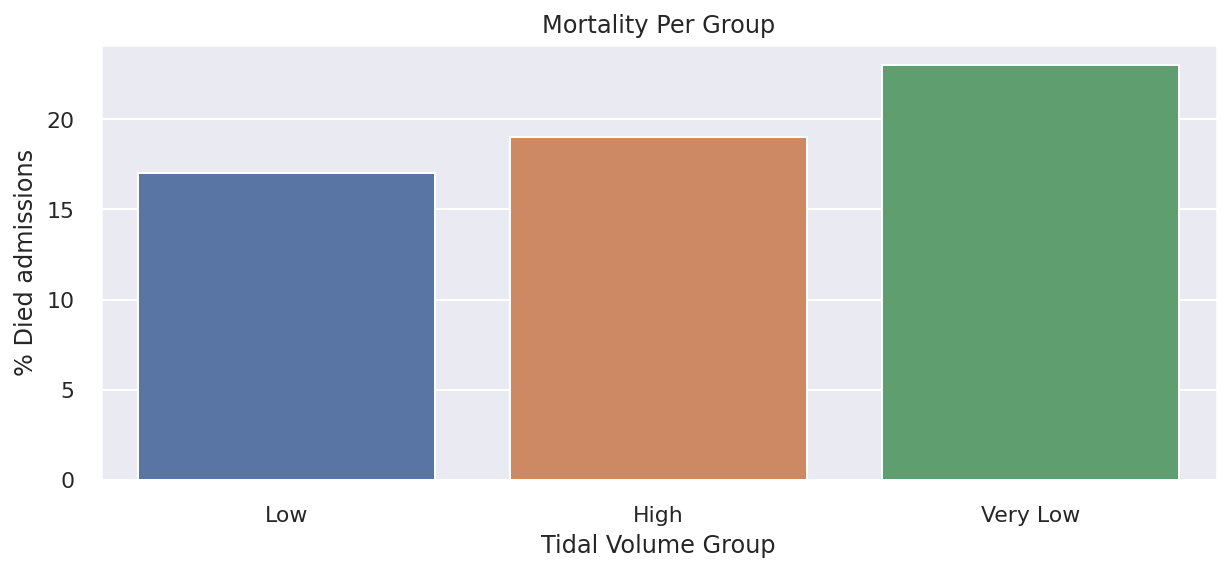

In [ ]:
sns.barplot(data = mortality, x = 'vt_group', y = "mortality", order=mortality.sort_values('mortality').vt_group).set(title='Mortality Per Group', ylabel='% Died admissions', xlabel='Tidal Volume Group')

## Comments on the results

From the previous 3 tables and graphs we can see:
- RR slightly increased with Vt decrease (median and mean)
- PEEP remained stationary in all groups (median) or even slightly decreases with Vt decrease (mean)
- Pressure above PEEP slightly decreases from high to low but the same in low and very low groups (median and mean)

This might say that Tidal volume remained the primary determinent of Mechanical power as the pressures did not differ significantly and respiratory rate increase did not counterbalance.




## What happended in high group?

In [ ]:
df_mode['vt_kg rr peep pi mp vt_group'.split()][(df_mode['vt_group']=='High') & (df_mode['vt_kg']<9)].median()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


vt_kg     8.4
rr       15.0
peep      8.0
pi       12.0
mp       14.6
dtype: float64

In [ ]:
df_mode['vt_kg rr peep pi mp vt_group'.split()][(df_mode['vt_group']=='High') & (df_mode['vt_kg']>9)].median()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


vt_kg     9.40
rr       15.00
peep      8.00
pi       14.00
mp       17.75
dtype: float64

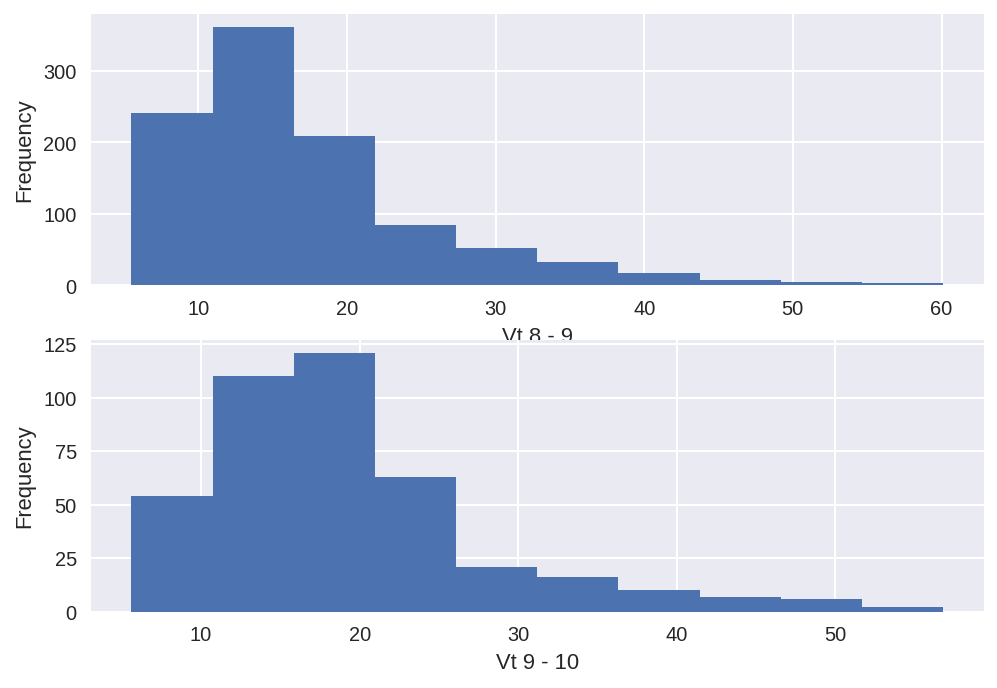

In [ ]:
plt.subplot(2,1,1)
df_mode[(df_mode['vt_group']=='High') & (df_mode['vt_kg']<9)]['mp'].plot.hist() # More on color options later
plt.xlabel('Vt 8 - 9')
plt.subplot(2,1,2)
df_mode[(df_mode['vt_group']=='High') & (df_mode['vt_kg']>9)]['mp'].plot.hist() # More on color options later
plt.xlabel('Vt 9 - 10');

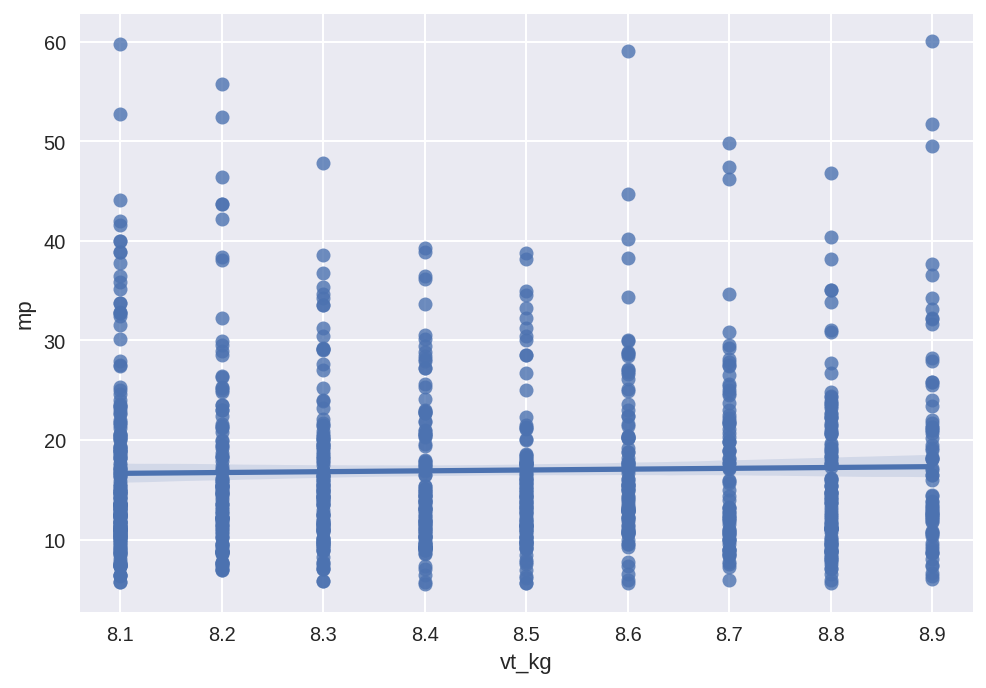

In [ ]:
sns.regplot(data = df_mode[(df_mode['vt_group']=='High') & (df_mode['vt_kg']<9)],x='vt_kg',y='mp')

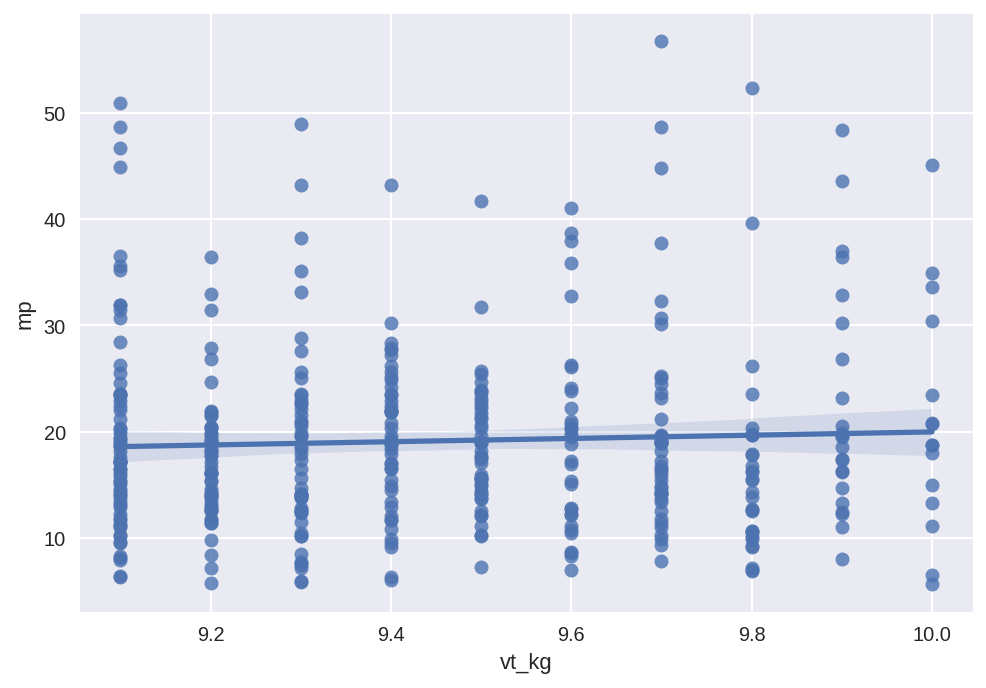

In [ ]:
sns.regplot(data = df_mode[(df_mode['vt_group']=='High') & (df_mode['vt_kg']>9)],x='vt_kg',y='mp')


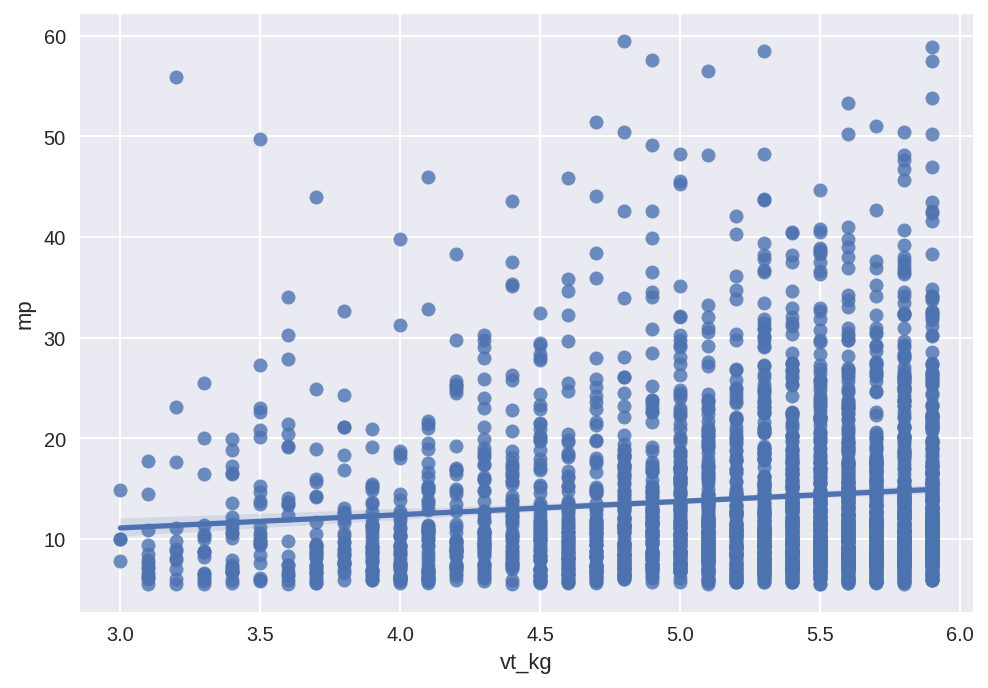

In [ ]:
sns.regplot(data = df_mode[df_mode['vt_group']=='Very Low'],x='vt_kg',y='mp')


# UPDATES
---
## 1-6
- adding linear regression graph for each variable
- finalising mortality percentage per group
- refining the bar plot to be ordered

## 29-5
- adding pco2 to df

## 21-5
- previous box plotes removed (after revision, they had many missing values probably for coding issue)





# PLAN
---

## Pending:
- Analysis:
-- Any thing more?
-- compared demographics in all groups

## Done:
- Preprocessing:
-- data extraction
-- initial cleaning
-- merging
-- calculations
-- final cleaning

- Analysis:
-- total admissions
-- total patients
-- males and females
-- mode of values
-- descriptive again of mode df
-- adding tidal volume group col
-- grouping mode df by vt_group
-- age groups
-- RR, PEEP, Pi per group
-- pfr per group
-- pco2 per group
-- mortality per group


# REFRENCES
---

-- list of links to relevent papers 